## Erschließungsstrategien für unbekannten Wortschatz von DaF-Lernenden an spanischen Universitäten (2017-19)
# Datenanalyse (3)

#### Werkzeuge und Daten importieren

In [1]:
MyData <- read.csv2(file="D:\\Daten\\DISS\\Daten\\Estrategias_Estudiantes_Analyse.csv", 
                    header=TRUE, sep=",", fileEncoding = "UTF-16")

In [2]:
#MyData[MyData == 0] <- NA

#### Likert-Variablen auswählen

Spalten, die Likert-Items enthalten, werden ausgewählt und in Vektoren zusammengefasst.

In [3]:
get_vec <- function(df,name){
    vec <- c()
    for (i in 1:ncol(df)){
        if (grepl(name, colnames(df)[i]) & !grepl("TEXT",colnames(df)[i]) ){
            vec <- c(vec, i)
        }
    }
    vec
}

In [4]:
vec_AQ2 <- get_vec(MyData,"A.Q2")
vec_AQ3 <- get_vec(MyData,"A.Q3")
vec_CQ1 <- get_vec(MyData,"C.Q1")

#### Funktion für Datenformat (Integer)

In [5]:
convert_data <- function(df,cols){
    X <- df[,cols]
    X <- do.call(cbind.data.frame,lapply(X,function(x) as.integer(as.character(x))))
    colnames(X) <- colnames(df)[cols]
    X
}

### Faktorenanalyse

In [6]:
library("psych")

#### AQ2

In [7]:
FA_AQ2 <- fa(convert_data(MyData,vec_AQ2), nfactors = 3, rotate = "varimax")
FA_AQ2

Factor Analysis using method =  minres
Call: fa(r = convert_data(MyData, vec_AQ2), nfactors = 3, rotate = "varimax")
Standardized loadings (pattern matrix) based upon correlation matrix
         MR2   MR1   MR3   h2   u2 com
A.Q2_1 -0.06  0.05  0.31 0.10 0.90 1.1
A.Q2_2  0.03  0.26  0.82 0.74 0.26 1.2
A.Q2_3 -0.12  0.83  0.06 0.70 0.30 1.1
A.Q2_4 -0.04  0.55  0.06 0.31 0.69 1.0
A.Q2_5  0.94  0.03 -0.06 0.89 0.11 1.0
A.Q2_6  0.49 -0.12 -0.08 0.27 0.73 1.2
A.Q2_7  0.06  0.15 -0.25 0.09 0.91 1.8

                       MR2  MR1  MR3
SS loadings           1.15 1.10 0.84
Proportion Var        0.16 0.16 0.12
Cumulative Var        0.16 0.32 0.44
Proportion Explained  0.37 0.36 0.27
Cumulative Proportion 0.37 0.73 1.00

Mean item complexity =  1.2
Test of the hypothesis that 3 factors are sufficient.

The degrees of freedom for the null model are  21  and the objective function was  0.74 with Chi Square of  285.24
The degrees of freedom for the model are 3  and the objective function was  0 



In [8]:
#write.csv2(FA_AQ2$weights, file ="D:\\Daten\\DISS\\Daten\\FA_weights2.csv",row.names=TRUE)

Hypothese zum Ergebnis der explorativen Faktorenanalyse (AQ2):

* MR1: Kenntnisse des Deutschen nutzen (inkl. Kontext)
* MR2: Soziale Strategien
* MR3: Sprachkenntnisse nutzen (insbes. weitere Sprachen, Erstsprache)

#### AQ3

In [9]:
FA_AQ3 <- fa(convert_data(MyData,vec_AQ3), nfactors = 6, rotate = "varimax")
FA_AQ3

Factor Analysis using method =  minres
Call: fa(r = convert_data(MyData, vec_AQ3), nfactors = 6, rotate = "varimax")
Standardized loadings (pattern matrix) based upon correlation matrix
          MR2   MR4   MR1   MR5   MR6   MR3    h2   u2 com
A.Q3_1  -0.02  0.08  0.07 -0.02 -0.04  0.51 0.277 0.72 1.1
A.Q3_2   0.11 -0.17  0.06  0.12  0.04  0.61 0.426 0.57 1.3
A.Q3_3  -0.04 -0.01  0.11  0.07  0.07  0.47 0.240 0.76 1.2
A.Q3_4  -0.01  0.10 -0.04  0.12  0.15  0.47 0.271 0.73 1.5
A.Q3_5   0.20  0.30  0.08  0.08  0.03  0.41 0.314 0.69 2.5
A.Q3_6   0.80  0.13  0.09  0.05 -0.05  0.09 0.682 0.32 1.1
A.Q3_7   0.79  0.19  0.12  0.13 -0.02  0.04 0.696 0.30 1.2
A.Q3_8   0.80  0.17  0.12  0.10  0.02 -0.04 0.700 0.30 1.2
A.Q3_9   0.54  0.16  0.06  0.16  0.10  0.05 0.361 0.64 1.5
A.Q3_28  0.22  0.18  0.15  0.40  0.08  0.11 0.282 0.72 2.7
A.Q3_10  0.40  0.49  0.03  0.17  0.09 -0.02 0.436 0.56 2.3
A.Q3_11  0.24  0.72  0.07  0.16  0.07  0.03 0.608 0.39 1.4
A.Q3_12  0.22  0.62  0.13  0.18  0.02  0.04 0.4

In [10]:
#write.csv2(FA_AQ3$weights, file ="D:\\Daten\\DISS\\Daten\\FA_weights.csv",row.names=TRUE)

Hypothese zum Ergebnis der explorativen Faktorenanalyse (AQ3):

* MR1: Kontextwissen (Textsorte, behandeltes Thema, kulturelles Wissen...)
* MR2: intralinguale Hinweise (Wortbildung, morphosyntaktische Regularitäten, Orthographie) + Konnektoren, Erklärungshilfen
* MR3: interlinguale Hinweise (inkl. Ethymologie)
* MR4: engerer Kontext, Analyse auf Satzebene (Syntax, semantische Relationen)
* MR5: metakognitive Strategien
* MR6: Bilder, Grafiken, Symbole, Zahlen, Kommunikationssituation


### Multivariate Varianzanalysen (MANOVA) und t-Tests

Matrix AQ2:

In [11]:
A2 = convert_data(MyData,vec_AQ2)
A2[is.na(A2)] <- 0 
A2 <- as.matrix(A2)

B2 = FA_AQ2$weights
B2 <- as.matrix(B2)

C2 <- A2 %*% B2

In [12]:
Df_total2 <- merge(MyData,C2,by=0, sort=FALSE)
Df_total2[Df_total2 == 0] <- NA
#Df_total2[is.na(Df_total2)] <- 0

Matrix AQ3:

In [13]:
A = convert_data(MyData,vec_AQ3)
A[is.na(A)] <- 0 
A <- as.matrix(A)

B = FA_AQ3$weights
B <- as.matrix(B)

C <- A %*% B

In [14]:
Df_total <- merge(MyData,C,by=0, sort=FALSE)
Df_total[Df_total == 0] <- NA
#Df_total[is.na(Df_total)] <- 0

Vektoren mit zu untersuchenden Variablen:

In [15]:
vec_V <- get_vec(Df_total,"V_")
vec_W <- get_vec(Df_total,"W_")

In [16]:
colnames(Df_total[,vec_V])

[1] "V_L1.Bi.Trilingualismus" "V_Studienrichtung"      
 [3] "V_Niveau_DK"             "V_Alter"                
 [5] "V_Geschlecht"            "V_Erstsprache_Span"     
 [7] "V_Spr_Zahl"              "V_Spr_Fran"             
 [9] "V_Spr_Germ"              "V_Spr_Rom"              
[11] "V_Spr_Slaw"              "V_Spr_Asiat"            
[13] "V_Spr_Klass"             "V_E_Schule_LL"          
[15] "V_E_Schule_Eng"          "V_E_Schule_Spr"         
[17] "V_E_Univ_DK"             "V_E_Univ_andere"        
[19] "V_E_Sprachschule"        "V_E_DK_aktuell"         
[21] "V_E_Sozial"              "V_E_autonom"            
[23] "V_Met_Erkl"              "V_Met_Tipps"            
[25] "V_Met_Training"          "V_Met_Vgl"              
[27] "V_Met_Reflexion"         "V_Met_unbewusst"

In [17]:
vec_V

[1] 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89
[26] 90 91 92

In [18]:
remove <- c(67)
vec_V[!vec_V %in% remove]

[1] 65 66 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90
[26] 91 92

Die Variable an Position 67 ("Niveau des aktuellen Deutschkurses") wird im Fall der Analyse getrennt nach Niveaustufen nicht berücksichtigt.

In [19]:
colnames(Df_total[,vec_V[!vec_V %in% remove]])

[1] "V_L1.Bi.Trilingualismus" "V_Studienrichtung"      
 [3] "V_Alter"                 "V_Geschlecht"           
 [5] "V_Erstsprache_Span"      "V_Spr_Zahl"             
 [7] "V_Spr_Fran"              "V_Spr_Germ"             
 [9] "V_Spr_Rom"               "V_Spr_Slaw"             
[11] "V_Spr_Asiat"             "V_Spr_Klass"            
[13] "V_E_Schule_LL"           "V_E_Schule_Eng"         
[15] "V_E_Schule_Spr"          "V_E_Univ_DK"            
[17] "V_E_Univ_andere"         "V_E_Sprachschule"       
[19] "V_E_DK_aktuell"          "V_E_Sozial"             
[21] "V_E_autonom"             "V_Met_Erkl"             
[23] "V_Met_Tipps"             "V_Met_Training"         
[25] "V_Met_Vgl"               "V_Met_Reflexion"        
[27] "V_Met_unbewusst"

In [20]:
for (v in vec_V){Df_total[,v] <- as.factor(Df_total[,v])}
for (v in vec_V){Df_total2[,v] <- as.factor(Df_total2[,v])}
for (v in vec_W){Df_total[,v] <- as.factor(Df_total[,v])}
for (v in vec_W){Df_total2[,v] <- as.factor(Df_total2[,v])}

Übersicht über die Gruppengrößen nach Variablen (Gesamt):

In [21]:
summary(Df_total[,vec_V])

 V_L1.Bi.Trilingualismus V_Studienrichtung V_Niveau_DK V_Alter    V_Geschlecht
 1:103                   1   :131          1:152       1   :104   1   :287    
 2:287                   2   :129          2: 66       2   : 84   2   : 91    
                         3   : 70          3:103       3   : 99   NA's: 12    
                         4   : 29          4: 34       4   : 92               
                         NA's: 31          5: 35       NA's: 11               
 V_Erstsprache_Span V_Spr_Zahl V_Spr_Fran V_Spr_Germ V_Spr_Rom V_Spr_Slaw
 1:363              1: 34      1:271      1: 37      1:131     1: 32     
 2: 27              3: 85      2:119      2:353      2:259     2:358     
                    4:115                                                
                    5:156                                                
                                                                         
 V_Spr_Asiat V_Spr_Klass V_E_Schule_LL V_E_Schule_Eng V_E_Schule_Spr
 1: 45       

Übersicht über die Gruppengrößen nach Variablen (nach Niveaugruppen):

In [22]:
summary(Df_total[which(Df_total$V_Niveau_DK=='1'),vec_V[!vec_V %in% remove]])

 V_L1.Bi.Trilingualismus V_Studienrichtung V_Alter   V_Geschlecht
 1: 39                   1   :20           1   :79   1   :118    
 2:113                   2   :81           2   :37   2   : 32    
                         3   :26           3   :21   NA's:  2    
                         4   :19           4   :14               
                         NA's: 6           NA's: 1               
 V_Erstsprache_Span V_Spr_Zahl V_Spr_Fran V_Spr_Germ V_Spr_Rom V_Spr_Slaw
 1:139              1:14       1:109      1:  6      1: 40     1: 16     
 2: 13              3:36       2: 43      2:146      2:112     2:136     
                    4:46                                                 
                    5:56                                                 
                                                                         
 V_Spr_Asiat V_Spr_Klass V_E_Schule_LL V_E_Schule_Eng V_E_Schule_Spr
 1: 16       1:71        1:64          1:102          1:72          
 2:136       2:81     

In [23]:
summary(Df_total[which(Df_total$V_Niveau_DK=='2'),vec_V[!vec_V %in% remove]])

 V_L1.Bi.Trilingualismus V_Studienrichtung V_Alter   V_Geschlecht
 1:20                    1   :28           1   :19   1   :39     
 2:46                    2   :23           2   :15   2   :21     
                         3   : 7           3   :10   NA's: 6     
                         4   : 5           4   :20               
                         NA's: 3           NA's: 2               
 V_Erstsprache_Span V_Spr_Zahl V_Spr_Fran V_Spr_Germ V_Spr_Rom V_Spr_Slaw
 1:59               1: 8       1:37       1:10       1:26      1: 3      
 2: 7               3:13       2:29       2:56       2:40      2:63      
                    4:19                                                 
                    5:26                                                 
                                                                         
 V_Spr_Asiat V_Spr_Klass V_E_Schule_LL V_E_Schule_Eng V_E_Schule_Spr
 1: 8        1:32        1:23          1:40           1:29          
 2:58        2:34     

In [24]:
summary(Df_total[which(Df_total$V_Niveau_DK=='3'),vec_V[!vec_V %in% remove]])

 V_L1.Bi.Trilingualismus V_Studienrichtung V_Alter   V_Geschlecht
 1:28                    1   :52           1   : 4   1   :77     
 2:75                    2   :20           2   :31   2   :25     
                         3   :20           3   :39   NA's: 1     
                         4   : 4           4   :25               
                         NA's: 7           NA's: 4               
 V_Erstsprache_Span V_Spr_Zahl V_Spr_Fran V_Spr_Germ V_Spr_Rom V_Spr_Slaw
 1:98               1: 9       1:73       1: 6       1:37      1: 5      
 2: 5               3:23       2:30       2:97       2:66      2:98      
                    4:33                                                 
                    5:38                                                 
                                                                         
 V_Spr_Asiat V_Spr_Klass V_E_Schule_LL V_E_Schule_Eng V_E_Schule_Spr
 1:12        1:53        1:30          1:49           1:43          
 2:91        2:50     

In [25]:
summary(Df_total[which(Df_total$V_Niveau_DK=='4'),vec_V[!vec_V %in% remove]])

 V_L1.Bi.Trilingualismus V_Studienrichtung V_Alter   V_Geschlecht
 1:10                    1   :12           1   : 0   1   :25     
 2:24                    2   : 5           2   : 1   2   : 8     
                         3   :12           3   :20   NA's: 1     
                         4   : 0           4   :11               
                         NA's: 5           NA's: 2               
 V_Erstsprache_Span V_Spr_Zahl V_Spr_Fran V_Spr_Germ V_Spr_Rom V_Spr_Slaw
 1:32               1: 1       1:25       1: 6       1:12      1: 5      
 2: 2               3: 5       2: 9       2:28       2:22      2:29      
                    4: 7                                                 
                    5:21                                                 
                                                                         
 V_Spr_Asiat V_Spr_Klass V_E_Schule_LL V_E_Schule_Eng V_E_Schule_Spr
 1: 4        1:16        1:13          1:14           1:18          
 2:30        2:18     

In [26]:
summary(Df_total[which(Df_total$V_Niveau_DK=='5'),vec_V[!vec_V %in% remove]])

 V_L1.Bi.Trilingualismus V_Studienrichtung V_Alter   V_Geschlecht
 1: 6                    1   :19           1   : 2   1   :28     
 2:29                    2   : 0           2   : 0   2   : 5     
                         3   : 5           3   : 9   NA's: 2     
                         4   : 1           4   :22               
                         NA's:10           NA's: 2               
 V_Erstsprache_Span V_Spr_Zahl V_Spr_Fran V_Spr_Germ V_Spr_Rom V_Spr_Slaw
 1:35               1: 2       1:27       1: 9       1:16      1: 3      
 2: 0               3: 8       2: 8       2:26       2:19      2:32      
                    4:10                                                 
                    5:15                                                 
                                                                         
 V_Spr_Asiat V_Spr_Klass V_E_Schule_LL V_E_Schule_Eng V_E_Schule_Spr
 1: 5        1:18        1: 9          1:15           1:14          
 2:30        2:17     

Funktionen zur Berechnung von MANOVA und t-Test:

In [27]:
MANOVA2_table <- function(df,vec){
    man_int <- summary(manova(cbind(MR1,MR2,MR3) ~ df[,vec[1]], data = df))
    RES_MAN2 <- as.data.frame(t(man_int$stats[1,]))
    for (i in vec[2:length(vec)]){
        man_int <- summary(manova(cbind(MR1,MR2,MR3) ~ df[,i], data = df))
        RES_MAN2 <- rbind(RES_MAN2,as.data.frame(t(man_int$stats[1,]))) 
    }
    rownames(RES_MAN2) <- colnames(df)[vec]
    RES_MAN2
}

In [28]:
#MANOVA2a_table <- function(df,vec){
 #   man_int <- summary(manova(cbind(A.Q2_1,A.Q2_2,A.Q2_3,A.Q2_4,A.Q2_5,A.Q2_6,A.Q2_7) ~ df[,vec[1]], data = df))
  #  RES_MAN2 <- as.data.frame(t(man_int$stats[1,]))
   # for (i in vec[2:length(vec)]){
    #    man_int <- summary(manova(cbind(A.Q2_1,A.Q2_2,A.Q2_3,A.Q2_4,A.Q2_5,A.Q2_6,A.Q2_7) ~ df[,i], data = df))
     #   RES_MAN2 <- rbind(RES_MAN2,as.data.frame(t(man_int$stats[1,]))) 
    #}
    #rownames(RES_MAN2) <- colnames(df)[vec]
    #RES_MAN2
#}

In [29]:
MANOVA3_table <- function(df,vec){
    man_int <- summary(manova(cbind(MR1,MR2,MR3,MR4,MR5,MR6) ~ df[,vec[1]], data = df))
    RES_MAN3 <- as.data.frame(t(man_int$stats[1,]))
    for (i in vec[2:length(vec)]){
        man_int <- summary(manova(cbind(MR1,MR2,MR3,MR4,MR5,MR6) ~ df[,i], data = df))
        RES_MAN3 <- rbind(RES_MAN3,as.data.frame(t(man_int$stats[1,]))) 
    }
    rownames(RES_MAN3) <- colnames(df)[vec]
    RES_MAN3
}

In [30]:
tabletstbonf2 <- function(data ,v ,facts=c("MR1","MR2","MR3")){
datalist = list()
    for (i in 1:length(v)){
    pv <- c()
        for (fact in facts){
            test <- pairwise.t.test(data[,fact],data[,v[i]], p.adj = "bonf")
            pv <- c(pv,test$p.value[1,])
                            }
    datalist[[i]] <- pv
        }
    R <- do.call(rbind,datalist)
    colnames(R) <- facts
    rownames(R) <- v
    R
    }

In [31]:
tabletstbonf <- function(data ,v ,facts=c("MR1","MR2","MR3","MR4","MR5","MR6")){
datalist = list()
    for (i in 1:length(v)){
    pv <- c()
        for (fact in facts){
            test <- pairwise.t.test(data[,fact],data[,v[i]], p.adj = "bonf")
            pv <- c(pv,test$p.value[1,])
                            }
    datalist[[i]] <- pv
        }
    R <- do.call(rbind,datalist)
    colnames(R) <- facts
    rownames(R) <- v
    R
    }

Funktion für Tabellen mit deskriptiver Statistik:

In [32]:
df_details2 <- function(data_val){
    df1 <- describe(data_val[c('MR1','MR2','MR3')])
    df2 <- data.frame(do.call(rbind,lapply(data_val[c('MR1','MR2','MR3')],summary)))
    df_result <- merge(df1,df2,by=0,sort=FALSE)
    df_result
}

In [33]:
df_details <- function(data_val){
    df1 <- describe(data_val[c('MR1','MR2','MR3','MR4','MR5','MR6')])
    df2 <- data.frame(do.call(rbind,lapply(data_val[c('MR1','MR2','MR3','MR4','MR5','MR6')],summary)))
    df_result <- merge(df1,df2,by=0,sort=FALSE)
    df_result
}

In [34]:
shapiro.test(as.factor(Df_total$V_Met_Training))

ERROR: Error: is.numeric(x) is not TRUE


In [29]:
library('biotools')

Warning message:
"package 'biotools' was built under R version 3.4.4"Loading required package: rpanel
Warning message:
"package 'rpanel' was built under R version 3.4.4"Loading required package: tcltk
Package `rpanel', version 1.1-4: type help(rpanel) for summary information
Loading required package: tkrplot
Warning message:
"package 'tkrplot' was built under R version 3.4.4"Loading required package: MASS
Loading required package: lattice
Loading required package: SpatialEpi
Warning message:
"package 'SpatialEpi' was built under R version 3.4.4"Loading required package: sp
Warning message:
"package 'sp' was built under R version 3.4.4"

---
biotools version 3.1


In [31]:
vec_V

[1] 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89
[26] 90 91 92

In [50]:
ejemplo <- boxM(Df_total[!is.na(as.factor(Df_total[,vec_V[2]])),c('MR1','MR2','MR3','MR4','MR5','MR6')],
                as.factor(Df_total[,vec_V[2]])[!is.na(as.factor(Df_total[,vec_V[2]]))])

In [51]:
ejemplo$p.value

[1] 0.2821077

In [52]:
for (v in vec_V){
    M <- boxM(Df_total[!is.na(as.factor(Df_total[,v])),c('MR1','MR2','MR3','MR4','MR5','MR6')],
              as.factor(Df_total[,v])[!is.na(as.factor(Df_total[,v]))])
    if (M$p.value<0.01){print(colnames(Df_total)[v])}
}

[1] "V_Met_Training"


In [53]:
boxM(Df_total[!is.na(as.factor(Df_total[,"V_Met_Training"])),c('MR1','MR2','MR3','MR4','MR5','MR6')],
                as.factor(Df_total[,"V_Met_Training"])[!is.na(as.factor(Df_total[,"V_Met_Training"]))])


	Box's M-test for Homogeneity of Covariance Matrices

data:  Df_total[!is.na(as.factor(Df_total[, "V_Met_Training"])), c("MR1",     "MR2", "MR3", "MR4", "MR5", "MR6")]
Chi-Sq (approx.) = 43.771, df = 21, p-value = 0.002503


In [57]:
library(car)

ERROR: Error in library(car): there is no package called 'car'


### AQ2

#### MANOVA (Gesamt)

In [185]:
res_manova2 <- MANOVA2_table(Df_total2,vec_V)
res2 <- res_manova2[res_manova2['Pr(>F)'] < 0.05,]
res2

,Df,Pillai,approx F,num Df,den Df,Pr(>F)
V_Studienrichtung,3,0.05417532,2.176215,9,1065,2.146826e-02
V_Niveau_DK,4,0.21917573,7.586119,12,1155,1.202444e-13
V_Alter,3,0.06517185,2.775795,9,1125,3.217871e-03
V_Spr_Germ,1,0.03281690,4.365710,3,386,4.865961e-03
V_E_Schule_Eng,1,0.02372938,3.127391,3,386,2.576800e-02
V_E_Schule_Spr,1,0.02679201,3.542140,3,386,1.478592e-02
V_E_Univ_DK,1,0.05913717,8.087239,3,386,3.086102e-05
V_E_Univ_andere,1,0.04878842,6.599418,3,386,2.333991e-04
V_E_Sprachschule,1,0.02562264,3.383474,3,386,1.829447e-02
V_E_DK_aktuell,1,0.03435261,4.577277,3,386,3.652933e-03


In [186]:
#write.csv2(res2, file ="D:\\Daten\\DISS\\Daten\\Resmanova2.csv",row.names=TRUE)

#### T-Test (Gesamt)

In [187]:
ttest_A2 <- tabletstbonf2(Df_total2,c('V_Spr_Germ',
 'V_E_Schule_Eng',
 'V_E_Schule_Spr',
 'V_E_Univ_DK',
 'V_E_Univ_andere',
 'V_E_Sprachschule',
 'V_E_DK_aktuell',
 'V_E_Sozial',
 'V_E_autonom',
 'V_Met_Training',
 'V_Met_Reflexion',
 'V_Met_unbewusst'
 ))
ttest_A2

,MR1,MR2,MR3
V_Spr_Germ,1.732609e-03,0.561229033,0.06769899
V_E_Schule_Eng,3.133540e-01,0.004123614,0.97301593
V_E_Schule_Spr,1.558504e-02,0.033503904,0.80728404
V_E_Univ_DK,1.077163e-05,0.318273822,0.15826296
V_E_Univ_andere,1.337741e-05,0.529285123,0.60048378
V_E_Sprachschule,1.863001e-02,0.036066435,0.86796622
V_E_DK_aktuell,3.266436e-02,0.004337802,0.39612632
V_E_Sozial,4.590967e-03,0.781065313,0.93771497
V_E_autonom,3.278314e-02,0.342625921,0.02978431
V_Met_Training,9.900044e-03,0.026773870,0.81535457


In [188]:
#write.csv2(ttest_A2, file ="D:\\Daten\\DISS\\Daten\\Ttest_A2.csv",row.names=TRUE)

#### Deskriptive Statistik der Gruppen der Variablen mit p < 0.05 in der MANOVA

In [189]:
df_details2(Df_total2[which(Df_total2$V_Niveau_DK=='1'),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,152,3.953159,0.8527704,4.020028,3.966028,0.8348545,1.8161166,5.527126,3.711009,-0.1490256,-0.62298407,0.06916881,1.8161166,3.388757,4.020028,3.953159,4.495689,5.527126
MR2,2,152,3.566382,0.9030280,3.876856,3.612316,1.2016209,1.2506026,5.013733,3.763131,-0.4228913,-0.34491601,0.07324524,1.2506026,3.007080,3.876856,3.566382,4.029622,5.013733
MR3,3,152,2.077082,0.7225721,2.126515,2.077977,0.7207968,0.1383936,3.551351,3.412957,-0.1212863,-0.06292321,0.05860834,0.1383936,1.565576,2.126515,2.077082,2.465055,3.551351


In [190]:
df_details2(Df_total2[which(Df_total2$V_Niveau_DK=='2'),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,66,4.415396,0.8420472,4.463115,4.504650,0.9525624,1.8146460,5.524191,3.709545,-0.7795567,0.2702046,0.10364885,1.8146460,3.988553,4.463115,4.415396,5.123165,5.524191
MR2,2,66,3.392594,1.0745754,3.432355,3.425310,0.8686510,1.0908454,5.024839,3.933994,-0.2024315,-0.8479472,0.13227108,1.0908454,2.836865,3.432355,3.392594,4.008888,5.024839
MR3,3,66,1.937605,0.7515344,2.027403,1.951447,0.7483825,0.1121812,3.410280,3.298099,-0.1914958,-0.2478105,0.09250749,0.1121812,1.422545,2.027403,1.937605,2.424675,3.410280


In [191]:
df_details2(Df_total2[which(Df_total2$V_Niveau_DK=='3'),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,103,4.336549,0.6879796,4.354036,4.370476,0.4893442,2.2936223,5.554605,3.260983,-0.41680136,-0.0809917,0.06778865,2.2936223,3.998663,4.354036,4.336549,4.669097,5.554605
MR2,2,103,3.337027,0.9169391,3.042620,3.366620,1.1935720,0.9884927,5.045913,4.057420,-0.33225599,0.2097401,0.09034870,0.9884927,2.924958,3.042620,3.337027,3.948770,5.045913
MR3,3,103,1.686435,0.7130033,1.496893,1.685407,0.7865331,-0.2166885,3.753259,3.969948,0.09748739,0.2097099,0.07025431,-0.2166885,1.329321,1.496893,1.686435,2.214484,3.753259


In [192]:
df_details2(Df_total2[which(Df_total2$V_Niveau_DK=='4'),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,34,4.710128,0.7493637,4.883141,4.817675,0.6714861,1.9900925,5.487850,3.497758,-1.5220112,2.92179739,0.1285148,1.9900925,4.338225,4.883141,4.710128,5.244538,5.487850
MR2,2,34,3.306132,0.9057266,3.380613,3.277464,0.8335514,1.9321699,4.986636,3.054466,-0.0279778,-1.11116168,0.1553308,1.9321699,2.828827,3.380613,3.306132,3.943809,4.986636
MR3,3,34,1.921681,0.6591426,2.095401,1.957513,0.3723369,0.3820987,3.164330,2.782232,-0.5946743,0.09784699,0.1130420,0.3820987,1.540466,2.095401,1.921681,2.278357,3.164330


In [193]:
df_details2(Df_total2[which(Df_total2$V_Niveau_DK=='5'),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,35,4.793128,0.5625521,5.031190,4.864842,0.3660004,3.3359597,5.356306,2.020347,-1.0221347,-0.10569551,0.09508866,3.3359597,4.538323,5.031190,4.793128,5.234023,5.356306
MR2,2,35,2.907644,0.8316305,2.966452,2.984426,0.2741754,1.0142058,4.079701,3.065495,-0.6580500,-0.07449569,0.14057121,1.0142058,2.788320,2.966452,2.907644,3.409669,4.079701
MR3,3,35,1.816994,0.6907215,2.012886,1.865291,0.5962404,-0.4543744,3.071501,3.525875,-0.9163773,1.58813194,0.11675325,-0.4543744,1.411403,2.012886,1.816994,2.278239,3.071501


In [194]:
df_details2(Df_total2[which(Df_total2$V_Studienrichtung=='1'),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,131,4.424628,0.8321335,4.494617,4.523824,1.0097595,1.8146460,5.502637,3.687991,-0.87430148,0.2655027,0.07270384,1.8146460,4.057739,4.494617,4.424628,5.222576,5.502637
MR2,2,131,3.321866,0.8910097,3.030783,3.316378,1.2291810,1.0609620,5.045913,3.984951,-0.02907912,-0.2420093,0.07784788,1.0609620,2.922958,3.030783,3.321866,3.923496,5.045913
MR3,3,131,1.829995,0.7819411,1.852127,1.846334,0.7149012,-0.4543744,3.410280,3.864655,-0.23278704,0.1105648,0.06831851,-0.4543744,1.356041,1.852127,1.829995,2.297152,3.410280


In [195]:
df_details2(Df_total2[which(Df_total2$V_Studienrichtung=='2'),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,129,4.147907,0.8323559,4.267368,4.176684,0.8889063,1.8161166,5.554605,3.738489,-0.310664091,-0.4308919,0.07328485,1.8161166,3.478926,4.267368,4.147907,4.627395,5.554605
MR2,2,129,3.545907,0.9438635,3.872064,3.601430,1.2292728,1.0908454,5.013733,3.922888,-0.494849766,-0.2357770,0.08310255,1.0908454,2.952487,3.872064,3.545907,4.029585,5.013733
MR3,3,129,1.993796,0.7414486,2.013052,1.992249,0.7097760,0.1383936,3.753259,3.614866,-0.001975956,-0.1593782,0.06528091,0.1383936,1.462213,2.013052,1.993796,2.379502,3.753259


In [196]:
df_details2(Df_total2[which(Df_total2$V_Studienrichtung=='3'),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,70,4.195002,0.8129052,4.340602,4.247527,0.6916922,1.9769697,5.387019,3.410049,-0.5314271,-0.3513369,0.09716076,1.9769697,3.732110,4.340602,4.195002,4.672248,5.387019
MR2,2,70,3.423477,1.0713886,3.792976,3.493392,1.2059173,0.9884927,4.986636,3.998143,-0.5199444,-0.4178661,0.12805543,0.9884927,2.920405,3.792976,3.423477,3.996107,4.986636
MR3,3,70,1.826340,0.6216999,1.955331,1.833539,0.6949446,0.3820987,3.381702,2.999603,-0.1115155,-0.1444829,0.07430735,0.3820987,1.367617,1.955331,1.826340,2.221734,3.381702


In [197]:
df_details2(Df_total2[which(Df_total2$V_Studienrichtung=='4'),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,29,4.090151,0.8659180,4.236226,4.120332,0.9629522,2.0078137,5.409002,3.401188,-0.1765469,-0.5456823,0.1607969,2.0078137,3.457240,4.236226,4.090151,4.382722,5.409002
MR2,2,29,3.235531,0.8839304,3.063090,3.270144,1.2449072,1.0142058,4.912660,3.898455,-0.4633241,-0.4787329,0.1641417,1.0142058,2.827085,3.063090,3.235531,3.931341,4.912660
MR3,3,29,2.021846,0.7007765,2.082967,2.024318,0.5812371,0.3341509,3.409799,3.075648,-0.2416902,-0.1623052,0.1301309,0.3341509,1.549078,2.082967,2.021846,2.445895,3.409799


In [198]:
df_details2(Df_total2[which(Df_total2$V_Alter=='1'),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,104,4.096933,0.8625674,4.315653,4.145783,0.8282629,1.8161166,5.480653,3.664537,-0.51946135,-0.39797517,0.08458169,1.8161166,3.469291,4.315653,4.096933,4.58842,5.480653
MR2,2,104,3.553327,0.9438243,3.876856,3.590584,1.2834323,1.2187956,5.013733,3.794938,-0.22633409,-0.70046512,0.09254959,1.2187956,2.944044,3.876856,3.553327,4.04198,5.013733
MR3,3,104,2.006746,0.6953378,2.044358,1.996069,0.6293720,0.2224271,3.753259,3.530832,0.05866315,-0.03701558,0.06818348,0.2224271,1.496429,2.044358,2.006746,2.36944,3.753259


In [199]:
df_details2(Df_total2[which(Df_total2$V_Alter=='2'),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,84,4.230214,0.7635284,4.278360,4.253262,0.8763224,2.4920527,5.527126,3.035073,-0.16503671,-0.68292601,0.08330778,2.4920527,3.671451,4.278360,4.230214,4.704682,5.527126
MR2,2,84,3.439528,0.9972574,3.814893,3.497547,1.1387338,0.9884927,5.024839,4.036347,-0.57482893,-0.20441422,0.10880970,0.9884927,2.950922,3.814893,3.439528,3.968537,5.024839
MR3,3,84,1.802967,0.7633465,1.669303,1.809330,0.6884965,-0.1514768,3.430114,3.581591,-0.04507563,-0.09595642,0.08328793,-0.1514768,1.356078,1.669303,1.802967,2.322186,3.430114


In [200]:
df_details2(Df_total2[which(Df_total2$V_Alter=='3'),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,99,4.295226,0.8196916,4.374125,4.350251,1.0679889,1.8146460,5.457138,3.642492,-0.5858480,-0.06061239,0.08238211,1.8146460,3.638355,4.374125,4.295226,4.978184,5.457138
MR2,2,99,3.338778,0.8501197,3.103624,3.353002,1.1392886,1.0142058,4.986636,3.972430,-0.2872361,0.16415667,0.08544024,1.0142058,2.926808,3.103624,3.338778,3.952870,4.986636
MR3,3,99,1.857292,0.6982902,1.962671,1.862733,0.7453539,-0.2166885,3.409799,3.626487,-0.1531873,0.05880794,0.07018081,-0.2166885,1.410769,1.962671,1.857292,2.282390,3.409799


In [201]:
df_details2(Df_total2[which(Df_total2$V_Alter=='4'),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,92,4.525399,0.7887408,4.555146,4.613461,0.8995292,2.0078137,5.554605,3.546792,-0.9014816,0.47794537,0.08223192,2.0078137,4.227323,4.555146,4.525399,5.212878,5.554605
MR2,2,92,3.265102,0.9723489,3.040094,3.287906,1.2924599,1.0354697,4.947859,3.912390,-0.2772358,-0.40044746,0.10137438,1.0354697,2.834053,3.040094,3.265102,3.951839,4.947859
MR3,3,92,1.998758,0.7029811,2.177164,2.011533,0.5783307,0.1765897,3.551351,3.374761,-0.2826255,0.01721939,0.07329085,0.1765897,1.478813,2.177164,1.998758,2.372614,3.551351


In [202]:
df_details2(Df_total2[which(Df_total2$V_Spr_Germ=='1'),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,37,4.677955,0.7739650,4.725292,4.785499,0.7647643,1.8146460,5.524191,3.709545,-1.55882765,3.03156159,0.1272391,1.8146460,4.376928,4.725292,4.677955,5.263399,5.524191
MR2,2,37,3.480683,0.8765272,3.688676,3.509637,0.9653326,1.0827571,5.045913,3.963156,-0.25305463,0.09585434,0.1441002,1.0827571,2.956837,3.688676,3.480683,3.973075,5.045913
MR3,3,37,2.122180,0.7157894,2.044358,2.122994,0.7567376,0.4460712,3.342544,2.896473,0.01018318,-0.77282476,0.1176751,0.4460712,1.533946,2.044358,2.122180,2.386015,3.342544


In [203]:
df_details2(Df_total2[which(Df_total2$V_Spr_Germ=='2'),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,353,4.231673,0.8231391,4.317397,4.282585,0.9278468,1.8161166,5.554605,3.738489,-0.4651863,-0.3594596,0.04381127,1.8161166,3.622933,4.317397,4.231673,4.825090,5.554605
MR2,2,353,3.385569,0.9534130,3.181274,3.411635,1.1235080,0.9884927,5.024839,4.036347,-0.3043187,-0.3479677,0.05074505,0.9884927,2.921700,3.181274,3.385569,3.989235,5.024839
MR3,3,353,1.891537,0.7298078,1.936729,1.898552,0.7091505,-0.4543744,3.753259,4.207634,-0.1719796,0.1746282,0.03884375,-0.4543744,1.418894,1.936729,1.891537,2.334229,3.753259


In [204]:
df_details2(Df_total2[which(Df_total2$V_E_Schule_Eng=='1'),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,220,4.311221,0.8073509,4.419194,4.366050,1.0061300,2.0078137,5.554605,3.546792,-0.46742691,-0.5683912,0.05443158,2.0078137,3.705874,4.419194,4.311221,5.040108,5.554605
MR2,2,220,3.514944,0.9132230,3.828240,3.547355,1.1972064,1.0663267,5.024839,3.958513,-0.27866826,-0.4299141,0.06156948,1.0663267,2.952186,3.828240,3.514944,4.015534,5.024839
MR3,3,220,1.914521,0.7511720,2.014573,1.919008,0.7469225,-0.4543744,3.753259,4.207634,-0.09632827,-0.0581065,0.05064401,-0.4543744,1.404653,2.014573,1.914521,2.365209,3.753259


In [205]:
df_details2(Df_total2[which(Df_total2$V_E_Schule_Eng=='2'),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,170,4.225859,0.8541196,4.334919,4.291790,0.9341998,1.8146460,5.524191,3.709545,-0.6048980,-0.01026591,0.06550798,1.8146460,3.703361,4.334919,4.225859,4.926136,5.524191
MR2,2,170,3.238844,0.9668388,3.042948,3.257591,1.2560910,0.9884927,5.045913,4.057420,-0.2999043,-0.27208210,0.07415315,0.9884927,2.864029,3.042948,3.238844,3.952455,5.045913
MR3,3,170,1.911992,0.7055774,1.983954,1.917684,0.7015053,-0.2166885,3.410280,3.626969,-0.2503334,0.34742707,0.05411532,-0.2166885,1.453380,1.983954,1.911992,2.325418,3.410280


In [206]:
df_details2(Df_total2[which(Df_total2$V_E_Schule_Spr=='1'),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,176,4.385629,0.8057234,4.438736,4.455606,0.9799628,1.8161166,5.554605,3.738489,-0.66534738,0.01933193,0.06073369,1.8161166,3.990378,4.438736,4.385629,5.180631,5.554605
MR2,2,176,3.506749,0.9060685,3.787644,3.519882,1.1612653,1.2791146,5.045913,3.766798,-0.07775504,-0.81204807,0.06829748,1.2791146,2.945701,3.787644,3.506749,4.002172,5.045913
MR3,3,176,1.923390,0.7255695,2.044358,1.931406,0.7370047,0.1121812,3.462209,3.350028,-0.13471110,-0.22239183,0.05469186,0.1121812,1.394747,2.044358,1.923390,2.324357,3.462209


In [207]:
df_details2(Df_total2[which(Df_total2$V_E_Schule_Spr=='2'),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,214,4.182215,0.8367471,4.329370,4.229397,0.9552552,1.8146460,5.487850,3.673204,-0.4456669,-0.4094073,0.05719885,1.8146460,3.542050,4.329370,4.182215,4.671296,5.487850
MR2,2,214,3.302352,0.9695500,3.085052,3.341073,1.2277170,0.9884927,5.013733,4.025241,-0.4293141,-0.1615554,0.06627707,0.9884927,2.899934,3.085052,3.302352,3.965001,5.013733
MR3,3,214,1.905218,0.7365299,1.922905,1.908191,0.6905727,-0.4543744,3.753259,4.207634,-0.1723835,0.3574887,0.05034815,-0.4543744,1.432518,1.922905,1.905218,2.373912,3.753259


In [208]:
df_details2(Df_total2[which(Df_total2$V_E_Univ_DK=='1'),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,119,4.549585,0.6727069,4.520026,4.608297,0.7597521,1.9900925,5.527126,3.537033,-0.79364211,0.9006323,0.06166694,1.9900925,4.253173,4.520026,4.549585,5.215249,5.527126
MR2,2,119,3.322375,0.8784555,3.045670,3.307586,1.2252117,0.9884927,4.966727,3.978234,-0.01443844,-0.5922073,0.08052788,0.9884927,2.849405,3.045670,3.322375,3.923496,4.966727
MR3,3,119,1.834583,0.7150107,1.858699,1.846225,0.7257286,0.1121812,3.349216,3.237035,-0.13462099,-0.3412820,0.06554493,0.1121812,1.351691,1.858699,1.834583,2.294012,3.349216


In [209]:
df_details2(Df_total2[which(Df_total2$V_E_Univ_DK=='2'),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,271,4.153004,0.8613750,4.284958,4.197819,1.0462619,1.8146460,5.554605,3.739959,-0.3738711,-0.5361511,0.05232481,1.8146460,3.491783,4.284958,4.153004,4.720861,5.554605
MR2,2,271,3.426304,0.9736845,3.789537,3.471713,1.1529454,1.0142058,5.045913,4.031707,-0.4170196,-0.2017580,0.05914712,1.0142058,2.937674,3.789537,3.426304,4.010132,5.045913
MR3,3,271,1.948036,0.7361501,2.016261,1.952442,0.6926451,-0.4543744,3.753259,4.207634,-0.1748901,0.2911033,0.04471794,-0.4543744,1.450403,2.016261,1.948036,2.366088,3.753259


In [210]:
df_details2(Df_total2[which(Df_total2$V_E_Univ_andere=='1'),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,136,4.520958,0.7508364,4.570502,4.600370,0.8743459,1.9900925,5.527126,3.537033,-0.8380546,0.3012030,0.06438369,1.9900925,4.131389,4.570502,4.520958,5.188626,5.527126
MR2,2,136,3.353351,0.9356174,3.647015,3.380833,0.9297318,0.9884927,4.966727,3.978234,-0.4227827,-0.2248469,0.08022853,0.9884927,2.937656,3.647015,3.353351,3.954205,4.966727
MR3,3,136,1.939947,0.7236108,2.095127,1.953245,0.6869757,-0.4543744,3.551351,4.005725,-0.3350774,0.2944230,0.06204911,-0.4543744,1.392099,2.095127,1.939947,2.308996,3.551351


In [211]:
df_details2(Df_total2[which(Df_total2$V_E_Univ_andere=='2'),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,254,4.141789,0.8385337,4.285089,4.182675,0.9289622,1.8146460,5.554605,3.739959,-0.39468612,-0.35960157,0.05261429,1.8146460,3.508288,4.285089,4.141789,4.621091,5.554605
MR2,2,254,3.416674,0.9522120,3.133267,3.441992,1.1949659,1.0142058,5.045913,4.031707,-0.24795430,-0.36772625,0.05974709,1.0142058,2.924587,3.133267,3.416674,3.998111,5.045913
MR3,3,254,1.899214,0.7355288,1.850688,1.900713,0.6783593,-0.2166885,3.753259,3.969948,-0.06343152,0.03083019,0.04615118,-0.2166885,1.429447,1.850688,1.899214,2.366437,3.753259


In [212]:
df_details2(Df_total2[which(Df_total2$V_E_Sprachschule=='1'),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,157,4.394002,0.7788714,4.449741,4.454813,0.9635490,1.8146460,5.554605,3.739959,-0.62130339,-0.09405998,0.06216070,1.8146460,3.990157,4.449741,4.394002,5.130490,5.554605
MR2,2,157,3.516773,0.8638838,3.787012,3.538641,1.1492028,1.0609620,5.024839,3.963877,-0.18296164,-0.31353301,0.06894544,1.0609620,2.952487,3.787012,3.516773,3.998317,5.024839
MR3,3,157,1.920926,0.7068498,2.044358,1.921892,0.7508216,0.3820987,3.391505,3.009406,-0.04120762,-0.44708677,0.05641275,0.3820987,1.403913,2.044358,1.920926,2.327715,3.391505


In [213]:
df_details2(Df_total2[which(Df_total2$V_E_Sprachschule=='2'),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,233,4.193161,0.8517624,4.315802,4.246809,0.9989889,1.8161166,5.527126,3.711009,-0.4679218,-0.3696979,0.05580081,1.8161166,3.570535,4.315802,4.193161,4.725292,5.527126
MR2,2,233,3.312265,0.9904359,3.103594,3.338562,1.2512085,0.9884927,5.045913,4.057420,-0.3048037,-0.4336381,0.06488561,0.9884927,2.858101,3.103594,3.312265,3.978318,5.045913
MR3,3,233,1.908359,0.7478422,1.929426,1.916616,0.6879108,-0.4543744,3.753259,4.207634,-0.2194340,0.3849253,0.04899277,-0.4543744,1.426197,1.929426,1.908359,2.359021,3.753259


In [214]:
df_details2(Df_total2[which(Df_total2$V_E_DK_aktuell=='1'),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,232,4.347857,0.7969287,4.391835,4.403580,1.0163278,1.9900925,5.554605,3.564513,-0.4972318,-0.3877763,0.05232093,1.9900925,3.781868,4.391835,4.347857,5.151931,5.554605
MR2,2,232,3.506952,0.9064555,3.792976,3.534531,1.1580224,0.9884927,5.045913,4.057420,-0.2325384,-0.4394922,0.05951172,0.9884927,2.958572,3.792976,3.506952,4.007256,5.045913
MR3,3,232,1.939368,0.7410369,2.059211,1.960988,0.7327659,-0.4543744,3.462209,3.916584,-0.3446810,0.1076127,0.04865146,-0.4543744,1.422388,2.059211,1.939368,2.378544,3.462209


In [215]:
df_details2(Df_total2[which(Df_total2$V_E_DK_aktuell=='2'),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,158,4.165582,0.8629145,4.327377,4.222961,0.9756201,1.8146460,5.524191,3.709545,-0.5521226,-0.2560641,0.06864979,1.8146460,3.542050,4.327377,4.165582,4.637971,5.524191
MR2,2,158,3.229609,0.9803649,3.033940,3.256486,1.2903503,1.0142058,5.024839,4.010634,-0.3333769,-0.3360782,0.07799364,1.0142058,2.845058,3.033940,3.229609,3.959096,5.024839
MR3,3,158,1.875316,0.7159349,1.774483,1.857533,0.6624639,-0.2166885,3.753259,3.969948,0.1377435,0.2071050,0.05695672,-0.2166885,1.422545,1.774483,1.875316,2.287660,3.753259


In [216]:
df_details2(Df_total2[which(Df_total2$V_E_Sozial=='1'),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,91,4.488747,0.7343980,4.542455,4.545441,0.9062422,2.0382283,5.527126,3.488897,-0.6947573,0.07458267,0.07698583,2.0382283,4.130688,4.542455,4.488747,5.181104,5.527126
MR2,2,91,3.370421,0.8659477,3.087292,3.399329,1.2254663,1.0663267,5.024839,3.958513,-0.3685810,-0.07564377,0.09077598,1.0663267,2.938337,3.087292,3.370421,3.975696,5.024839
MR3,3,91,1.908167,0.8144969,2.044358,1.937630,0.8767104,-0.4543744,3.462209,3.916584,-0.2878769,-0.25477874,0.08538247,-0.4543744,1.386923,2.044358,1.908167,2.379777,3.462209


In [217]:
df_details2(Df_total2[which(Df_total2$V_E_Sozial=='2'),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,299,4.208658,0.8448849,4.317397,4.260535,0.9193789,1.8146460,5.554605,3.739959,-0.47365202,-0.3504288,0.04886095,1.8146460,3.591088,4.317397,4.208658,4.769146,5.554605
MR2,2,299,3.401949,0.9699707,3.187261,3.431464,1.1052250,0.9884927,5.045913,4.057420,-0.29469879,-0.3777979,0.05609485,0.9884927,2.920812,3.187261,3.401949,3.989971,5.045913
MR3,3,299,1.915017,0.7047265,1.962671,1.913451,0.6805478,-0.2166885,3.753259,3.969948,-0.09074442,0.2130639,0.04075539,-0.2166885,1.434280,1.962671,1.915017,2.325623,3.753259


In [218]:
df_details2(Df_total2[which(Df_total2$V_E_autonom=='1'),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,219,4.353028,0.8107120,4.382722,4.425797,0.9642764,1.8146460,5.554605,3.739959,-0.7149174,0.1064501,0.05478284,1.8146460,3.911839,4.382722,4.353028,5.112788,5.554605
MR2,2,219,3.354380,0.9412632,3.130662,3.374835,1.1712272,1.0142058,5.045913,4.031707,-0.2968636,-0.2857842,0.06360467,1.0142058,2.903456,3.130662,3.354380,3.961193,5.045913
MR3,3,219,1.984386,0.7351787,2.109090,1.996504,0.7893050,-0.4543744,3.551351,4.005725,-0.2860213,0.1521879,0.04967877,-0.4543744,1.442158,2.109090,1.984386,2.379968,3.551351


In [219]:
df_details2(Df_total2[which(Df_total2$V_E_autonom=='2'),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,171,4.172816,0.8413416,4.285089,4.212079,1.0224548,1.8161166,5.527126,3.711009,-0.333970369,-0.5386118,0.06433900,1.8161166,3.513791,4.285089,4.172816,4.669097,5.527126
MR2,2,171,3.446093,0.9517104,3.735996,3.480082,1.0755742,0.9884927,4.986636,3.998143,-0.320081410,-0.3353853,0.07277912,0.9884927,2.942373,3.735996,3.446093,4.013075,4.986636
MR3,3,171,1.822530,0.7168822,1.797755,1.822932,0.6631381,-0.1514768,3.753259,3.904736,-0.003276137,0.2010733,0.05482135,-0.1514768,1.380725,1.797755,1.822530,2.282552,3.753259


In [466]:
df_details2(Df_total2[which(Df_total2$V_Met_Training=='1'),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,198,4.380263,0.7469651,4.438736,4.425315,0.9222962,2.0078137,5.554605,3.546792,-0.4615419,-0.33768543,0.05308450,2.0078137,3.875721,4.438736,4.380263,5.099744,5.554605
MR2,2,198,3.498910,0.9284894,3.813413,3.532172,1.1883445,1.0663267,5.013733,3.947407,-0.3066853,-0.42510410,0.06598486,1.0663267,2.947104,3.813413,3.498910,4.002485,5.013733
MR3,3,198,1.904894,0.7107284,2.026692,1.916346,0.6976010,-0.1514768,3.551351,3.702827,-0.2335729,0.09036799,0.05050927,-0.1514768,1.426313,2.026692,1.904894,2.307884,3.551351


In [220]:
df_details2(Df_total2[which(Df_total2$V_Met_Training=='2'),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,192,4.164442,0.8928965,4.298146,4.225039,1.1184668,1.8146460,5.524191,3.709545,-0.48984968,-0.46614513,0.06443925,1.8146460,3.509970,4.298146,4.164442,4.769187,5.524191
MR2,2,192,3.287016,0.9536912,3.059005,3.307682,1.2753632,0.9884927,5.045913,4.057420,-0.29640549,-0.22560991,0.06882673,0.9884927,2.895129,3.059005,3.287016,3.974070,5.045913
MR3,3,192,1.922210,0.7525437,1.933078,1.922228,0.7165542,-0.4543744,3.753259,4.207634,-0.09271847,0.09570827,0.05431016,-0.4543744,1.416911,1.933078,1.922210,2.379598,3.753259


In [221]:
df_details2(Df_total2[which(Df_total2$V_Met_Reflexion=='1'),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,148,4.451180,0.7414354,4.492620,4.504851,0.9000733,2.0078137,5.554605,3.546792,-0.5888569,-0.1640547,0.06094562,2.0078137,4.003298,4.492620,4.451180,5.131626,5.554605
MR2,2,148,3.476252,0.9647287,3.789492,3.511948,1.1598896,0.9884927,5.024839,4.036347,-0.3261132,-0.4488744,0.07930021,0.9884927,2.949843,3.789492,3.476252,4.017757,5.024839
MR3,3,148,1.975000,0.6732982,2.122365,1.969972,0.7141868,0.3990541,3.551351,3.152296,-0.0491991,-0.5059838,0.05534477,0.3990541,1.401165,2.122365,1.975000,2.356728,3.551351


In [222]:
df_details2(Df_total2[which(Df_total2$V_Met_Reflexion=='2'),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,242,4.165662,0.8604712,4.309724,4.217640,0.9956388,1.8146460,5.502637,3.687991,-0.4541243,-0.3995909,0.05531318,1.8146460,3.534729,4.309724,4.165662,4.655949,5.502637
MR2,2,242,3.344652,0.9324151,3.102932,3.365705,1.2242903,1.0142058,5.045913,4.031707,-0.3045214,-0.2103232,0.05993791,1.0142058,2.914353,3.102932,3.344652,3.976060,5.045913
MR3,3,242,1.875757,0.7626233,1.852882,1.887359,0.6643303,-0.4543744,3.753259,4.207634,-0.1691567,0.2544242,0.04902328,-0.4543744,1.426313,1.852882,1.875757,2.332673,3.753259


In [223]:
df_details2(Df_total2[which(Df_total2$V_Met_unbewusst=='1'),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,263,4.357406,0.8009802,4.430990,4.422128,1.0176223,1.8161166,5.554605,3.738489,-0.5988302,-0.2132617,0.04939056,1.8161166,3.830827,4.430990,4.357406,5.121276,5.554605
MR2,2,263,3.408420,0.9257148,3.683436,3.428615,0.9976491,0.9884927,5.045913,4.057420,-0.2832062,-0.3842122,0.05708202,0.9884927,2.924958,3.683436,3.408420,3.985920,5.045913
MR3,3,263,1.956613,0.7223186,2.044358,1.956048,0.7595877,-0.4543744,3.551351,4.005725,-0.1059044,-0.1045283,0.04454007,-0.4543744,1.426197,2.044358,1.956613,2.357492,3.551351


In [224]:
df_details2(Df_total2[which(Df_total2$V_Met_unbewusst=='2'),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,127,4.101315,0.8592513,4.258937,4.146713,0.9836812,1.8146460,5.502637,3.687991,-0.4033332,-0.3413657,0.07624623,1.8146460,3.472364,4.258937,4.101315,4.605009,5.502637
MR2,2,127,3.365958,0.9890421,3.102269,3.405717,1.1790923,1.0142058,5.024839,4.010634,-0.3299102,-0.2328115,0.08776329,1.0142058,2.923700,3.102269,3.365958,3.983174,5.024839
MR3,3,127,1.823969,0.7427132,1.816252,1.846288,0.6824209,-0.2166885,3.753259,3.969948,-0.2378970,0.4252153,0.06590514,-0.2166885,1.420111,1.816252,1.823969,2.307306,3.753259


#### Boxplots der Gruppen der Variablen mit p < 0.05 in der MANOVA

Polytome Variablen:

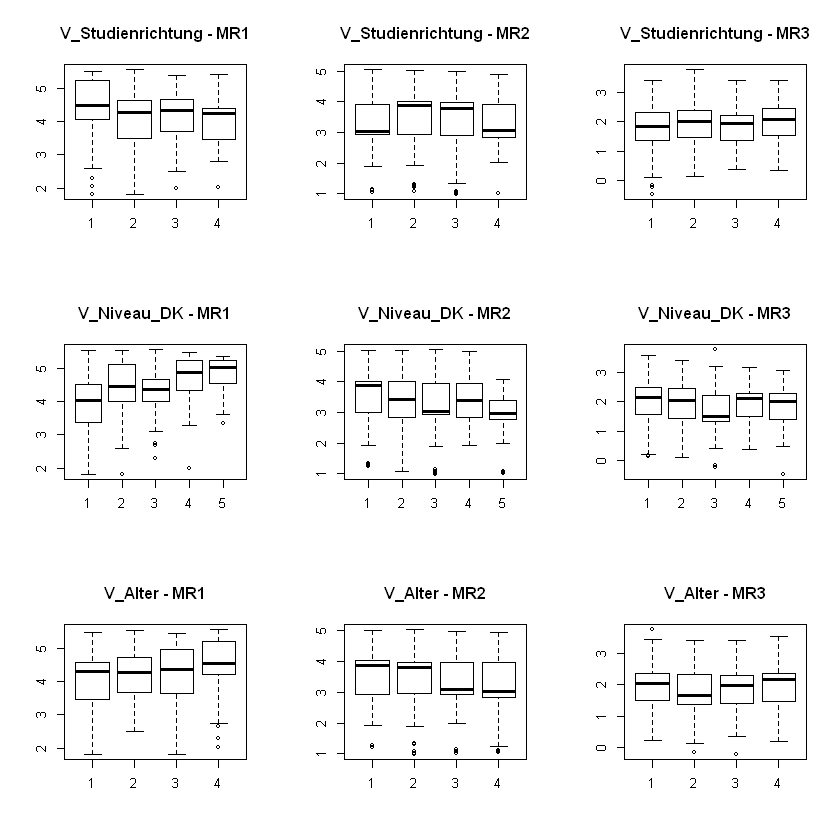

In [225]:
par(mfrow=c(3,3))
boxplot(MR1~V_Studienrichtung, data = Df_total2, main = 'V_Studienrichtung - MR1')
boxplot(MR2~V_Studienrichtung, data = Df_total2, main = 'V_Studienrichtung - MR2')
boxplot(MR3~V_Studienrichtung, data = Df_total2, main = 'V_Studienrichtung - MR3')
boxplot(MR1~V_Niveau_DK, data = Df_total2, main = 'V_Niveau_DK - MR1')
boxplot(MR2~V_Niveau_DK, data = Df_total2, main = 'V_Niveau_DK - MR2')
boxplot(MR3~V_Niveau_DK, data = Df_total2, main = 'V_Niveau_DK - MR3')
boxplot(MR1~V_Alter, data = Df_total2, main = 'V_Alter - MR1')
boxplot(MR2~V_Alter, data = Df_total2, main = 'V_Alter - MR2')
boxplot(MR3~V_Alter, data = Df_total2, main = 'V_Alter - MR3')

Dichotome Variablen (Faktoren-Scores mit signifikanten Unterschieden im t-Test):

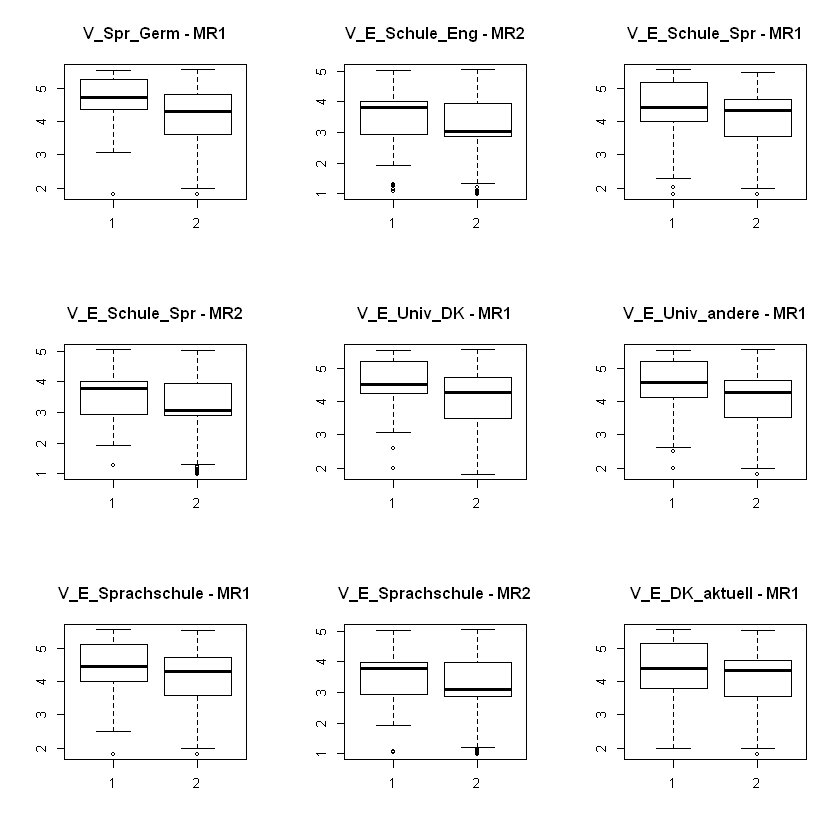

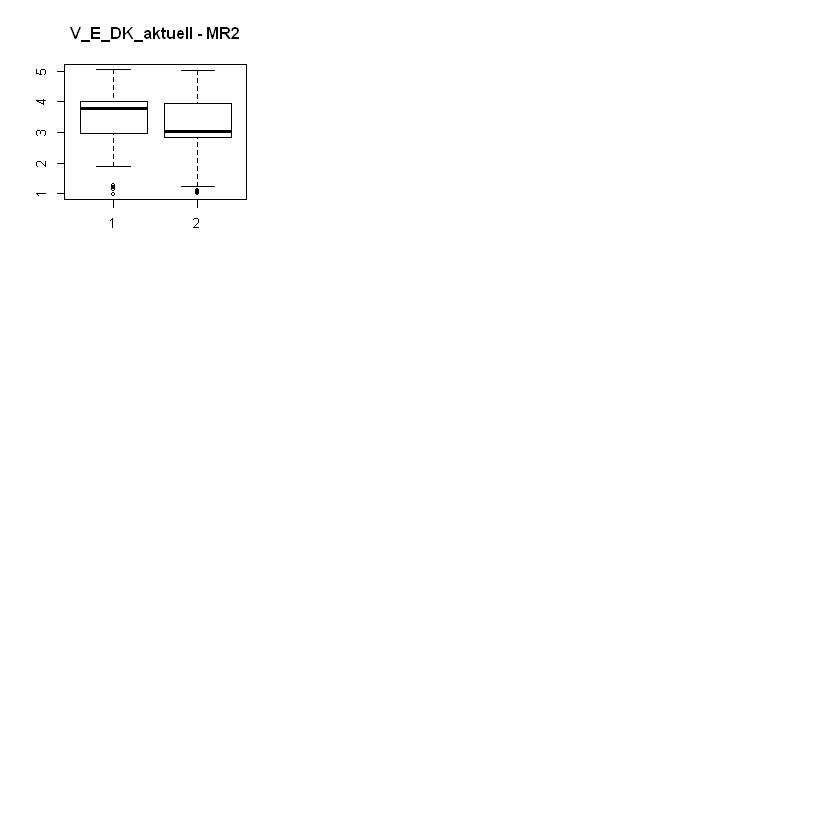

In [226]:
par(mfrow=c(3,3))
boxplot(MR1~V_Spr_Germ, data = Df_total2, main = 'V_Spr_Germ - MR1')
boxplot(MR2~V_E_Schule_Eng, data = Df_total2, main = 'V_E_Schule_Eng - MR2')
boxplot(MR1~V_E_Schule_Spr, data = Df_total2, main = 'V_E_Schule_Spr - MR1')
boxplot(MR2~V_E_Schule_Spr, data = Df_total2, main = 'V_E_Schule_Spr - MR2')
boxplot(MR1~V_E_Univ_DK, data = Df_total2, main = 'V_E_Univ_DK - MR1')
boxplot(MR1~V_E_Univ_andere, data = Df_total2, main = 'V_E_Univ_andere - MR1')
boxplot(MR1~V_E_Sprachschule, data = Df_total2, main = 'V_E_Sprachschule - MR1')
boxplot(MR2~V_E_Sprachschule, data = Df_total2, main = 'V_E_Sprachschule - MR2')
boxplot(MR1~V_E_DK_aktuell, data = Df_total2, main = 'V_E_DK_aktuell - MR1')
boxplot(MR2~V_E_DK_aktuell, data = Df_total2, main = 'V_E_DK_aktuell - MR2')

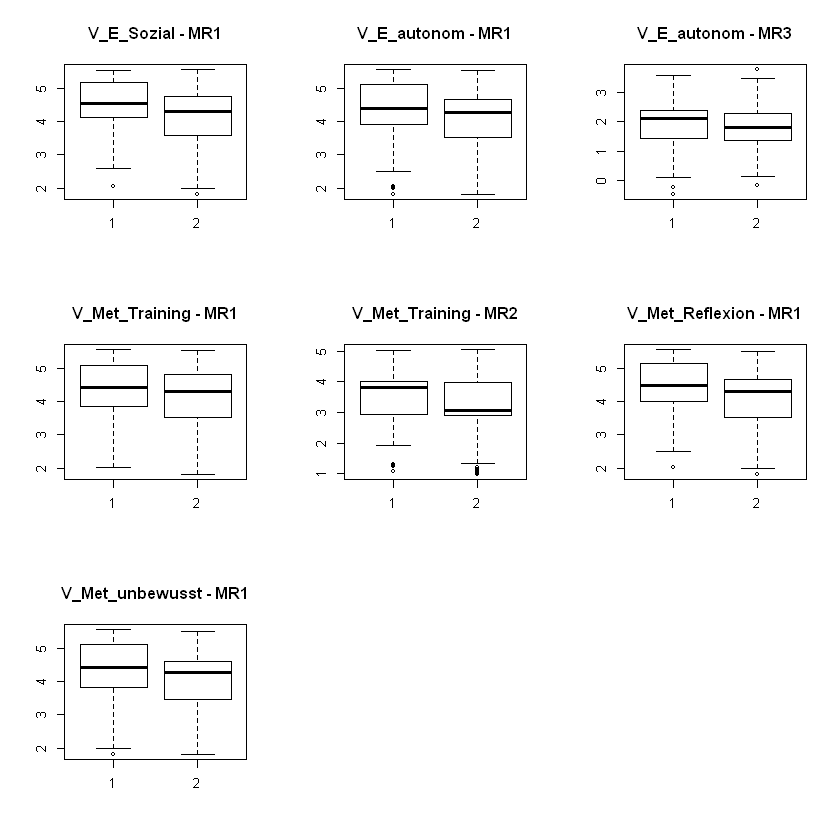

In [227]:
par(mfrow=c(3,3))
boxplot(MR1~V_E_Sozial, data = Df_total2, main = 'V_E_Sozial - MR1')
boxplot(MR1~V_E_autonom, data = Df_total2, main = 'V_E_autonom - MR1')
boxplot(MR3~V_E_autonom, data = Df_total2, main = 'V_E_autonom - MR3')
boxplot(MR1~V_Met_Training, data = Df_total2, main = 'V_Met_Training - MR1')
boxplot(MR2~V_Met_Training, data = Df_total2, main = 'V_Met_Training - MR2')
boxplot(MR1~V_Met_Reflexion, data = Df_total2, main = 'V_Met_Reflexion - MR1')
boxplot(MR1~V_Met_unbewusst, data = Df_total2, main = 'V_Met_unbewusst - MR1')

#### Niveaugruppe A1

MANOVA:

In [228]:
res_anova2A <- MANOVA2_table(Df_total2[which(Df_total2$V_Niveau_DK=='1'),],vec_V[!vec_V %in% remove])
res_anova2A[res_anova2A['Pr(>F)'] < 0.05,]

,Df,Pillai,approx F,num Df,den Df,Pr(>F)
V_E_Univ_DK,1,0.07099764,3.770228,3,148,0.01207812
V_E_DK_aktuell,1,0.06083667,3.195691,3,148,0.02531988
V_E_Sozial,1,0.05725683,2.996224,3,148,0.03272407


T-Test:

In [229]:
tabletstbonf2(Df_total2[which(Df_total2$V_Niveau_DK=='1'),],c('V_E_Univ_DK',
 'V_E_DK_aktuell',
 'V_E_Sozial'
 ))

,MR1,MR2,MR3
V_E_Univ_DK,0.003763959,0.34908579,0.55029423
V_E_DK_aktuell,0.353158876,0.01632941,0.27647379
V_E_Sozial,0.064430965,0.86498322,0.01339737


Deskriptive Statistik der Gruppen der Variablen mit p < 0.05 in der MANOVA:

In [230]:
df_details2(Df_total2[which((Df_total2$V_Niveau_DK=='1')&(Df_total2$V_E_Univ_DK=='1')),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,30,4.353673,0.6969755,4.367336,4.359356,0.7468052,3.069435,5.527126,2.457690,-0.0225254,-0.9944416,0.1272497,3.069435,3.815712,4.367336,4.353673,4.745290,5.527126
MR2,2,30,3.427587,0.8286169,3.787644,3.430435,1.0282259,1.921391,4.892751,2.971360,-0.2205858,-0.8298564,0.1512841,1.921391,2.893653,3.787644,3.427587,3.914048,4.892751
MR3,3,30,2.006175,0.7592547,2.172064,2.017846,0.7832638,0.345293,3.349216,3.003923,-0.1649878,-0.5903714,0.1386203,0.345293,1.495802,2.172064,2.006175,2.376387,3.349216


In [231]:
df_details2(Df_total2[which((Df_total2$V_Niveau_DK=='1')&(Df_total2$V_E_Univ_DK=='2')),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,122,3.854672,0.8611286,3.843383,3.857979,0.9161437,1.8161166,5.480653,3.664537,-0.07760222,-0.68509203,0.07796292,1.8161166,3.243213,3.843383,3.854672,4.454567,5.480653
MR2,2,122,3.600512,0.9203969,3.915912,3.658483,1.2415704,1.2506026,5.013733,3.763131,-0.48041334,-0.27252428,0.08332882,1.2506026,3.022788,3.915912,3.600512,4.043174,5.013733
MR3,3,122,2.094519,0.7154331,2.092505,2.089417,0.6997620,0.1383936,3.551351,3.412957,-0.09987730,0.02714558,0.06477227,0.1383936,1.569218,2.092505,2.094519,2.499191,3.551351


In [232]:
df_details2(Df_total2[which((Df_total2$V_Niveau_DK=='1')&(Df_total2$V_E_DK_aktuell=='1')),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,87,3.897451,0.8345987,3.742395,3.884779,0.8748624,2.0078137,5.527126,3.519312,0.1949175,-0.7998267,0.08947837,2.0078137,3.368185,3.742395,3.897451,4.459139,5.527126
MR2,2,87,3.717718,0.8242654,3.912414,3.750831,1.2136834,1.2791146,5.013733,3.734619,-0.3201235,-0.2908085,0.08837053,1.2791146,3.062981,3.912414,3.717718,4.043701,5.013733
MR3,3,87,2.132379,0.7215586,2.222490,2.152067,0.7147642,0.1383936,3.462209,3.323815,-0.3682689,0.1862388,0.07735920,0.1383936,1.634466,2.222490,2.132379,2.547314,3.462209


In [233]:
df_details2(Df_total2[which((Df_total2$V_Niveau_DK=='1')&(Df_total2$V_E_DK_aktuell=='2')),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,65,4.027722,0.8774493,4.317397,4.075091,0.8148322,1.8161166,5.480653,3.664537,-0.5677007,-0.2729856,0.10883419,1.8161166,3.487786,4.317397,4.027722,4.506903,5.480653
MR2,2,65,3.363824,0.9686118,3.815464,3.387445,1.1836135,1.2506026,4.951837,3.701235,-0.3646271,-0.7525198,0.12014151,1.2506026,2.859235,3.815464,3.363824,4.002547,4.951837
MR3,3,65,2.003069,0.7228521,1.847739,1.980091,0.6434228,0.2224271,3.551351,3.328923,0.2073434,-0.2500477,0.08965877,0.2224271,1.500206,1.847739,2.003069,2.371034,3.551351


In [234]:
df_details2(Df_total2[which((Df_total2$V_Niveau_DK=='1')&(Df_total2$V_E_Sozial=='1')),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,21,4.272389,0.8851837,4.276395,4.310752,1.1719476,2.0382283,5.527126,3.488897,-0.4700474,-0.27525778,0.1931629,2.0382283,3.539795,4.276395,4.272389,5.066862,5.527126
MR2,2,21,3.597642,0.8415013,3.939451,3.685782,0.2241341,1.2791146,4.807699,3.528585,-1.0622460,0.78916730,0.1836306,1.2791146,3.063090,3.939451,3.597642,4.029585,4.807699
MR3,3,21,2.437206,0.7607414,2.379502,2.517195,0.7883924,0.5173758,3.462209,2.944833,-0.8162663,0.05172976,0.1660074,0.5173758,2.252692,2.379502,2.437206,2.994373,3.462209


In [235]:
df_details2(Df_total2[which((Df_total2$V_Niveau_DK=='1')&(Df_total2$V_E_Sozial=='2')),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,131,3.901985,0.8396688,3.959444,3.906339,0.8381979,1.8161166,5.480653,3.664537,-0.11351693,-0.6712529,0.07336220,1.8161166,3.303014,3.959444,3.901985,4.432174,5.480653
MR2,2,131,3.561371,0.9154574,3.872002,3.602290,1.2291810,1.2506026,5.013733,3.763131,-0.33563311,-0.5072599,0.07998388,1.2506026,2.971117,3.872002,3.561371,4.029630,5.013733
MR3,3,131,2.019352,0.7022167,1.936729,2.010065,0.6420866,0.1383936,3.551351,3.412957,-0.03894288,0.1410793,0.06135295,0.1383936,1.547549,1.936729,2.019352,2.390999,3.551351


Boxplots:

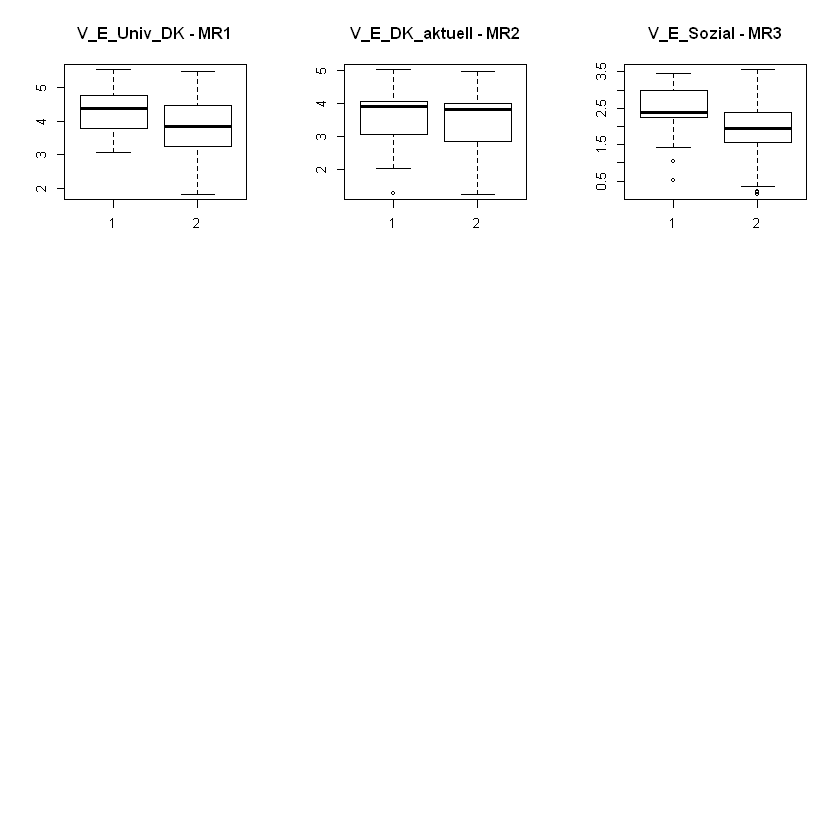

In [236]:
par(mfrow=c(3,3))
boxplot(MR1~V_E_Univ_DK, data = Df_total2[which(Df_total2$V_Niveau_DK=='1'),], main = 'V_E_Univ_DK - MR1')
boxplot(MR2~V_E_DK_aktuell, data = Df_total2[which(Df_total2$V_Niveau_DK=='1'),], main = 'V_E_DK_aktuell - MR2')
boxplot(MR3~V_E_Sozial, data = Df_total2[which(Df_total2$V_Niveau_DK=='1'),], main = 'V_E_Sozial - MR3')

#### Niveaugruppe A2

MANOVA:

In [237]:
res_anova2A <- MANOVA2_table(Df_total2[which(Df_total2$V_Niveau_DK=='2'),],vec_V[!vec_V %in% remove])
res_anova2A[res_anova2A['Pr(>F)'] < 0.05,]

,Df,Pillai,approx F,num Df,den Df,Pr(>F)
V_E_Schule_Eng,1,0.1615030,3.980610,3,62,0.01168733
V_Met_Erkl,1,0.1442747,3.484385,3,62,0.02094564


T-Test:

In [238]:
tabletstbonf2(Df_total2[which(Df_total2$V_Niveau_DK=='2'),],c('V_E_Schule_Eng','V_Met_Erkl'))

,MR1,MR2,MR3
V_E_Schule_Eng,0.003035794,0.12148156,0.7454012
V_Met_Erkl,0.057799951,0.01681794,0.6260147


Deskriptive Statistik der Gruppen der Variablen mit p < 0.05 in der MANOVA:

In [239]:
df_details2(Df_total2[which((Df_total2$V_Niveau_DK=='2')&(Df_total2$V_E_Schule_Eng=='1')),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,40,4.657560,0.6721823,4.575550,4.722482,0.8089970,2.5925865,5.502637,2.910050,-0.70244898,0.2887195,0.1062813,2.5925865,4.289351,4.575550,4.657560,5.351620,5.502637
MR2,2,40,3.558105,1.0285801,3.797925,3.581565,1.3563716,1.9103151,5.024839,3.114524,-0.07680797,-1.2717220,0.1626328,1.9103151,2.891496,3.797925,3.558105,4.247377,5.024839
MR3,3,40,1.913114,0.6966074,2.035880,1.904335,0.7609515,0.3341509,3.189460,2.855309,-0.08661864,-0.2967900,0.1101433,0.3341509,1.410816,2.035880,1.913114,2.261030,3.189460


In [240]:
df_details2(Df_total2[which((Df_total2$V_Niveau_DK=='2')&(Df_total2$V_E_Schule_Eng=='2')),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,26,4.042837,0.9489354,4.172913,4.082677,0.9854177,1.8146460,5.524191,3.709545,-0.4073056,-0.5881617,0.1861015,1.8146460,3.460328,4.172913,4.042837,4.626021,5.524191
MR2,2,26,3.137962,1.1137981,3.083202,3.160894,1.2773281,1.0908454,4.932972,3.842127,-0.2723213,-0.8689879,0.2184338,1.0908454,2.270087,3.083202,3.137962,3.894123,4.932972
MR3,3,26,1.975284,0.8420484,2.026692,2.002105,0.7373271,0.1121812,3.410280,3.298099,-0.3096979,-0.4850473,0.1651393,0.1121812,1.431549,2.026692,1.975284,2.456073,3.410280


In [241]:
df_details2(Df_total2[which((Df_total2$V_Niveau_DK=='2')&(Df_total2$V_Met_Erkl=='1')),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,42,4.563679,0.6944053,4.497348,4.614988,0.7653531,2.5925865,5.524191,2.931604,-0.4561703,-0.17454322,0.1071491,2.5925865,4.241769,4.497348,4.563679,5.348372,5.524191
MR2,2,42,3.629086,0.9977485,3.865959,3.669229,1.3682039,1.9103151,5.024839,3.114524,-0.1773092,-1.16791223,0.1539559,1.9103151,2.938060,3.865959,3.629086,4.595288,5.024839
MR3,3,42,1.972052,0.7065633,2.044358,1.981993,0.6357374,0.1121812,3.216117,3.103936,-0.3246533,0.03023638,0.1090251,0.1121812,1.443906,2.044358,1.972052,2.418695,3.216117


In [242]:
df_details2(Df_total2[which((Df_total2$V_Niveau_DK=='2')&(Df_total2$V_Met_Erkl=='2')),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,24,4.155901,1.0167742,4.287220,4.229648,1.1753837,1.8146460,5.381225,3.566579,-0.56701372,-0.7572650,0.2075482,1.8146460,3.624802,4.287220,4.155901,5.084476,5.381225
MR2,2,24,2.978733,1.0990305,2.991003,2.970758,1.3251800,1.0908454,4.954517,3.863671,-0.07849324,-0.9179428,0.2243387,1.0908454,2.072583,2.991003,2.978733,3.830636,4.954517
MR3,3,24,1.877323,0.8368342,1.999957,1.876135,0.8456625,0.3341509,3.410280,3.076129,0.01750079,-0.7527018,0.1708181,0.3341509,1.361574,1.999957,1.877323,2.399521,3.410280


Boxplots:

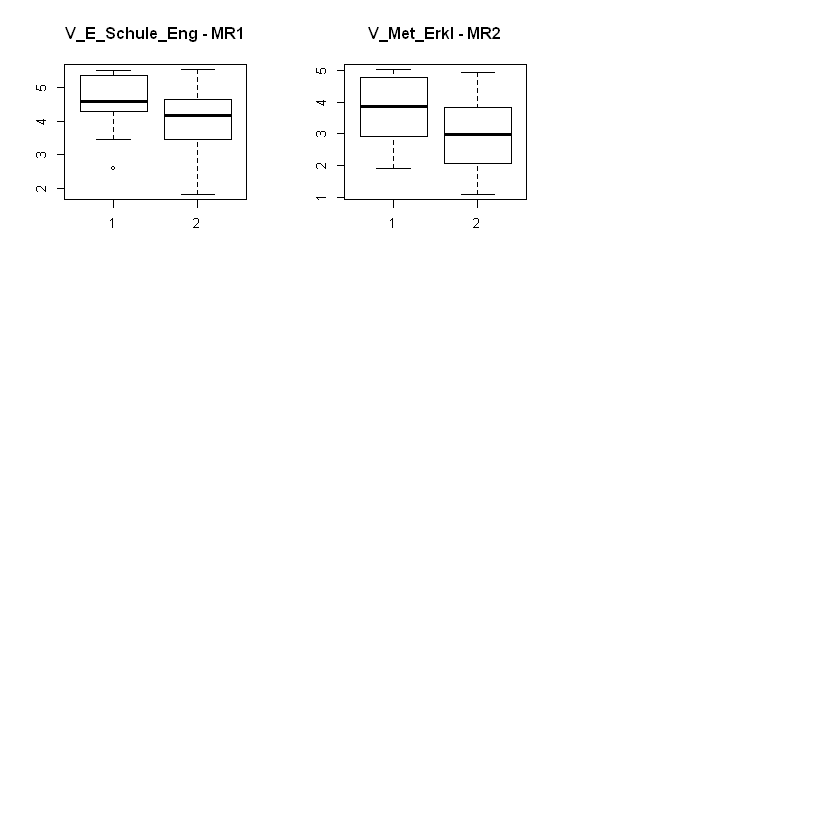

In [243]:
par(mfrow=c(3,3))
boxplot(MR1~V_E_Schule_Eng, data = Df_total2[which(Df_total2$V_Niveau_DK=='2'),], main = 'V_E_Schule_Eng - MR1')
boxplot(MR2~V_Met_Erkl, data = Df_total2[which(Df_total2$V_Niveau_DK=='2'),], main = 'V_Met_Erkl - MR2')

#### Niveaugruppe B1

MANOVA:

In [244]:
res_anova2A <- MANOVA2_table(Df_total2[which(Df_total2$V_Niveau_DK=='3'),],vec_V[!vec_V %in% remove])
res_anova2A[res_anova2A['Pr(>F)'] < 0.05,]

,Df,Pillai,approx F,num Df,den Df,Pr(>F)
V_Spr_Germ,1,0.10552389,3.893104,3,99,0.011222084
V_E_Schule_Spr,1,0.11748869,4.393289,3,99,0.006032423
V_E_DK_aktuell,1,0.15013766,5.829818,3,99,0.001038973
V_Met_unbewusst,1,0.08631338,3.117416,3,99,0.029543217


T-Test:

In [245]:
tabletstbonf2(Df_total2[which(Df_total2$V_Niveau_DK=='3'),],c('V_Spr_Germ',
 'V_E_Schule_Spr',                                                             
 'V_E_DK_aktuell',
 'V_Met_unbewusst'
 ))

,MR1,MR2,MR3
V_Spr_Germ,0.7340752194,0.0325437164,0.007535634
V_E_Schule_Spr,0.2064510977,0.0009323736,0.760006150
V_E_DK_aktuell,0.0002094006,0.0648808647,0.442166581
V_Met_unbewusst,0.0050459571,0.4698587561,0.158121289


Deskriptive Statistik der Gruppen der Variablen mit p < 0.05 in der MANOVA:

In [246]:
df_details2(Df_total2[which((Df_total2$V_Niveau_DK=='3')&(Df_total2$V_Spr_Germ=='1')),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,6,4.429803,0.6299178,4.486806,4.429803,0.4658164,3.518498,5.387019,1.868520,0.0505072,-1.3518269,0.2571628,3.518498,4.123114,4.486806,4.429803,4.645055,5.387019
MR2,2,6,4.110535,0.8064330,4.004688,4.110535,0.8544350,2.864818,5.045913,2.181095,-0.1786049,-1.5516068,0.3292249,2.864818,3.839701,4.004688,4.110535,4.719970,5.045913
MR3,3,6,2.433557,0.3788938,2.327088,2.433557,0.1226702,2.155632,3.184983,1.029350,1.1914214,-0.3515279,0.1546827,2.155632,2.233933,2.327088,2.433557,2.384524,3.184983


In [247]:
df_details2(Df_total2[which((Df_total2$V_Niveau_DK=='3')&(Df_total2$V_Spr_Germ=='2')),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,97,4.330781,0.6940134,4.346050,4.365317,0.5018155,2.2936223,5.554605,3.260983,-0.4260655,-0.09646931,0.07046638,2.2936223,3.989746,4.346050,4.330781,4.674162,5.554605
MR2,2,97,3.289181,0.9053986,3.030753,3.317026,1.1617189,0.9884927,4.966727,3.978234,-0.3449968,0.25414230,0.09192930,0.9884927,2.924216,3.030753,3.289181,3.932725,4.966727
MR3,3,97,1.640222,0.7040065,1.456249,1.635136,0.5966736,-0.2166885,3.753259,3.969948,0.1697671,0.36294511,0.07148103,-0.2166885,1.316877,1.456249,1.640222,2.166608,3.753259


In [248]:
df_details2(Df_total2[which((Df_total2$V_Niveau_DK=='3')&(Df_total2$V_E_Schule_Spr=='1')),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,43,4.438063,0.7366645,4.491951,4.518165,0.6110198,2.2936223,5.554605,3.260983,-0.876465262,0.8112182,0.11234028,2.2936223,4.191000,4.491951,4.438063,5.071659,5.554605
MR2,2,43,3.683436,0.8141725,3.881649,3.685116,1.2795970,1.9830969,5.045913,3.062816,0.005348224,-0.8828421,0.12416015,1.9830969,2.992342,3.881649,3.683436,4.014829,5.045913
MR3,3,43,1.660902,0.6333389,1.459936,1.676820,0.8664634,0.4291056,3.184983,2.755877,-0.019631298,-0.5848886,0.09658328,0.4291056,1.320844,1.459936,1.660902,2.185015,3.184983


In [249]:
df_details2(Df_total2[which((Df_total2$V_Niveau_DK=='3')&(Df_total2$V_E_Schule_Spr=='2')),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,60,4.263798,0.6473572,4.327010,4.262787,0.5208577,3.1002795,5.417863,2.317583,-0.02947287,-0.8295430,0.08357346,3.1002795,3.708236,4.327010,4.263798,4.618567,5.417863
MR2,2,60,3.088767,0.9118848,2.977409,3.152014,0.7723317,0.9884927,4.954546,3.966054,-0.43456004,0.2507384,0.11772382,0.9884927,2.858791,2.977409,3.088767,3.875430,4.954546
MR3,3,60,1.704734,0.7697571,1.498550,1.694834,0.6110318,-0.2166885,3.753259,3.969948,0.11787617,0.2441337,0.09937522,-0.2166885,1.344172,1.498550,1.704734,2.231199,3.753259


In [250]:
df_details2(Df_total2[which((Df_total2$V_Niveau_DK=='3')&(Df_total2$V_E_DK_aktuell=='1')),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,65,4.523697,0.5777389,4.494617,4.547141,0.5416388,3.1761927,5.554605,2.378413,-0.18342763,-0.6057620,0.07165969,3.1761927,4.254841,4.494617,4.523697,4.98961,5.554605
MR2,2,65,3.464420,0.8704978,3.787012,3.502560,1.1512115,0.9884927,5.045913,4.057420,-0.43025632,0.3100987,0.10797197,0.9884927,2.956586,3.787012,3.464420,3.95853,5.045913
MR3,3,65,1.727964,0.7192373,1.500206,1.730864,0.8778471,-0.1514768,3.184983,3.336460,-0.01745955,-0.2979783,0.08921040,-0.1514768,1.316877,1.500206,1.727964,2.25167,3.184983


In [251]:
df_details2(Df_total2[which((Df_total2$V_Niveau_DK=='3')&(Df_total2$V_E_DK_aktuell=='2')),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,38,4.016428,0.7487908,4.191240,4.026709,0.6044894,2.2936223,5.381225,3.087602,-0.1836705,-0.4667117,0.1214699,2.2936223,3.525662,4.191240,4.016428,4.456713,5.381225
MR2,2,38,3.119117,0.9642659,2.994176,3.144285,0.2776632,1.0205824,4.947859,3.927277,-0.1092242,0.0953523,0.1564246,1.0205824,2.846737,2.994176,3.119117,3.880633,4.947859
MR3,3,38,1.615399,0.7060151,1.476571,1.610179,0.6668320,-0.2166885,3.753259,3.969948,0.2898758,1.1001877,0.1145308,-0.2166885,1.342568,1.476571,1.615399,2.160536,3.753259


In [252]:
df_details2(Df_total2[which((Df_total2$V_Niveau_DK=='3')&(Df_total2$V_Met_unbewusst=='1')),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,68,4.471289,0.6719985,4.503412,4.524021,0.5166962,2.2936223,5.554605,3.260983,-0.7213797,0.6866534,0.08149179,2.2936223,4.237252,4.503412,4.471289,4.938124,5.554605
MR2,2,68,3.384159,0.8912156,3.122891,3.422679,1.1327961,0.9884927,5.045913,4.057420,-0.4804717,0.3354501,0.10807577,0.9884927,2.925329,3.122891,3.384159,3.950659,5.045913
MR3,3,68,1.757749,0.6600336,1.492276,1.745432,0.8059478,0.4291056,3.184983,2.755877,0.2049615,-0.5458825,0.08004083,0.4291056,1.322827,1.492276,1.757749,2.257284,3.184983


In [253]:
df_details2(Df_total2[which((Df_total2$V_Niveau_DK=='3')&(Df_total2$V_Met_unbewusst=='2')),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,35,4.074769,0.6505470,4.146254,4.063693,0.5541544,2.6859232,5.293814,2.607891,0.04548914,-0.55678993,0.1099625,2.6859232,3.571302,4.146254,4.074769,4.406007,5.293814
MR2,2,35,3.245456,0.9716418,3.003655,3.265431,0.3912566,1.0205824,4.966727,3.946144,-0.06051532,-0.05272318,0.1642374,1.0205824,2.910718,3.003655,3.245456,3.879618,4.966727
MR3,3,35,1.547883,0.7979430,1.496893,1.550165,0.6556637,-0.2166885,3.753259,3.969948,0.13801631,0.56528850,0.1348770,-0.2166885,1.333832,1.496893,1.547883,2.129772,3.753259


Boxplots:

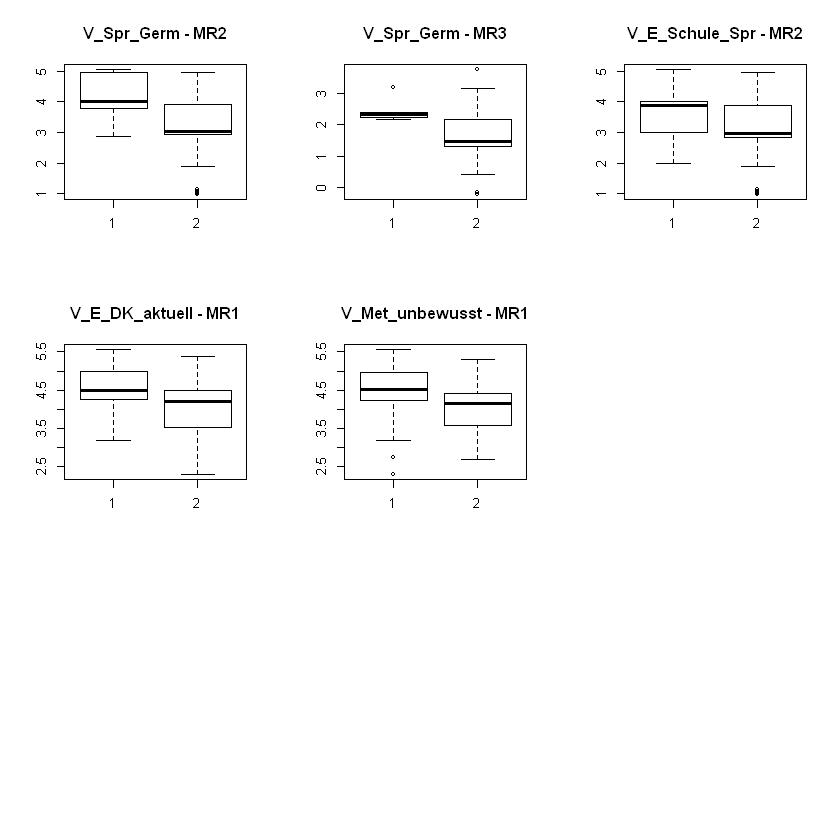

In [254]:
par(mfrow=c(3,3))
boxplot(MR2~V_Spr_Germ, data = Df_total2[which(Df_total2$V_Niveau_DK=='3'),], main = 'V_Spr_Germ - MR2')
boxplot(MR3~V_Spr_Germ, data = Df_total2[which(Df_total2$V_Niveau_DK=='3'),], main = 'V_Spr_Germ - MR3')
boxplot(MR2~V_E_Schule_Spr, data = Df_total2[which(Df_total2$V_Niveau_DK=='3'),], main = 'V_E_Schule_Spr - MR2')
boxplot(MR1~V_E_DK_aktuell, data = Df_total2[which(Df_total2$V_Niveau_DK=='3'),], main = 'V_E_DK_aktuell - MR1')
boxplot(MR1~V_Met_unbewusst, data = Df_total2[which(Df_total2$V_Niveau_DK=='3'),], main = 'V_Met_unbewusst - MR1')

#### Niveaugruppe B2

MANOVA:

In [255]:
res_anova2A <- MANOVA2_table(Df_total2[which(Df_total2$V_Niveau_DK=='4'),],vec_V[!vec_V %in% remove])
res_anova2A[res_anova2A['Pr(>F)'] < 0.05,]

,Df,Pillai,approx F,num Df,den Df,Pr(>F)
V_Studienrichtung,2,0.5134371,2.878211,6,50,0.017329302
V_Spr_Zahl,3,0.6585984,2.812838,9,90,0.005870778
V_Spr_Slaw,1,0.2524333,3.376732,3,30,0.031099649


T-Test:

In [256]:
tabletstbonf2(Df_total2[which(Df_total2$V_Niveau_DK=='4'),],c('V_Spr_Slaw'))

,MR1,MR2,MR3
V_Spr_Slaw,0.6744139,0.1589864,0.009705304


Deskriptive Statistik der Gruppen der Variablen mit p < 0.05 in der MANOVA:

In [257]:
df_details2(Df_total2[which((Df_total2$V_Niveau_DK=='4')&(Df_total2$V_Studienrichtung=='1')),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,12,5.240653,0.2271151,5.285868,5.284258,0.09000259,4.588120,5.457138,0.8690182,-1.8447070,2.8070911,0.06556247,4.588120,5.225896,5.285868,5.240653,5.349567,5.457138
MR2,2,12,3.161792,0.7344450,3.005921,3.203626,1.23407161,1.932170,3.973075,2.0409052,-0.3449131,-1.3527327,0.21201601,1.932170,2.832311,3.005921,3.161792,3.878117,3.973075
MR3,3,12,2.079566,0.6098291,2.068246,2.065876,0.30941884,1.131698,3.164330,2.0326326,0.2496513,-0.8339989,0.17604248,1.131698,1.850385,2.068246,2.079566,2.275536,3.164330


In [258]:
df_details2(Df_total2[which((Df_total2$V_Niveau_DK=='4')&(Df_total2$V_Studienrichtung=='2')),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,5,4.203830,1.3142929,4.588120,4.203830,0.4300125,1.9900925,5.487850,3.497758,-0.7560623,-1.203778,0.5877697,1.9900925,4.298080,4.588120,4.203830,4.655006,5.487850
MR2,2,5,3.959006,0.6524376,3.973075,3.959006,0.2093138,3.0105307,4.836053,1.825522,-0.1266089,-1.452918,0.2917790,3.0105307,3.861116,3.973075,3.959006,4.114255,4.836053
MR3,3,5,1.987935,0.9527981,2.274125,1.987935,0.5110513,0.3990541,2.886473,2.487419,-0.7314604,-1.282413,0.4261043,0.3990541,1.929426,2.274125,1.987935,2.450596,2.886473


In [259]:
df_details2(Df_total2[which((Df_total2$V_Niveau_DK=='4')&(Df_total2$V_Studienrichtung=='3')),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,12,4.388484,0.4860130,4.376628,4.422997,0.2114743,3.2804952,5.151339,1.870843,-0.43338552,0.1803675,0.1402999,3.2804952,4.259540,4.376628,4.388484,4.510334,5.151339
MR2,2,12,3.221602,0.9930337,3.352271,3.168802,0.9584548,1.9845713,4.986636,3.002065,0.07897352,-1.4600697,0.2866641,1.9845713,2.107192,3.352271,3.221602,3.908184,4.986636
MR3,3,12,1.683313,0.6833710,1.939734,1.732461,0.6632777,0.3820987,2.493044,2.110945,-0.59589281,-1.1345688,0.1972722,0.3820987,1.304913,1.939734,1.683313,2.188417,2.493044


In [468]:
#df_details2(Df_total2[which((Df_total2$V_Niveau_DK=='4')&(Df_total2$V_Studienrichtung=='4')),])

In [260]:
df_details2(Df_total2[which((Df_total2$V_Niveau_DK=='4')&(Df_total2$V_Spr_Zahl=='1')),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,1,1.990093,NA,1.990093,1.990093,0,1.990093,1.990093,0,NA,NA,NA,1.990093,1.990093,1.990093,1.990093,1.990093,1.990093
MR2,2,1,4.114255,NA,4.114255,4.114255,0,4.114255,4.114255,0,NA,NA,NA,4.114255,4.114255,4.114255,4.114255,4.114255,4.114255
MR3,3,1,1.929426,NA,1.929426,1.929426,0,1.929426,1.929426,0,NA,NA,NA,1.929426,1.929426,1.929426,1.929426,1.929426,1.929426


In [261]:
df_details2(Df_total2[which((Df_total2$V_Niveau_DK=='4')&(Df_total2$V_Spr_Zahl=='3')),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,5,4.940510,0.5316005,5.117367,4.940510,0.5129716,4.200613,5.463361,1.2627483,-0.3193040,-1.961755,0.23773898,4.200613,4.588120,5.117367,4.940510,5.333089,5.463361
MR2,2,5,3.193613,1.2384633,2.899957,3.193613,1.2390952,2.064199,4.922307,2.8581088,0.3049156,-1.952577,0.55385762,2.064199,2.108528,2.899957,3.193613,3.973075,4.922307
MR3,3,5,2.145019,0.2043149,2.229386,2.145019,0.1156418,1.805110,2.307385,0.5022756,-0.7570874,-1.350255,0.09137241,1.805110,2.109090,2.229386,2.145019,2.274125,2.307385


In [262]:
df_details2(Df_total2[which((Df_total2$V_Niveau_DK=='4')&(Df_total2$V_Spr_Zahl=='4')),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,7,5.164125,0.255135,5.241118,5.164125,0.2077222,4.6550063,5.417863,0.7628564,-0.9018035,-0.5166093,0.09643195,4.6550063,5.103993,5.241118,5.164125,5.313451,5.417863
MR2,2,7,3.062032,1.012195,2.834053,3.062032,1.1113161,1.9321699,4.836053,2.9038829,0.5122439,-1.2458121,0.38257384,1.9321699,2.455783,2.834053,3.062032,3.460191,4.836053
MR3,3,7,1.525304,0.611592,1.513526,1.525304,0.6659016,0.3990541,2.179635,1.7805810,-0.6007803,-1.0621334,0.23116005,0.3990541,1.297421,1.513526,1.525304,1.995037,2.179635


In [263]:
df_details2(Df_total2[which((Df_total2$V_Niveau_DK=='4')&(Df_total2$V_Spr_Zahl=='5')),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,21,4.633469,0.6236939,4.458277,4.676872,0.6589760,3.2804952,5.487850,2.207355,-0.3017565,-0.8686339,0.1361012,3.2804952,4.298080,4.458277,4.633469,5.223695,5.487850
MR2,2,21,3.375807,0.8232081,3.801870,3.408085,0.3019574,1.9777621,4.986636,3.008874,-0.3420877,-0.8693599,0.1796387,1.9777621,2.966171,3.801870,3.375807,3.920644,4.986636
MR3,3,21,2.000262,0.7227481,2.179493,2.044955,0.4648702,0.3820987,3.164330,2.782232,-0.5463814,-0.3655254,0.1577166,0.3820987,1.621284,2.179493,2.000262,2.281173,3.164330


In [264]:
df_details2(Df_total2[which((Df_total2$V_Niveau_DK=='4')&(Df_total2$V_Spr_Slaw=='1')),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,5,4.843015,0.4609759,4.666504,4.843015,0.5654857,4.2850892,5.457138,1.172049,0.1533483,-1.890980,0.2061547,4.2850892,4.6550063,4.666504,4.843015,5.151339,5.457138
MR2,2,5,3.836993,0.6709248,3.801870,3.836993,0.1279695,2.9512241,4.836053,1.884829,0.1989771,-1.408849,0.3000467,2.9512241,3.7155554,3.801870,3.836993,3.880264,4.836053
MR3,3,5,1.237791,0.8219987,1.352277,1.237791,1.0814610,0.3820987,2.081713,1.699614,-0.0775328,-2.197501,0.3676090,0.3820987,0.3990541,1.352277,1.237791,1.973813,2.081713


In [265]:
df_details2(Df_total2[which((Df_total2$V_Niveau_DK=='4')&(Df_total2$V_Spr_Slaw=='2')),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,29,4.687217,0.7923181,5.099777,4.788299,0.5753571,1.9900925,5.487850,3.497758,-1.45538449,2.348684137,0.1471298,1.9900925,4.326258,5.099777,4.687217,5.245678,5.487850
MR2,2,29,3.214605,0.9184356,3.010531,3.176186,1.3454973,1.9321699,4.986636,3.054466,0.08388868,-1.205579645,0.1705492,1.9321699,2.108588,3.010531,3.214605,3.951531,4.986636
MR3,3,29,2.039593,0.5635673,2.179493,2.046294,0.3707496,0.6415108,3.164330,2.522820,-0.31283187,0.008557494,0.1046518,0.6415108,1.797755,2.179493,2.039593,2.279767,3.164330


Boxplots:

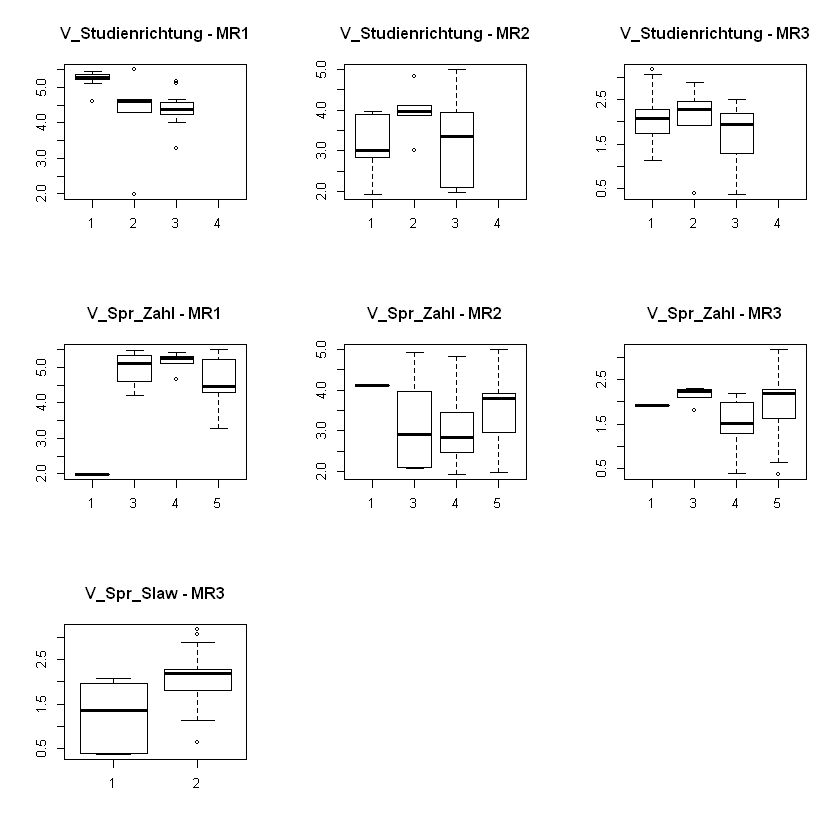

In [266]:
par(mfrow=c(3,3))
boxplot(MR1~V_Studienrichtung, data = Df_total2[which(Df_total2$V_Niveau_DK=='4'),], main = 'V_Studienrichtung - MR1')
boxplot(MR2~V_Studienrichtung, data = Df_total2[which(Df_total2$V_Niveau_DK=='4'),], main = 'V_Studienrichtung - MR2')
boxplot(MR3~V_Studienrichtung, data = Df_total2[which(Df_total2$V_Niveau_DK=='4'),], main = 'V_Studienrichtung - MR3')
boxplot(MR1~V_Spr_Zahl, data = Df_total2[which(Df_total2$V_Niveau_DK=='4'),], main = 'V_Spr_Zahl - MR1')
boxplot(MR2~V_Spr_Zahl, data = Df_total2[which(Df_total2$V_Niveau_DK=='4'),], main = 'V_Spr_Zahl - MR2')
boxplot(MR3~V_Spr_Zahl, data = Df_total2[which(Df_total2$V_Niveau_DK=='4'),], main = 'V_Spr_Zahl - MR3')
boxplot(MR3~V_Spr_Slaw, data = Df_total2[which(Df_total2$V_Niveau_DK=='4'),], main = 'V_Spr_Slaw - MR3')

#### Niveaugruppe C

MANOVA:

In [267]:
remove_sp <- c(67,70)

In [268]:
res_anova2A <- MANOVA2_table(Df_total2[which(Df_total2$V_Niveau_DK=='5'),],vec_V[!vec_V %in% remove_sp])
res_anova2A[res_anova2A['Pr(>F)'] < 0.05,]

Df,Pillai,approx F,num Df,den Df,Pr(>F)


### AQ3

#### MANOVA (Gesamt):

In [269]:
res_anova3 <- MANOVA3_table(Df_total,vec_V)
res3 <- res_anova3[res_anova3['Pr(>F)'] < 0.05,]
res3

,Df,Pillai,approx F,num Df,den Df,Pr(>F)
V_Studienrichtung,3,0.09157124,1.847107,18,1056,1.677323e-02
V_Niveau_DK,4,0.31881135,5.528321,24,1532,3.348372e-16
V_Alter,3,0.14401648,3.126426,18,1116,1.151253e-05
V_Spr_Germ,1,0.04993524,3.355069,6,383,3.104306e-03
V_E_Univ_DK,1,0.07562281,5.222172,6,383,3.487517e-05
V_E_Univ_andere,1,0.05889957,3.995063,6,383,6.813516e-04
V_E_Sozial,1,0.03445723,2.278014,6,383,3.575307e-02
V_E_autonom,1,0.03844979,2.552522,6,383,1.953146e-02
V_Met_unbewusst,1,0.03759818,2.493779,6,383,2.225827e-02


In [270]:
#write.csv2(res3, file ="D:\\Daten\\DISS\\Daten\\Resmanova3.csv",row.names=TRUE)

#### T-Test (Gesamt)

In [271]:
ttest_A3 <- tabletstbonf(Df_total,c('V_Spr_Germ',
 'V_E_Univ_DK',
 'V_E_Univ_andere',
 'V_E_Sozial',
 'V_E_autonom',
 'V_Met_unbewusst'
 ))
ttest_A3

,MR1,MR2,MR3,MR4,MR5,MR6
V_Spr_Germ,0.009509611,8.489184e-03,0.04475461,0.04646641,0.64219852,0.9986724
V_E_Univ_DK,0.858553769,8.718888e-06,0.02124233,0.15363378,0.04994204,0.7713164
V_E_Univ_andere,0.401098551,1.388439e-04,0.94092077,0.00162542,0.30199097,0.8193000
V_E_Sozial,0.037403622,8.048110e-02,0.56902404,0.36432732,0.01468615,0.3131402
V_E_autonom,0.026052682,5.708381e-02,0.26383344,0.84828509,0.02254485,0.3051606
V_Met_unbewusst,0.067568088,1.044458e-01,0.05622976,0.62255664,0.04335754,0.2145725


In [272]:
#write.csv2(ttest_A3, file ="D:\\Daten\\DISS\\Daten\\Ttest_A3.csv",row.names=TRUE)

#### Deskriptive Statistik der Gruppen der Variablen mit p < 0.05 in der MANOVA

In [273]:
df_details(Df_total[which(Df_total$V_Studienrichtung=='1'),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,131,2.112743,0.8885389,2.103379,2.128194,0.8477951,-0.3338985,4.025577,4.359475,-0.1892818,-0.24236564,0.07763201,-0.3338985,1.565594,2.103379,2.112743,2.772390,4.025577
MR2,2,131,3.502426,0.9583515,3.569826,3.581859,0.9763280,0.6710801,5.196618,4.525538,-0.6680196,-0.05579203,0.08373156,0.6710801,2.925794,3.569826,3.502426,4.235647,5.196618
MR3,3,131,3.219628,0.9937666,3.240336,3.197070,1.0153981,0.6698990,5.804806,5.134907,0.1652550,-0.21612746,0.08682579,0.6698990,2.537609,3.240336,3.219628,3.786895,5.804806
MR4,4,131,1.787405,1.0648385,1.874837,1.803102,0.9989229,-0.8240844,4.612436,5.436521,-0.0725152,-0.26939280,0.09303537,-0.8240844,1.169659,1.874837,1.787405,2.500523,4.612436
MR5,5,131,3.496359,0.9999113,3.565558,3.537081,1.0103619,0.1429925,5.703846,5.560854,-0.4748052,0.28596163,0.08736265,0.1429925,2.865058,3.565558,3.496359,4.226912,5.703846
MR6,6,131,2.614351,1.0182078,2.636566,2.635157,1.0662824,0.2999474,4.609336,4.309389,-0.1573865,-0.78738454,0.08896123,0.2999474,1.873746,2.636566,2.614351,3.288091,4.609336


In [274]:
df_details(Df_total[which(Df_total$V_Studienrichtung=='2'),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,129,1.979728,0.8918618,2.034283,2.016626,0.7088632,-1.6046254,3.928575,5.533200,-0.65634316,1.4930013,0.07852406,-1.6046254,1.553524,2.034283,1.979728,2.436144,3.928575
MR2,2,129,3.085564,1.0879936,3.257567,3.126465,1.1073757,0.2096223,5.038818,4.829195,-0.32234573,-0.6629957,0.09579249,0.2096223,2.333666,3.257567,3.085564,3.885637,5.038818
MR3,3,129,3.519403,0.8721567,3.592576,3.534049,0.9505349,1.4218072,5.655395,4.233588,-0.10869554,-0.3592673,0.07678911,1.4218072,2.867657,3.592576,3.519403,4.079192,5.655395
MR4,4,129,1.719370,0.9233961,1.753129,1.748003,0.8777552,-0.5189135,3.576122,4.095035,-0.27022749,-0.3102736,0.08130049,-0.5189135,1.094784,1.753129,1.719370,2.319536,3.576122
MR5,5,129,3.408178,0.8382897,3.328408,3.404514,0.8658441,0.5630702,5.704204,5.141134,-0.03152597,0.1125639,0.07380729,0.5630702,2.838481,3.328408,3.408178,4.061058,5.704204
MR6,6,129,2.819549,0.8901957,2.905416,2.858290,0.8364839,0.2820378,4.424725,4.142687,-0.38739780,-0.3894404,0.07837736,0.2820378,2.286945,2.905416,2.819549,3.424375,4.424725


In [275]:
df_details(Df_total[which(Df_total$V_Studienrichtung=='3'),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,70,1.936657,0.9418629,2.080589,1.985326,0.7831337,-0.76192303,3.724720,4.486643,-5.850280e-01,0.2988375,0.11257415,-0.76192303,1.3904239,2.080589,1.936657,2.520779,3.724720
MR2,2,70,3.139699,0.9425350,3.137388,3.172582,1.0685360,0.86163266,4.764309,3.902677,-2.766968e-01,-0.5506204,0.11265448,0.86163266,2.5592236,3.137388,3.139699,3.874749,4.764309
MR3,3,70,3.450079,0.8269174,3.390665,3.448012,0.8300414,1.23230896,5.106037,3.873728,-5.485786e-02,-0.1208342,0.09883554,1.23230896,2.9363023,3.390665,3.450079,4.010641,5.106037
MR4,4,70,1.700748,1.0654673,1.899056,1.764537,1.1616318,-0.83995354,3.590001,4.429954,-4.864595e-01,-0.6461975,0.12734770,-0.83995354,0.9429816,1.899056,1.700748,2.509244,3.590001
MR5,5,70,3.535484,0.8616809,3.521847,3.530673,0.9610399,1.64977789,5.343856,3.694079,8.699291e-05,-0.6767069,0.10299057,1.64977789,2.8713068,3.521847,3.535484,4.161224,5.343856
MR6,6,70,2.516459,0.9339859,2.575475,2.539976,0.9282703,0.04050664,4.399923,4.359416,-1.901553e-01,-0.3904276,0.11163267,0.04050664,1.8643131,2.575475,2.516459,3.104784,4.399923


In [276]:
df_details(Df_total[which(Df_total$V_Studienrichtung=='4'),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,29,1.996060,0.9300018,2.142599,2.026928,0.7962342,-0.425822060,3.767319,4.193141,-0.47961760,-0.1187889,0.1726970,-0.425822060,1.414383,2.142599,1.996060,2.565643,3.767319
MR2,2,29,2.977811,1.1589884,3.165728,3.023492,1.0623005,0.570117724,5.057485,4.487367,-0.45324634,-0.6021874,0.2152187,0.570117724,2.449216,3.165728,2.977811,3.820141,5.057485
MR3,3,29,3.537878,0.9658168,3.756050,3.583334,0.8544468,1.372665000,5.159123,3.786458,-0.60623179,-0.5726594,0.1793477,1.372665000,3.179733,3.756050,3.537878,4.108856,5.159123
MR4,4,29,1.744543,0.8409392,1.830799,1.719690,0.6089363,-0.006100233,3.636548,3.642648,0.10906953,-0.2324553,0.1561585,-0.006100233,1.229795,1.830799,1.744543,2.098139,3.636548
MR5,5,29,3.567269,0.7131792,3.598820,3.583962,0.6856615,2.033090130,4.945374,2.912284,-0.16843683,-0.4027542,0.1324341,2.033090130,3.117843,3.598820,3.567269,4.007085,4.945374
MR6,6,29,2.371867,1.0799626,2.224532,2.373711,1.1750835,0.419802711,4.469453,4.049650,0.03467748,-0.8670646,0.2005440,0.419802711,1.829856,2.224532,2.371867,3.105131,4.469453


In [277]:
df_details(Df_total[which(Df_total$V_Niveau_DK=='1'),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,152,1.978323,0.8925310,1.944122,1.984286,0.8444482,-0.4258221,4.025577,4.451399,-0.10315149,-0.01414718,0.07239382,-0.4258221,1.407233,1.944122,1.978323,2.584749,4.025577
MR2,2,152,2.757295,1.0334289,2.781200,2.767981,1.0086542,0.2096223,4.783558,4.573936,-0.10921117,-0.61441274,0.08382215,0.2096223,2.030306,2.781200,2.757295,3.443605,4.783558
MR3,3,152,3.633135,0.8394288,3.644858,3.639938,0.8647737,1.4051660,5.676720,4.271554,-0.08188450,-0.15141552,0.06808667,1.4051660,3.053393,3.644858,3.633135,4.153678,5.676720
MR4,4,152,1.598600,0.9152358,1.594151,1.597866,0.9418209,-0.8399535,3.636548,4.476501,-0.07180823,-0.28808544,0.07423543,-0.8399535,1.003993,1.594151,1.598600,2.228623,3.636548
MR5,5,152,3.394673,0.8916381,3.377071,3.384289,0.9320666,0.5630702,5.704204,5.141134,0.04965888,0.06844713,0.07232140,0.5630702,2.789588,3.377071,3.394673,4.012439,5.704204
MR6,6,152,2.729717,0.9382223,2.803690,2.758538,1.0380439,0.2820378,4.469453,4.187415,-0.19913805,-0.59126924,0.07609987,0.2820378,2.047828,2.803690,2.729717,3.366754,4.469453


In [278]:
df_details(Df_total[which(Df_total$V_Niveau_DK=='2'),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,66,2.062731,0.9366034,2.163133,2.133421,0.6379396,-1.6046254,3.781174,5.385800,-1.05935335,2.41972689,0.1152879,-1.6046254,1.711657,2.163133,2.062731,2.531698,3.781174
MR2,2,66,3.389962,1.0126049,3.385450,3.430988,1.1607593,0.7345467,5.057485,4.322938,-0.32305567,-0.70321649,0.1246430,0.7345467,2.703411,3.385450,3.389962,4.212074,5.057485
MR3,3,66,3.409108,0.8817750,3.385400,3.417044,0.9912076,1.5095023,5.282902,3.773400,-0.07851949,-0.73990672,0.1085390,1.5095023,2.743220,3.385400,3.409108,4.071650,5.282902
MR4,4,66,1.816594,1.0374080,1.846379,1.823484,1.0057635,-0.5000570,4.612436,5.112493,0.06028105,0.00520680,0.1276961,-0.5000570,1.115353,1.846379,1.816594,2.429793,4.612436
MR5,5,66,3.600579,0.9624797,3.573589,3.640227,1.1620241,0.1429925,5.236369,5.093377,-0.63190438,0.71183392,0.1184731,0.1429925,2.917476,3.573589,3.600579,4.448355,5.236369
MR6,6,66,2.655896,0.9162692,2.792038,2.713303,0.8626141,0.2371458,4.198606,3.961460,-0.59726941,-0.07906184,0.1127849,0.2371458,2.174059,2.792038,2.655896,3.298268,4.198606


In [279]:
df_details(Df_total[which(Df_total$V_Niveau_DK=='3'),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,103,2.077091,0.9038980,2.221807,2.127920,0.8053834,-0.7619230,3.789422,4.551345,-0.6473560,0.3740136,0.08906372,-0.7619230,1.492791,2.221807,2.077091,2.596121,3.789422
MR2,2,103,3.551512,0.8903000,3.682318,3.615398,0.8660275,0.6710801,5.196618,4.525538,-0.6904076,0.3155587,0.08772387,0.6710801,3.005507,3.682318,3.551512,4.139416,5.196618
MR3,3,103,2.990912,0.8991171,2.943561,2.970264,0.9232034,1.3726650,5.804806,4.432141,0.2470248,-0.3067541,0.08859264,1.3726650,2.355129,2.943561,2.990912,3.592359,5.804806
MR4,4,103,1.675134,1.0868531,1.870105,1.707445,1.0138292,-0.8853637,4.093413,4.978777,-0.2668174,-0.3210129,0.10709082,-0.8853637,1.081689,1.870105,1.675134,2.402299,4.093413
MR5,5,103,3.359521,0.8841711,3.353904,3.385519,0.8691593,0.7513850,5.205527,4.454142,-0.3296158,0.1429642,0.08711997,0.7513850,2.833727,3.353904,3.359521,4.011445,5.205527
MR6,6,103,2.659891,0.9777100,2.766672,2.679053,1.1224512,0.2999474,4.609336,4.309389,-0.1949053,-0.6800502,0.09633663,0.2999474,1.898521,2.766672,2.659891,3.385409,4.609336


In [280]:
df_details(Df_total[which(Df_total$V_Niveau_DK=='4'),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,34,2.086826,0.9728040,1.923522,2.112381,0.8656411,-0.5668275,3.642138,4.208966,-0.28343099,-0.1307103,0.1668345,-0.5668275,1.550379,1.923522,2.086826,2.705894,3.642138
MR2,2,34,3.645385,0.7439310,3.630631,3.713614,0.6208296,1.1019710,4.692198,3.590227,-1.09789818,2.0752351,0.1275831,1.1019710,3.366231,3.630631,3.645385,4.112561,4.692198
MR3,3,34,3.447930,0.9932652,3.378293,3.481689,0.8448103,1.2323090,5.300418,4.068109,-0.14671736,-0.3279062,0.1703436,1.2323090,2.935497,3.378293,3.447930,4.099589,5.300418
MR4,4,34,2.166676,0.9655548,2.316747,2.301253,0.6897786,-0.4957360,3.576122,4.071858,-1.26511603,1.2083435,0.1655913,-0.4957360,1.922004,2.316747,2.166676,2.789309,3.576122
MR5,5,34,3.755807,0.8338582,3.806488,3.809887,0.7000961,1.6352402,5.012220,3.376980,-0.53558739,-0.1866656,0.1430055,1.6352402,3.348594,3.806488,3.755807,4.282640,5.012220
MR6,6,34,2.626772,0.9373544,2.558089,2.635694,1.0162475,0.8233837,4.261070,3.437687,0.02856832,-1.0954581,0.1607549,0.8233837,1.936355,2.558089,2.626772,3.517501,4.261070


In [281]:
df_details(Df_total[which(Df_total$V_Niveau_DK=='5'),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,35,2.201386,0.9478008,2.213568,2.278723,1.0799827,-0.81475212,3.483108,4.297860,-0.8357139,0.88294906,0.1602076,-0.81475212,1.575912,2.213568,2.201386,2.981096,3.483108
MR2,2,35,3.950816,0.7729695,4.157674,4.051247,0.6503831,1.86289724,4.889734,3.026837,-1.1050783,0.32634971,0.1306557,1.86289724,3.517577,4.157674,3.950816,4.536696,4.889734
MR3,3,35,3.548344,1.0615297,3.466912,3.576991,1.0758089,0.66989896,5.461636,4.791737,-0.3066707,0.07797084,0.1794313,0.66989896,3.044698,3.466912,3.548344,4.221669,5.461636
MR4,4,35,2.283725,0.9655304,2.408553,2.330946,1.0511717,-0.30541666,3.806160,4.111576,-0.5328137,-0.18472830,0.1632044,-0.30541666,1.675761,2.408553,2.283725,2.940656,3.806160
MR5,5,35,3.753856,0.7970135,3.930772,3.763833,0.8253933,2.03295707,5.367176,3.334219,-0.2566263,-0.79862667,0.1347199,2.03295707,3.073687,3.930772,3.753856,4.271632,5.367176
MR6,6,35,2.380980,1.1833100,2.521583,2.415842,1.6131167,0.04050664,4.405600,4.365093,-0.2160272,-1.21920633,0.2000159,0.04050664,1.358194,2.521583,2.380980,3.315021,4.405600


In [282]:
df_details(Df_total[which(Df_total$V_Alter=='1'),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,104,1.901999,0.8640240,1.913234,1.912306,0.7925841,-0.3303774,3.755674,4.086052,-0.11902264,-0.17458887,0.08472453,-0.3303774,1.374768,1.913234,1.901999,2.396683,3.755674
MR2,2,104,2.964287,1.0244084,2.940483,2.976123,0.9945158,0.2096223,4.783558,4.573936,-0.18557149,-0.53366090,0.10045151,0.2096223,2.325981,2.940483,2.964287,3.638106,4.783558
MR3,3,104,3.626601,0.8077059,3.601118,3.629080,0.8776085,1.4218072,5.676720,4.254913,-0.03705233,-0.40129366,0.07920208,1.4218072,3.059298,3.601118,3.626601,4.234312,5.676720
MR4,4,104,1.691667,0.9208865,1.776893,1.709937,0.9713168,-0.5000570,3.590001,4.090058,-0.21205554,-0.61569149,0.09030035,-0.5000570,1.057644,1.776893,1.691667,2.338732,3.590001
MR5,5,104,3.535770,0.9256098,3.594776,3.548345,0.9760273,0.5630702,5.704204,5.141134,-0.22754530,-0.01852296,0.09076351,0.5630702,2.892534,3.594776,3.535770,4.196269,5.704204
MR6,6,104,2.726870,0.9433877,2.787637,2.750391,1.1756726,0.4344643,4.424725,3.990260,-0.17037825,-0.88294681,0.09250678,0.4344643,1.987357,2.787637,2.726870,3.551767,4.424725


In [283]:
df_details(Df_total[which(Df_total$V_Alter=='2'),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,84,1.934482,0.9244295,1.955128,1.956157,0.8062591,-0.7619230,3.928575,4.690498,-0.26725809,0.03293379,0.10086352,-0.7619230,1.282691,1.955128,1.934482,2.457454,3.928575
MR2,2,84,3.180996,1.0627772,3.312320,3.211985,1.1962330,0.6919630,5.196618,4.504655,-0.24035469,-0.81275173,0.11595850,0.6919630,2.430077,3.312320,3.180996,3.979235,5.196618
MR3,3,84,3.353036,0.9637415,3.350073,3.343629,1.0987973,1.3726650,5.655395,4.282730,0.09993008,-0.51802082,0.10515282,1.3726650,2.573116,3.350073,3.353036,4.067071,5.655395
MR4,4,84,1.528482,0.9368545,1.532324,1.544969,0.9086902,-0.8399535,3.545700,4.385654,-0.20792115,-0.29719961,0.10221921,-0.8399535,1.013360,1.532324,1.528482,2.227187,3.545700
MR5,5,84,3.463290,0.8822536,3.444936,3.441722,0.9024275,1.7886212,5.703846,3.915225,0.25388224,-0.52201690,0.09626176,1.7886212,2.849923,3.444936,3.463290,4.071951,5.703846
MR6,6,84,2.665074,0.9205701,2.742466,2.676622,0.9594606,0.2999474,4.569716,4.269768,-0.16484647,-0.41329883,0.10044243,0.2999474,2.014181,2.742466,2.665074,3.248149,4.569716


In [284]:
df_details(Df_total[which(Df_total$V_Alter=='3'),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,99,2.120288,0.8450330,2.225416,2.137939,0.8506014,-0.5668275,3.767319,4.334147,-0.32950186,0.11784994,0.08492902,-0.5668275,1.555784,2.225416,2.120288,2.645548,3.767319
MR2,2,99,3.355457,0.9932095,3.539866,3.439289,0.9278938,0.5701177,5.071966,4.501848,-0.75239522,0.11643924,0.09982131,0.5701177,2.725283,3.539866,3.355457,4.118305,5.071966
MR3,3,99,3.294847,0.9350457,3.350652,3.298463,0.9322479,1.2323090,5.804806,4.572497,-0.01108833,-0.39275382,0.09397563,1.2323090,2.716840,3.350652,3.294847,3.954953,5.804806
MR4,4,99,1.771871,1.0532677,1.913290,1.833410,1.0559340,-0.8240844,4.612436,5.436521,-0.42842795,-0.02039316,0.10585739,-0.8240844,1.147593,1.913290,1.771871,2.566399,4.612436
MR5,5,99,3.293108,0.9383178,3.323332,3.326681,0.9694905,0.1429925,5.009892,4.866900,-0.46527968,0.48980794,0.09430449,0.1429925,2.740615,3.323332,3.293108,4.025616,5.009892
MR6,6,99,2.542595,1.0237937,2.609997,2.559619,0.9055847,0.2820378,4.609336,4.327298,-0.21983429,-0.61111332,0.10289514,0.2820378,1.880774,2.609997,2.542595,3.193138,4.609336


In [285]:
df_details(Df_total[which(Df_total$V_Alter=='4'),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,92,2.227199,0.9855068,2.346891,2.311407,0.9348054,-1.60462540,4.025577,5.630202,-1.1599231,2.31524381,0.10274619,-1.60462540,1.760617,2.346891,2.227199,2.964883,4.025577
MR2,2,92,3.573825,0.9819106,3.690291,3.674917,0.9679608,0.80473944,5.038818,4.234078,-0.8637034,0.34453554,0.10237125,0.80473944,3.092494,3.690291,3.573825,4.353456,5.038818
MR3,3,92,3.319032,0.9513635,3.354662,3.306836,0.9492851,1.40516600,5.461636,4.056470,0.0822718,-0.47549061,0.09918651,1.40516600,2.708582,3.354662,3.319032,3.947811,5.461636
MR4,4,92,2.045395,1.0660794,2.016763,2.077228,1.1204160,-0.88536372,4.093413,4.978777,-0.2920233,-0.17605039,0.11114646,-0.88536372,1.286325,2.016763,2.045395,2.828560,4.093413
MR5,5,92,3.657772,0.8197350,3.742736,3.693997,0.7687383,1.46782113,5.367176,3.899355,-0.4377093,0.02664508,0.08546328,1.46782113,3.120277,3.742736,3.657772,4.215419,5.367176
MR6,6,92,2.674245,1.0054731,2.707905,2.740026,1.0498811,0.04050664,4.307097,4.266591,-0.4785219,-0.55211342,0.10482781,0.04050664,2.063600,2.707905,2.674245,3.507446,4.307097


In [286]:
df_details(Df_total[which(Df_total$V_Spr_Germ=='1'),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,37,2.417511,0.9543466,2.414787,2.475407,0.9400158,-0.3191649,4.025577,4.344742,-0.6061508,0.099088350,0.1568936,-0.3191649,1.832070,2.414787,2.417511,3.130119,4.025577
MR2,2,37,3.683976,0.8682486,3.569826,3.737854,1.0402503,1.6070473,4.889734,3.282687,-0.4565823,-0.702551267,0.1427392,1.6070473,3.276337,3.569826,3.683976,4.443384,4.889734
MR3,3,37,3.693662,0.9183160,3.566253,3.668320,1.1002791,1.9818439,5.461636,3.479792,0.2860662,-0.920790557,0.1509702,1.9818439,2.938639,3.566253,3.693662,4.387066,5.461636
MR4,4,37,2.082121,1.1335860,2.086293,2.125311,1.0852520,-0.5000570,4.612436,5.112493,-0.3438826,0.003164912,0.1863604,-0.5000570,1.549665,2.086293,2.082121,2.818285,4.612436
MR5,5,37,3.549288,0.9154442,3.471913,3.598096,0.7940823,0.1429925,5.009310,4.866317,-1.1285458,3.034249538,0.1504981,0.1429925,3.058471,3.471913,3.549288,4.176083,5.009310
MR6,6,37,2.658259,0.9231827,2.720283,2.672643,0.9490170,0.8233837,4.469453,3.646069,-0.2023004,-0.607935168,0.1517703,0.8233837,2.008627,2.720283,2.658259,3.170733,4.469453


In [287]:
df_details(Df_total[which(Df_total$V_Spr_Germ=='2'),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,353,2.009457,0.9010216,2.078593,2.044173,0.7824311,-1.60462540,3.928575,5.533200,-0.5222276,0.7009741,0.04795654,-1.60462540,1.489534,2.078593,2.009457,2.571665,3.928575
MR2,2,353,3.214070,1.0428840,3.344488,3.275845,1.1171227,0.20962228,5.196618,4.986996,-0.4590434,-0.4538083,0.05550711,0.20962228,2.554561,3.344488,3.214070,4.054709,5.196618
MR3,3,353,3.371268,0.9274527,3.385922,3.385393,0.9304320,0.66989896,5.804806,5.134907,-0.1015487,-0.2925541,0.04936333,0.66989896,2.759058,3.385922,3.371268,4.013490,5.804806
MR4,4,353,1.733655,0.9959877,1.816497,1.763724,0.9981222,-0.88536372,4.093413,4.978777,-0.2311018,-0.2704447,0.05301108,-0.88536372,1.083620,1.816497,1.733655,2.404308,4.093413
MR5,5,353,3.477105,0.8965956,3.514059,3.488963,0.9491400,0.56307017,5.704204,5.141134,-0.1649351,-0.1773537,0.04772097,0.56307017,2.851218,3.514059,3.477105,4.146278,5.704204
MR6,6,353,2.658538,0.9747026,2.739535,2.692874,1.0436739,0.04050664,4.609336,4.568830,-0.2895553,-0.5544856,0.05187819,0.04050664,2.003268,2.739535,2.658538,3.373201,4.609336


In [288]:
df_details(Df_total[which(Df_total$V_E_Univ_DK=='1'),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,119,2.060625,0.8448001,2.129010,2.079185,0.7612300,-0.76192303,3.789422,4.551345,-0.40772171,0.61220930,0.07744270,-0.76192303,1.554562,2.129010,2.060625,2.533330,3.789422
MR2,2,119,3.606849,0.8584142,3.738196,3.664258,0.9233913,0.96629187,5.196618,4.230326,-0.59685856,-0.02522359,0.07869070,0.96629187,3.065442,3.738196,3.606849,4.250685,5.196618
MR3,3,119,3.238345,0.9417514,3.207223,3.238670,0.9399032,1.23230896,5.655395,4.423086,0.02704974,-0.45789575,0.08633021,1.23230896,2.593554,3.207223,3.238345,3.839673,5.655395
MR4,4,119,1.877275,0.9881709,1.904908,1.908615,1.0971635,-0.50691418,4.093413,4.600327,-0.24744029,-0.44234820,0.09058548,-0.50691418,1.199789,1.904908,1.877275,2.690625,4.093413
MR5,5,119,3.618326,0.8873169,3.655398,3.638466,0.9894856,0.99753611,5.704204,4.706668,-0.21845996,-0.15219823,0.08134021,0.99753611,2.958326,3.655398,3.618326,4.263669,5.704204
MR6,6,119,2.680069,1.0439980,2.720292,2.721908,1.1455986,0.04050664,4.609336,4.568830,-0.29360724,-0.66960281,0.09570314,0.04050664,1.998293,2.720292,2.680069,3.558544,4.609336


In [289]:
df_details(Df_total[which(Df_total$V_E_Univ_DK=='2'),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,271,2.042701,0.9425936,2.078938,2.086279,0.8738511,-1.6046254,4.025577,5.630202,-0.52571049,0.5438639,0.05725848,-1.6046254,1.524339,2.078938,2.042701,2.692024,4.025577
MR2,2,271,3.105752,1.0709236,3.276337,3.154838,1.1825052,0.2096223,5.038818,4.829195,-0.35009861,-0.6120395,0.06505398,0.2096223,2.381686,3.276337,3.105752,3.985023,5.038818
MR3,3,271,3.473654,0.9177002,3.439654,3.484886,0.9018089,0.6698990,5.804806,5.134907,-0.09839523,-0.1998993,0.05574632,0.6698990,2.868030,3.439654,3.473654,4.072897,5.804806
MR4,4,271,1.718165,1.0223249,1.829434,1.746531,0.9233469,-0.8853637,4.612436,5.497800,-0.19920238,-0.1357590,0.06210182,-0.8853637,1.088185,1.829434,1.718165,2.324419,4.612436
MR5,5,271,3.424948,0.8971429,3.428015,3.438900,0.9688066,0.1429925,5.367176,5.224183,-0.28077836,0.2263497,0.05449755,0.1429925,2.823011,3.428015,3.424948,4.089305,5.367176
MR6,6,271,2.649045,0.9357231,2.777321,2.677550,0.9736746,0.2371458,4.469453,4.232307,-0.28097355,-0.5231020,0.05684113,0.2371458,2.003854,2.777321,2.649045,3.282152,4.469453


In [290]:
df_details(Df_total[which(Df_total$V_E_Univ_andere=='1'),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,136,2.101288,0.9178998,2.129521,2.146720,0.9015082,-0.7619230,4.025577,4.787500,-0.53779265,0.37571434,0.07870926,-0.7619230,1.573184,2.129521,2.101288,2.773444,4.025577
MR2,2,136,3.529754,0.9654429,3.722753,3.621276,0.8871655,0.7345467,5.071966,4.337419,-0.81386065,0.18432520,0.08278605,0.7345467,2.938683,3.722753,3.529754,4.219665,5.071966
MR3,3,136,3.406635,0.9393731,3.396962,3.412830,1.0136326,0.6698990,5.655395,4.985496,-0.08633324,-0.18017069,0.08055057,0.6698990,2.708488,3.396962,3.406635,4.065235,5.655395
MR4,4,136,1.986731,1.0257519,2.013228,2.036621,1.0889111,-0.8240844,4.093413,4.917497,-0.41067067,-0.15241548,0.08795750,-0.8240844,1.281847,2.013228,1.986731,2.742590,4.093413
MR5,5,136,3.548136,0.8232891,3.609115,3.575035,0.8893618,0.9975361,5.187732,4.190196,-0.34359830,-0.09996345,0.07059646,0.9975361,2.961340,3.609115,3.548136,4.154278,5.187732
MR6,6,136,2.673856,0.9186160,2.607442,2.689867,0.9441608,0.6802366,4.609336,3.929100,-0.10625229,-0.64589224,0.07877067,0.6802366,2.092318,2.607442,2.673856,3.363859,4.609336


In [291]:
df_details(Df_total[which(Df_total$V_E_Univ_andere=='2'),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,254,2.019728,0.9106308,2.077259,2.050278,0.7802301,-1.60462540,3.928575,5.533200,-0.48502743,0.7268098,0.05713806,-1.60462540,1.530264,2.077259,2.019728,2.569536,3.928575
MR2,2,254,3.113493,1.0448311,3.213741,3.158034,1.1493281,0.20962228,5.196618,4.986996,-0.32102784,-0.5315543,0.06555854,0.20962228,2.408237,3.213741,3.113493,3.972368,5.196618
MR3,3,254,3.399295,0.9271645,3.409219,3.409040,0.9169827,1.23230896,5.804806,4.572497,-0.05434833,-0.3690744,0.05817548,1.23230896,2.809410,3.409219,3.399295,4.036632,5.804806
MR4,4,254,1.648910,0.9887856,1.758381,1.675355,0.9428459,-0.88536372,4.612436,5.497800,-0.14635176,-0.1401791,0.06204193,-0.88536372,1.057089,1.758381,1.648910,2.281061,4.612436
MR5,5,254,3.449587,0.9345097,3.462194,3.458188,0.9934716,0.14299255,5.704204,5.561212,-0.20587995,0.1495976,0.05863636,0.14299255,2.791320,3.462194,3.449587,4.127518,5.704204
MR6,6,254,2.650295,0.9962933,2.788826,2.691329,1.1091665,0.04050664,4.569716,4.529209,-0.35188905,-0.5505241,0.06251300,0.04050664,1.986623,2.788826,2.650295,3.359796,4.569716


In [292]:
df_details(Df_total[which(Df_total$V_E_Sozial=='1'),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,91,2.222405,0.8949190,2.277871,2.244941,0.9270275,0.04680709,4.025577,3.978770,-0.2644657,-0.3585999,0.09381301,0.04680709,1.647871,2.277871,2.222405,2.888033,4.025577
MR2,2,91,3.424827,0.9682188,3.540018,3.477321,1.0909318,0.73454666,5.071966,4.337419,-0.4212897,-0.5293292,0.10149691,0.73454666,2.760500,3.540018,3.424827,4.167920,5.071966
MR3,3,91,3.450564,1.0616492,3.553170,3.491955,1.1851573,0.66989896,5.300418,4.630519,-0.3201490,-0.6849271,0.11129108,0.66989896,2.627218,3.553170,3.450564,4.262170,5.300418
MR4,4,91,1.851215,0.9726556,1.962904,1.888221,1.0683728,-0.61360860,3.806160,4.419768,-0.3250792,-0.3349469,0.10196201,-0.61360860,1.182977,1.962904,1.851215,2.500523,3.806160
MR5,5,91,3.684567,0.9022384,3.655398,3.695303,0.9770770,0.75138502,5.704204,4.952819,-0.2142649,0.1366953,0.09458028,0.75138502,3.113398,3.655398,3.684567,4.334960,5.704204
MR6,6,91,2.748318,0.8668978,2.844280,2.786969,0.9770309,0.04050664,4.609336,4.568830,-0.4738673,0.2683790,0.09087558,0.04050664,2.122693,2.844280,2.748318,3.369262,4.609336


In [293]:
df_details(Df_total[which(Df_total$V_E_Sozial=='2'),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,299,1.995142,0.9130842,2.059454,2.035009,0.7791529,-1.6046254,3.928575,5.533200,-0.57419094,0.8062715,0.05280502,-1.6046254,1.530693,2.059454,1.995142,2.577619,3.928575
MR2,2,299,3.208075,1.0518813,3.366103,3.270718,1.1164462,0.2096223,5.196618,4.986996,-0.47767064,-0.4497858,0.06083187,0.2096223,2.557767,3.366103,3.208075,4.059717,5.196618
MR3,3,299,3.387030,0.8878346,3.385820,3.387592,0.8812837,1.2323090,5.804806,4.572497,0.04672976,-0.1451235,0.05134480,1.2323090,2.799353,3.385820,3.387030,3.963333,5.804806
MR4,4,299,1.740997,1.0257023,1.800657,1.769199,0.9820931,-0.8853637,4.612436,5.497800,-0.18307657,-0.1887943,0.05931790,-0.8853637,1.096118,1.800657,1.740997,2.412373,4.612436
MR5,5,299,3.422896,0.8885378,3.461856,3.443212,0.9403749,0.1429925,5.367176,5.224183,-0.29193515,0.1046740,0.05138547,0.1429925,2.827173,3.461856,3.422896,4.089305,5.367176
MR6,6,299,2.631179,0.9974870,2.722149,2.657710,1.0614334,0.2820378,4.569716,4.287678,-0.22379976,-0.7240206,0.05768616,0.2820378,1.980147,2.722149,2.631179,3.343877,4.569716


In [294]:
df_details(Df_total[which(Df_total$V_E_autonom=='1'),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,219,2.138951,0.9517127,2.234115,2.200565,0.8978727,-0.8147521,4.025577,4.840329,-0.6054588,0.3142624,0.06431079,-0.8147521,1.612979,2.234115,2.138951,2.817750,4.025577
MR2,2,219,3.346800,1.0128694,3.437288,3.418092,1.0475072,0.6710801,5.057485,4.386405,-0.5414475,-0.4191352,0.06844337,0.6710801,2.667896,3.437288,3.346800,4.130022,5.057485
MR3,3,219,3.448416,0.9404771,3.417827,3.461080,0.9805395,0.6698990,5.804806,5.134907,-0.1163386,-0.2850734,0.06355155,0.6698990,2.852694,3.417827,3.448416,4.117692,5.804806
MR4,4,219,1.758023,1.0571563,1.861958,1.781603,1.0391058,-0.8853637,4.612436,5.497800,-0.1567879,-0.2131353,0.07143600,-0.8853637,1.077110,1.861958,1.758023,2.416843,4.612436
MR5,5,219,3.575422,0.9063399,3.669435,3.605960,0.9524732,0.1429925,5.703846,5.560854,-0.4749363,0.5071481,0.06124477,0.1429925,2.943120,3.669435,3.575422,4.207310,5.703846
MR6,6,219,2.703018,0.9536365,2.796389,2.739302,1.0387199,0.2371458,4.424725,4.187579,-0.3045448,-0.5934355,0.06444078,0.2371458,2.006533,2.796389,2.703018,3.412020,4.424725


In [295]:
df_details(Df_total[which(Df_total$V_E_autonom=='2'),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,171,1.931906,0.8490848,1.944107,1.940219,0.7707099,-1.60462540,3.781174,5.385800,-0.439242053,1.3121513,0.06493114,-1.60462540,1.378644,1.944107,1.931906,2.408856,3.781174
MR2,2,171,3.145758,1.0567518,3.294930,3.197960,1.1412993,0.20962228,5.196618,4.986996,-0.397171399,-0.4298233,0.08081183,0.20962228,2.447928,3.294930,3.145758,3.984313,5.196618
MR3,3,171,3.342223,0.9162452,3.368156,3.347926,0.9067442,1.37266500,5.676720,4.304055,-0.006778343,-0.2998063,0.07006702,1.37266500,2.748794,3.368156,3.342223,3.931264,5.676720
MR4,4,171,1.777845,0.9574421,1.873824,1.811471,0.9857943,-0.82408436,4.003130,4.827215,-0.314024797,-0.3042622,0.07321743,-0.82408436,1.187955,1.873824,1.777845,2.444729,4.003130
MR5,5,171,3.366808,0.8746612,3.342351,3.364178,0.8808900,0.56307017,5.704204,5.141134,0.001946517,-0.1548763,0.06688702,0.56307017,2.791879,3.342351,3.366808,4.049832,5.704204
MR6,6,171,2.601512,0.9877307,2.694937,2.630228,0.9948845,0.04050664,4.609336,4.568830,-0.247549883,-0.5241344,0.07553365,0.04050664,1.989176,2.694937,2.601512,3.298899,4.609336


In [296]:
df_details(Df_total[which(Df_total$V_Met_unbewusst=='1'),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,263,2.106868,0.9321644,2.204481,2.163270,0.8322396,-1.6046254,4.025577,5.630202,-0.67857137,0.8428016,0.05747972,-1.6046254,1.612979,2.204481,2.106868,2.731846,4.025577
MR2,2,263,3.317845,1.0086318,3.435171,3.392430,1.0271537,0.2096223,5.057485,4.847863,-0.58752633,-0.2070975,0.06219490,0.2096223,2.663355,3.435171,3.317845,4.106895,5.057485
MR3,3,263,3.464324,0.9633089,3.417827,3.478515,0.9766919,0.6698990,5.804806,5.134907,-0.08397842,-0.3288005,0.05940017,0.6698990,2.836897,3.417827,3.464324,4.122412,5.804806
MR4,4,263,1.749130,1.0082782,1.861958,1.789351,1.0334868,-0.8853637,4.093413,4.978777,-0.26944656,-0.3245291,0.06217310,-0.8853637,1.117295,1.861958,1.749130,2.425575,4.093413
MR5,5,263,3.547706,0.8893237,3.590732,3.570461,0.9115682,0.5630702,5.704204,5.141134,-0.30851632,0.2203644,0.05483805,0.5630702,2.956306,3.590732,3.547706,4.170060,5.704204
MR6,6,263,2.700859,0.9745076,2.796389,2.736155,1.1160326,0.2371458,4.469453,4.232307,-0.28331450,-0.7043735,0.06009071,0.2371458,2.003854,2.796389,2.700859,3.438144,4.469453


In [297]:
df_details(Df_total[which(Df_total$V_Met_unbewusst=='2'),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,127,1.926613,0.8623034,1.919682,1.923860,0.8025752,-0.81475212,3.928575,4.743327,-0.1295757,0.29022373,0.07651705,-0.81475212,1.352587,1.919682,1.926613,2.446454,3.928575
MR2,2,127,3.136068,1.0837871,3.257567,3.174994,1.2785510,0.57011772,5.196618,4.626501,-0.2646290,-0.72824455,0.09617056,0.57011772,2.349016,3.257567,3.136068,4.030662,5.196618
MR3,3,127,3.272489,0.8467530,3.385820,3.291284,0.8832988,1.40516600,5.518280,4.113114,-0.1458489,-0.36943853,0.07513717,1.40516600,2.723933,3.385820,3.272489,3.862774,5.518280
MR4,4,127,1.803128,1.0270267,1.871999,1.815672,0.9875856,-0.83995354,4.612436,5.452390,-0.1212344,-0.04366557,0.09113389,-0.83995354,1.128664,1.871999,1.803128,2.426452,4.612436
MR5,5,127,3.351927,0.9033155,3.323332,3.354974,1.0137325,0.14299255,5.367176,5.224183,-0.1656203,0.01638331,0.08015628,0.14299255,2.745937,3.323332,3.351927,4.057891,5.367176
MR6,6,127,2.570815,0.9546747,2.570427,2.600754,0.8644697,0.04050664,4.609336,4.568830,-0.2978315,-0.24052156,0.08471368,0.04050664,1.997329,2.570427,2.570815,3.162118,4.609336


#### Boxplots der Gruppen der Variablen mit p < 0.05 in der MANOVA

Polytome Variablen:

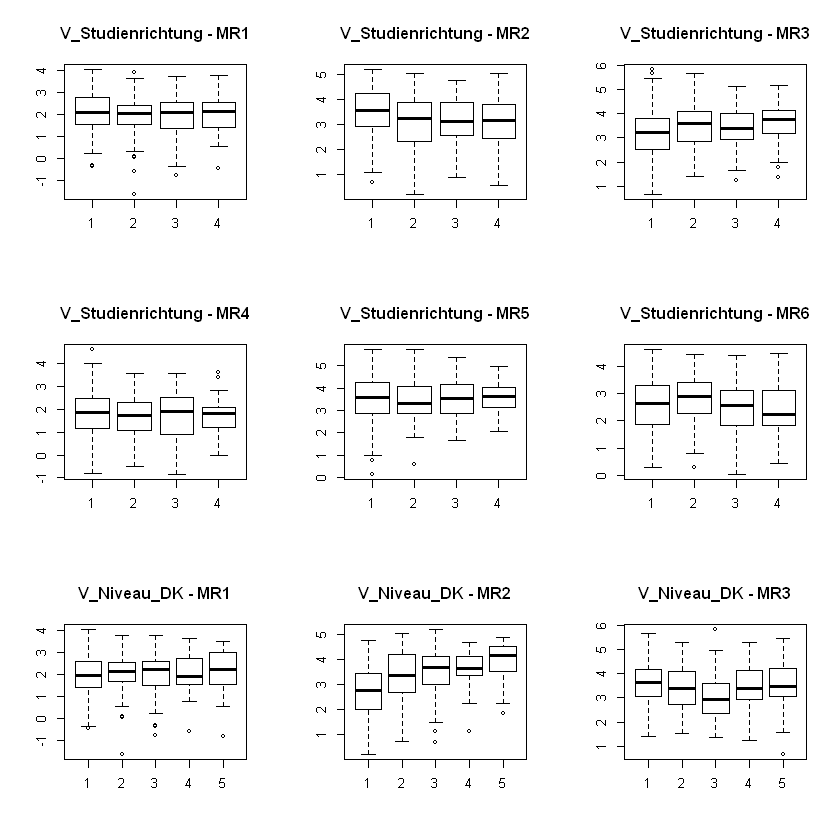

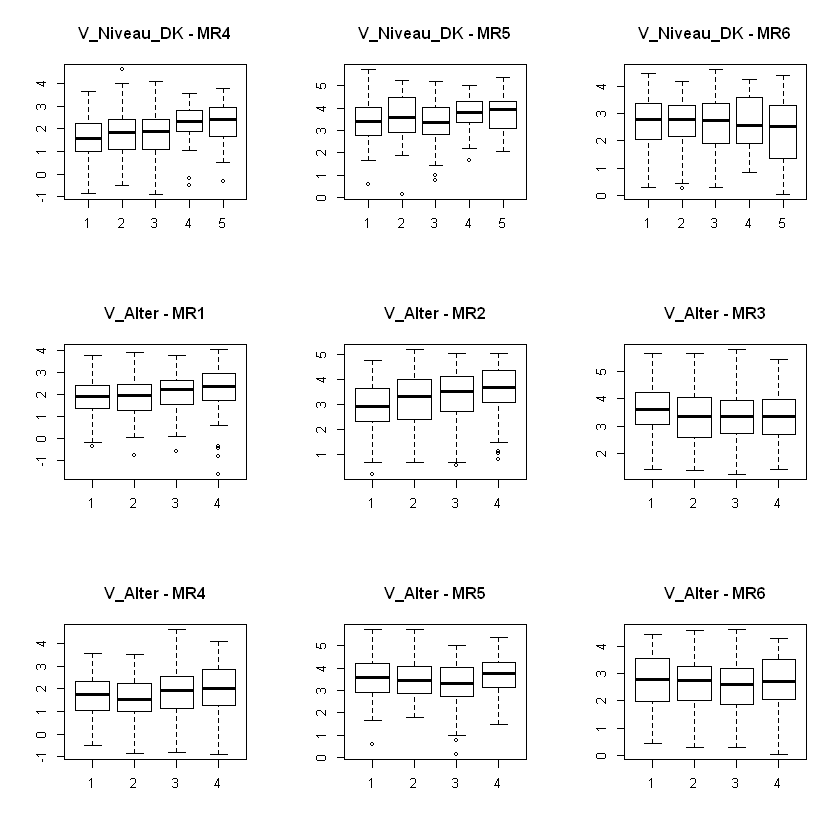

In [382]:
par(mfrow=c(3,3))
boxplot(MR1~V_Studienrichtung, data = Df_total, main = 'V_Studienrichtung - MR1')
boxplot(MR2~V_Studienrichtung, data = Df_total, main = 'V_Studienrichtung - MR2')
boxplot(MR3~V_Studienrichtung, data = Df_total, main = 'V_Studienrichtung - MR3')
boxplot(MR4~V_Studienrichtung, data = Df_total, main = 'V_Studienrichtung - MR4')
boxplot(MR5~V_Studienrichtung, data = Df_total, main = 'V_Studienrichtung - MR5')
boxplot(MR6~V_Studienrichtung, data = Df_total, main = 'V_Studienrichtung - MR6')
boxplot(MR1~V_Niveau_DK, data = Df_total, main = 'V_Niveau_DK - MR1')
boxplot(MR2~V_Niveau_DK, data = Df_total, main = 'V_Niveau_DK - MR2')
boxplot(MR3~V_Niveau_DK, data = Df_total, main = 'V_Niveau_DK - MR3')
boxplot(MR4~V_Niveau_DK, data = Df_total, main = 'V_Niveau_DK - MR4')
boxplot(MR5~V_Niveau_DK, data = Df_total, main = 'V_Niveau_DK - MR5')
boxplot(MR6~V_Niveau_DK, data = Df_total, main = 'V_Niveau_DK - MR6')
boxplot(MR1~V_Alter, data = Df_total, main = 'V_Alter - MR1')
boxplot(MR2~V_Alter, data = Df_total, main = 'V_Alter - MR2')
boxplot(MR3~V_Alter, data = Df_total, main = 'V_Alter - MR3')
boxplot(MR4~V_Alter, data = Df_total, main = 'V_Alter - MR4')
boxplot(MR5~V_Alter, data = Df_total, main = 'V_Alter - MR5')
boxplot(MR6~V_Alter, data = Df_total, main = 'V_Alter - MR6')

Dichotome Variablen (Faktoren-Scores mit signifikanten Unterschieden im t-Test):

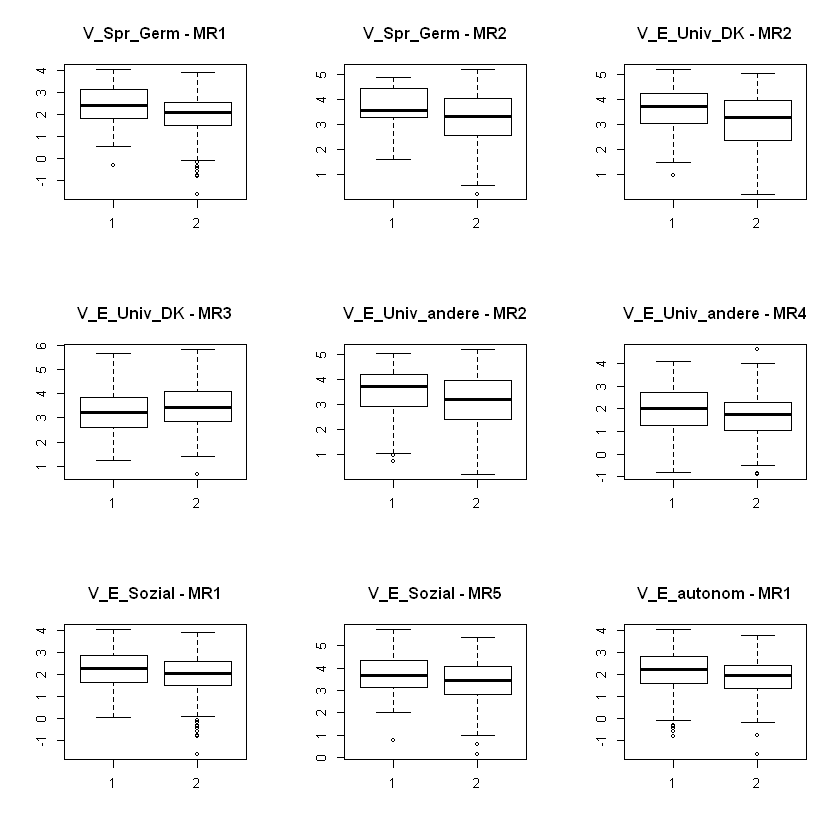

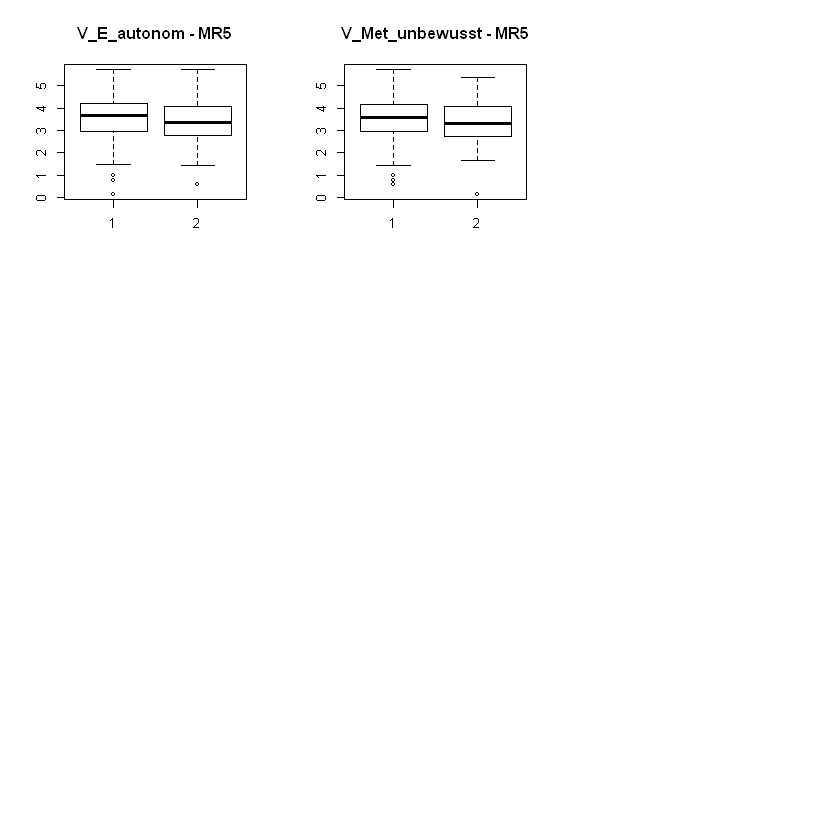

In [383]:
par(mfrow=c(3,3))
boxplot(MR1~V_Spr_Germ, data = Df_total, main = 'V_Spr_Germ - MR1')
boxplot(MR2~V_Spr_Germ, data = Df_total, main = 'V_Spr_Germ - MR2')
boxplot(MR2~V_E_Univ_DK, data = Df_total, main = 'V_E_Univ_DK - MR2')
boxplot(MR3~V_E_Univ_DK, data = Df_total, main = 'V_E_Univ_DK - MR3')
boxplot(MR2~V_E_Univ_andere, data = Df_total, main = 'V_E_Univ_andere - MR2')
boxplot(MR4~V_E_Univ_andere, data = Df_total, main = 'V_E_Univ_andere - MR4')
boxplot(MR1~V_E_Sozial, data = Df_total, main = 'V_E_Sozial - MR1')
boxplot(MR5~V_E_Sozial, data = Df_total, main = 'V_E_Sozial - MR5')
boxplot(MR1~V_E_autonom, data = Df_total, main = 'V_E_autonom - MR1')
boxplot(MR5~V_E_autonom, data = Df_total, main = 'V_E_autonom - MR5')
boxplot(MR5~V_Met_unbewusst, data = Df_total, main = 'V_Met_unbewusst - MR5')

#### Niveaugruppe A1

MANOVA:

In [384]:
res_anova3A <- MANOVA3_table(Df_total[which(Df_total$V_Niveau_DK=='1'),],vec_V[!vec_V %in% remove])
res_anova3A[res_anova3A['Pr(>F)'] < 0.05,]

,Df,Pillai,approx F,num Df,den Df,Pr(>F)
V_Studienrichtung,3,0.20634173,1.711108,18,417,0.034811382
V_Erstsprache_Span,1,0.10849554,2.941068,6,145,0.009738564
V_Spr_Rom,1,0.10895679,2.955101,6,145,0.009450047
V_E_Univ_DK,1,0.12375611,3.413174,6,145,0.003515562
V_E_DK_aktuell,1,0.09381760,2.501989,6,145,0.024718568
V_Met_unbewusst,1,0.08986816,2.386263,6,145,0.031474925


T-Test:

In [385]:
tabletstbonf(Df_total[which(Df_total$V_Niveau_DK=='1'),],c('V_Erstsprache_Span',
                                                           'V_Spr_Rom',
                                                           'V_E_Univ_DK',
                                                           'V_E_DK_aktuell',
                                                            'V_Met_unbewusst'))

,MR1,MR2,MR3,MR4,MR5,MR6
V_Erstsprache_Span,0.4806723,0.505860331,0.213941724,0.51820109,0.87381650,0.0006198061
V_Spr_Rom,0.4662990,0.003018491,0.119365425,0.05565165,0.16160193,0.9612045809
V_E_Univ_DK,0.3829447,0.002106411,0.216540072,0.91785111,0.01058465,0.3348601710
V_E_DK_aktuell,0.8730287,0.023000123,0.005080566,0.47629821,0.41112156,0.4252630275
V_Met_unbewusst,0.6812749,0.997871575,0.034220488,0.25881594,0.10842603,0.0136972659


Deskriptive Statistik der Gruppen der Variablen mit p < 0.05 in der MANOVA:

In [386]:
df_details(Df_total[which((Df_total$V_Niveau_DK=='1')&(Df_total$V_Studienrichtung=='1')),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,20,2.208290,0.8722823,2.127729,2.173655,0.8517232,0.5356028,4.025577,3.489974,0.2249424,-0.502933674,0.1950482,0.5356028,1.658188,2.127729,2.208290,2.755275,4.025577
MR2,2,20,2.946008,1.0559234,3.064063,2.949094,0.8216932,1.0712264,4.779291,3.708065,-0.1718822,-0.931353313,0.2361117,1.0712264,2.393884,3.064063,2.946008,3.479367,4.779291
MR3,3,20,3.339997,0.9554335,3.227202,3.278996,0.8369576,1.6436360,5.676720,4.033084,0.5899708,0.009576575,0.2136414,1.6436360,2.721542,3.227202,3.339997,3.822335,5.676720
MR4,4,20,1.476226,0.7231761,1.416707,1.493218,0.7510602,-0.1376780,2.642076,2.779754,-0.2061540,-0.683608965,0.1617071,-0.1376780,1.025199,1.416707,1.476226,2.042384,2.642076
MR5,5,20,3.960056,0.8370207,3.808605,3.962854,0.5803462,1.9587402,5.703846,3.745106,-0.1286076,0.189012021,0.1871635,1.9587402,3.652878,3.808605,3.960056,4.429021,5.703846
MR6,6,20,2.871975,0.9742606,2.896758,2.922026,1.2947668,0.7491573,4.128453,3.379295,-0.2605318,-1.029336931,0.2178513,0.7491573,2.042894,2.896758,2.871975,3.772609,4.128453


In [387]:
df_details(Df_total[which((Df_total$V_Niveau_DK=='1')&(Df_total$V_Studienrichtung=='2')),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,81,2.017840,0.8139426,1.929278,2.007962,0.7613918,0.0953174,3.928575,3.833258,0.13941065,-0.3245059,0.09043806,0.0953174,1.535612,1.929278,2.017840,2.584544,3.928575
MR2,2,81,2.854044,1.0847204,2.873359,2.873932,1.1898298,0.2096223,4.783558,4.573936,-0.17300508,-0.7786193,0.12052449,0.2096223,2.047671,2.873359,2.854044,3.612969,4.783558
MR3,3,81,3.611806,0.8201950,3.645669,3.602177,0.8585114,1.4218072,5.655395,4.233588,0.05583056,-0.1302968,0.09113278,1.4218072,2.969815,3.645669,3.611806,4.079192,5.655395
MR4,4,81,1.713717,0.8622670,1.716043,1.720684,0.8943327,-0.5189135,3.545700,4.064613,-0.15864313,-0.4097661,0.09580745,-0.5189135,1.094784,1.716043,1.713717,2.292783,3.545700
MR5,5,81,3.309519,0.8730760,3.262458,3.290527,0.8163955,0.5630702,5.704204,5.141134,0.07573880,0.4837146,0.09700844,0.5630702,2.725629,3.262458,3.309519,3.813109,5.704204
MR6,6,81,2.781308,0.9263085,2.844280,2.817589,0.8889999,0.2820378,4.424725,4.142687,-0.33234748,-0.4647983,0.10292316,0.2820378,2.211303,2.844280,2.781308,3.364247,4.424725


In [388]:
df_details(Df_total[which((Df_total$V_Niveau_DK=='1')&(Df_total$V_Studienrichtung=='3')),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,26,1.641158,1.0077354,1.734311,1.647846,0.8429469,-0.3303774,3.724720,4.055098,-0.20422164,-0.4244978,0.1976332,-0.3303774,1.2090813,1.734311,1.641158,2.287857,3.724720
MR2,2,26,2.494995,0.8231158,2.610215,2.489362,0.4781001,0.8616327,4.117474,3.255841,-0.05299955,-0.4453748,0.1614263,0.8616327,1.9576354,2.610215,2.494995,2.905018,4.117474
MR3,3,26,3.801733,0.7490178,3.801079,3.813955,0.7098329,2.2977760,5.061999,2.764223,-0.11900767,-0.9475208,0.1468945,2.2977760,3.3945501,3.801079,3.801733,4.298757,5.061999
MR4,4,26,1.384329,1.2318435,1.362552,1.382156,1.2465081,-0.8399535,3.590001,4.429954,0.11032950,-0.9974181,0.2415844,-0.8399535,0.4923029,1.362552,1.384329,2.096918,3.590001
MR5,5,26,3.215393,0.9669757,3.160311,3.183302,1.0956558,1.6497779,5.343856,3.694079,0.27384735,-0.7835760,0.1896395,1.6497779,2.4928527,3.160311,3.215393,4.028505,5.343856
MR6,6,26,2.533034,0.8838589,2.619801,2.525808,0.8148684,0.9685853,4.399923,3.431338,0.05864284,-0.7737388,0.1733390,0.9685853,2.0127723,2.619801,2.533034,3.072628,4.399923


In [389]:
df_details(Df_total[which((Df_total$V_Niveau_DK=='1')&(Df_total$V_Studienrichtung=='4')),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,19,1.965022,1.0379884,2.137506,1.999642,1.0041914,-0.4258221,3.767319,4.193141,-0.34733574,-0.50605139,0.2381309,-0.4258221,1.2206336,2.137506,1.965022,2.644977,3.767319
MR2,2,19,2.511402,1.0247536,2.591576,2.530315,1.0810374,0.5701177,4.131164,3.561047,-0.52361757,-0.81982075,0.2350946,0.5701177,1.9393417,2.591576,2.511402,3.243227,4.131164
MR3,3,19,3.888251,0.7381129,3.859658,3.925586,0.6482425,1.9826853,5.159123,3.176437,-0.65091268,0.31285808,0.1693347,1.9826853,3.5871339,3.859658,3.888251,4.455445,5.159123
MR4,4,19,1.605568,0.7880481,1.701521,1.548517,0.6993804,0.5444648,3.636548,3.092083,0.56238453,0.06171701,0.1807906,0.5444648,0.8402593,1.701521,1.605568,1.949832,3.636548
MR5,5,19,3.426535,0.7700244,3.462531,3.419159,0.8073550,2.0330901,4.945374,2.912284,0.08391955,-0.57012023,0.1766557,2.0330901,2.8704611,3.462531,3.426535,3.745254,4.945374
MR6,6,19,2.561403,1.0735058,2.406668,2.575142,1.0355417,0.4198027,4.469453,4.049650,0.02718778,-0.87644860,0.2462791,0.4198027,1.9356018,2.406668,2.561403,3.274874,4.469453


In [469]:
df_details(Df_total[which((Df_total$V_Niveau_DK=='1')&(Df_total$V_Erstsprache_Span=='1')),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,139,1.962644,0.9156176,1.934211,1.973206,0.8893372,-0.4258221,4.025577,4.451399,-0.10961897,-0.17124571,0.07766167,-0.4258221,1.3745498,1.934211,1.962644,2.597834,4.025577
MR2,2,139,2.740168,1.0377833,2.766582,2.745106,1.0350319,0.2096223,4.783558,4.573936,-0.06511067,-0.69131801,0.08802363,0.2096223,1.8855403,2.766582,2.740168,3.445772,4.783558
MR3,3,139,3.659076,0.8428788,3.645669,3.665718,0.8668370,1.4051660,5.676720,4.271554,-0.07992139,-0.14259318,0.07149205,1.4051660,3.0651953,3.645669,3.659076,4.238281,5.676720
MR4,4,139,1.583869,0.9271817,1.593045,1.585104,0.9411552,-0.8399535,3.636548,4.476501,-0.06295412,-0.27945231,0.07864253,-0.8399535,0.9440853,1.593045,1.583869,2.213820,3.636548
MR5,5,139,3.391143,0.8994158,3.356368,3.381933,0.9031670,0.5630702,5.704204,5.141134,0.03774630,0.09615752,0.07628746,0.5630702,2.7759257,3.356368,3.391143,4.017793,5.704204
MR6,6,139,2.808230,0.9108000,2.838839,2.835191,1.0648809,0.2820378,4.469453,4.187415,-0.20311172,-0.62664394,0.07725305,0.2820378,2.1095744,2.838839,2.808230,3.506058,4.469453


In [470]:
df_details(Df_total[which((Df_total$V_Niveau_DK=='1')&(Df_total$V_Erstsprache_Span=='2')),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,13,2.145959,0.5913119,2.035608,2.065070,0.2504790,1.4143827,3.767319,2.352937,1.42092291,1.7009148,0.1640004,1.4143827,1.869462,2.035608,2.145959,2.225416,3.767319
MR2,2,13,2.940424,1.0067404,3.109239,2.998786,0.8799539,0.5701177,4.668742,4.098624,-0.55259783,0.2431639,0.2792195,0.5701177,2.515718,3.109239,2.940424,3.257567,4.668742
MR3,3,13,3.355775,0.7781271,3.532969,3.370937,0.4611279,1.9826853,4.562083,2.579397,-0.32958450,-1.0821913,0.2158136,1.9826853,2.759058,3.532969,3.355775,3.841732,4.562083
MR4,4,13,1.756116,0.7905446,1.775765,1.743207,0.8231143,0.5832453,3.070982,2.487737,0.03981337,-1.4406819,0.2192576,0.5832453,1.220582,1.775765,1.756116,2.327123,3.070982
MR5,5,13,3.432416,0.8362918,3.425988,3.422086,0.7600514,2.0330901,4.945374,2.912284,0.23205303,-0.9761182,0.2319456,2.0330901,2.913340,3.425988,3.432416,3.749742,4.945374
MR6,6,13,1.890238,0.8377714,2.003268,1.913469,0.8037185,0.4198027,3.105131,2.685329,-0.23502741,-1.2772575,0.2323560,0.4198027,1.262215,2.003268,1.890238,2.447164,3.105131


In [471]:
df_details(Df_total[which((Df_total$V_Niveau_DK=='1')&(Df_total$V_Spr_Rom=='1')),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,40,2.066936,0.8089474,2.047797,2.055388,0.7347910,-0.09832973,3.767319,3.865649,-0.01784959,-0.01585448,0.1279058,-0.09832973,1.5555019,2.047797,2.066936,2.584749,3.767319
MR2,2,40,2.345299,1.0578658,2.673505,2.359354,1.1682361,0.20962228,4.668742,4.459120,-0.10188069,-0.90804194,0.1672633,0.20962228,1.5219208,2.673505,2.345299,3.157427,4.668742
MR3,3,40,3.810742,0.6434656,3.713024,3.804327,0.6953498,2.32588461,4.920208,2.594323,0.09001425,-0.77102313,0.1017408,2.32588461,3.4088573,3.713024,3.810742,4.275055,4.920208
MR4,4,40,1.361142,0.9474511,1.220414,1.376955,0.9863473,-0.83995354,3.304242,4.144196,-0.11765818,-0.66450139,0.1498052,-0.83995354,0.6544261,1.220414,1.361142,2.181193,3.304242
MR5,5,40,3.564352,0.8718210,3.514610,3.550298,0.8605209,1.64977789,5.212028,3.562250,0.17059854,-0.61520343,0.1378470,1.64977789,2.9430421,3.514610,3.564352,4.092738,5.212028
MR6,6,40,2.723492,0.8676660,2.858775,2.742752,0.9317476,0.41980271,4.303824,3.884021,-0.35680734,-0.27121342,0.1371900,0.41980271,2.0919678,2.858775,2.723492,3.250145,4.303824


In [472]:
df_details(Df_total[which((Df_total$V_Niveau_DK=='1')&(Df_total$V_Spr_Rom=='2')),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,112,1.946675,0.9219087,1.931745,1.955394,0.8406937,-0.4258221,4.025577,4.451399,-0.098245871,-0.1056721,0.08711219,-0.4258221,1.374821,1.931745,1.946675,2.592734,4.025577
MR2,2,112,2.904437,0.9882446,2.834590,2.906690,0.9916476,0.6877118,4.783558,4.095847,-0.045935841,-0.7156856,0.09338034,0.6877118,2.229266,2.834590,2.904437,3.604613,4.783558
MR3,3,112,3.569704,0.8931192,3.599046,3.571386,0.9598137,1.4051660,5.676720,4.271554,-0.003410177,-0.2816494,0.08439184,1.4051660,2.906178,3.599046,3.569704,4.111312,5.676720
MR4,4,112,1.683407,0.8924926,1.652964,1.677776,0.8830318,-0.6136086,3.636548,4.250157,-0.018253012,-0.2579344,0.08433263,-0.6136086,1.142631,1.652964,1.683407,2.278371,3.636548
MR5,5,112,3.334074,0.8946390,3.294560,3.331968,0.8527506,0.5630702,5.704204,5.141134,0.021452126,0.2045397,0.08453544,0.5630702,2.744310,3.294560,3.334074,3.909226,5.704204
MR6,6,112,2.731941,0.9658884,2.745249,2.756609,1.0360684,0.2820378,4.469453,4.187415,-0.156730328,-0.7254192,0.09126787,0.2820378,2.047828,2.745249,2.731941,3.432259,4.469453


In [394]:
df_details(Df_total[which((Df_total$V_Niveau_DK=='1')&(Df_total$V_E_Univ_DK=='1')),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,30,2.106170,0.8148220,2.260228,2.138295,1.0314014,0.3126559,3.481687,3.169031,-0.25084235,-0.7938262,0.1487655,0.3126559,1.531280,2.260228,2.106170,2.739864,3.481687
MR2,2,30,3.271491,0.9850330,3.190036,3.327754,0.9944271,0.9662919,4.779291,3.812999,-0.41120314,-0.5962490,0.1798416,0.9662919,2.744025,3.190036,3.271491,4.074068,4.779291
MR3,3,30,3.463045,0.9593041,3.557741,3.469714,0.8774261,1.4218072,5.655395,4.233588,0.04662800,-0.2434277,0.1751442,1.4218072,2.917169,3.557741,3.463045,3.963682,5.655395
MR4,4,30,1.614118,0.7262767,1.552516,1.575706,0.7106051,0.5385509,3.213271,2.674720,0.44935923,-0.8493447,0.1325994,0.5385509,1.089133,1.552516,1.614118,2.025108,3.213271
MR5,5,30,3.765272,0.9809944,3.700272,3.767071,0.9459390,1.7559066,5.704204,3.948298,0.04599019,-0.4881382,0.1791042,1.7559066,3.098620,3.700272,3.765272,4.391273,5.704204
MR6,6,30,2.878221,0.9142725,3.026952,2.938547,0.9070467,0.7491573,4.423507,3.674350,-0.47059330,-0.5042944,0.1669226,0.7491573,2.435337,3.026952,2.878221,3.644801,4.423507


In [395]:
df_details(Df_total[which((Df_total$V_Niveau_DK=='1')&(Df_total$V_E_Univ_DK=='2')),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,122,1.946885,0.9110130,1.929355,1.945712,0.8235191,-0.4258221,4.025577,4.451399,-0.05473674,0.06764637,0.08247925,-0.4258221,1.376868,1.929355,1.946885,2.547842,4.025577
MR2,2,122,2.630854,1.0092279,2.657066,2.632181,1.1379460,0.2096223,4.783558,4.573936,-0.05597136,-0.56805145,0.09137121,0.2096223,1.879766,2.657066,2.630854,3.390091,4.783558
MR3,3,122,3.674961,0.8061321,3.658449,3.678410,0.8596598,1.4051660,5.676720,4.271554,-0.07364433,-0.26142829,0.07298377,1.4051660,3.099310,3.658449,3.674961,4.242251,5.676720
MR4,4,122,1.594785,0.9585642,1.680625,1.603284,0.9227898,-0.8399535,3.636548,4.476501,-0.12071951,-0.37156292,0.08678432,-0.8399535,0.904402,1.680625,1.594785,2.230178,3.636548
MR5,5,122,3.303542,0.8479736,3.325870,3.303609,0.8561562,0.5630702,5.343856,4.780786,-0.06221184,0.06721544,0.07677192,0.5630702,2.738548,3.325870,3.303542,3.812102,5.343856
MR6,6,122,2.693200,0.9441170,2.780154,2.714454,1.0153362,0.2820378,4.469453,4.187415,-0.12940213,-0.60895932,0.08547634,0.2820378,2.039238,2.780154,2.693200,3.275940,4.469453


In [396]:
df_details(Df_total[which((Df_total$V_Niveau_DK=='1')&(Df_total$V_E_DK_aktuell=='1')),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,87,1.988372,0.9279369,1.944107,2.017125,0.8452299,-0.4258221,4.025577,4.451399,-0.2711918,0.057612333,0.09948528,-0.4258221,1.450213,1.944107,1.988372,2.634580,4.025577
MR2,2,87,2.593176,1.0082519,2.661259,2.611194,1.1775382,0.2096223,4.508240,4.298618,-0.1609832,-0.828802273,0.10809595,0.2096223,1.777205,2.661259,2.593176,3.411939,4.508240
MR3,3,87,3.796703,0.8173550,3.774532,3.808811,0.8155493,1.4051660,5.676720,4.271554,-0.1615950,-0.001908822,0.08762966,1.4051660,3.267802,3.774532,3.796703,4.393208,5.676720
MR4,4,87,1.644494,0.8178599,1.738061,1.652923,0.7672145,-0.6136086,3.636548,4.250157,-0.1892611,0.045866948,0.08768378,-0.6136086,1.205439,1.738061,1.644494,2.227406,3.636548
MR5,5,87,3.446252,0.8545913,3.397773,3.433479,0.7300419,1.6497779,5.704204,4.054426,0.1991491,-0.106062034,0.09162180,1.6497779,2.929641,3.397773,3.446252,4.030904,5.704204
MR6,6,87,2.782370,0.9676890,2.844280,2.827719,1.0817375,0.2820378,4.469453,4.187415,-0.3679386,-0.411011784,0.10374715,0.2820378,2.108623,2.844280,2.782370,3.529955,4.469453


In [397]:
df_details(Df_total[which((Df_total$V_Niveau_DK=='1')&(Df_total$V_E_DK_aktuell=='2')),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,65,1.964871,0.8497799,1.952564,1.943851,0.8456302,0.0953174,3.928575,3.833258,0.18392851,-0.29062956,0.1054022,0.0953174,1.3737918,1.952564,1.964871,2.456764,3.928575
MR2,2,65,2.976963,1.0334955,2.907149,2.999502,0.7859838,0.6877118,4.783558,4.095847,-0.08745025,-0.56824626,0.1281893,0.6877118,2.4457691,2.907149,2.976963,3.471351,4.783558
MR3,3,65,3.414207,0.8244672,3.438184,3.416031,0.8458625,1.4218072,5.518280,4.096473,0.02734108,-0.25239839,0.1022626,1.4218072,2.8676572,3.438184,3.414207,3.933800,5.518280
MR4,4,65,1.537174,1.0348059,1.514448,1.540082,1.1574977,-0.8399535,3.545700,4.385654,0.07435714,-0.70084426,0.1283519,-0.8399535,0.7337268,1.514448,1.537174,2.283559,3.545700
MR5,5,65,3.325637,0.9412301,3.356368,3.319600,1.0155735,0.5630702,5.703846,5.140776,-0.06327495,0.03243283,0.1167452,0.5630702,2.6272035,3.356368,3.325637,3.966076,5.703846
MR6,6,65,2.659244,0.8998534,2.623028,2.662154,0.9368915,1.0236637,4.423507,3.399844,0.04759503,-0.88721989,0.1116131,1.0236637,2.0032681,2.623028,2.659244,3.254953,4.423507


In [398]:
df_details(Df_total[which((Df_total$V_Niveau_DK=='1')&(Df_total$V_Met_unbewusst=='1')),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,105,1.998310,0.9263992,1.952995,2.025356,0.9083121,-0.4258221,4.025577,4.451399,-0.26154678,-0.09217117,0.09040731,-0.4258221,1.484700,1.952995,1.998310,2.658857,4.025577
MR2,2,105,2.757446,1.0321108,2.755434,2.767146,1.0493296,0.2096223,4.779291,4.569669,-0.10754654,-0.62916724,0.10072370,0.2096223,2.047671,2.755434,2.757446,3.455498,4.779291
MR3,3,105,3.729352,0.8511569,3.682041,3.741250,0.9319132,1.4218072,5.676720,4.254913,-0.10146309,-0.39126186,0.08306441,1.4218072,3.107194,3.682041,3.729352,4.410727,5.676720
MR4,4,105,1.542356,0.8795459,1.519730,1.546721,0.9581373,-0.6136086,3.636548,4.250157,-0.05571889,-0.29392565,0.08583489,-0.6136086,1.023067,1.519730,1.542356,2.200673,3.636548
MR5,5,105,3.472401,0.9316750,3.413497,3.464363,0.8525193,0.5630702,5.704204,5.141134,0.02598575,0.17875264,0.09092217,0.5630702,2.905367,3.413497,3.472401,4.084107,5.704204
MR6,6,105,2.854582,0.9277246,2.884531,2.879916,1.1414133,0.9685853,4.469453,3.500868,-0.15542234,-0.92820329,0.09053665,0.9685853,2.102587,2.884531,2.854582,3.650855,4.469453


In [399]:
df_details(Df_total[which((Df_total$V_Niveau_DK=='1')&(Df_total$V_Met_unbewusst=='2')),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,47,1.933671,0.8195742,1.897191,1.895571,0.7635334,-0.09832973,3.928575,4.026905,0.3662660,0.1115762,0.1195472,-0.09832973,1.3723019,1.897191,1.933671,2.376715,3.928575
MR2,2,47,2.756959,1.0475435,2.824344,2.770209,0.9087509,0.57011772,4.783558,4.213441,-0.1092914,-0.6836529,0.1527999,0.57011772,2.0453303,2.824344,2.756959,3.383078,4.783558
MR3,3,47,3.418184,0.7789685,3.554944,3.441709,0.7430156,1.40516600,5.518280,4.113114,-0.1876195,0.3591285,0.1136242,1.40516600,2.9028247,3.554944,3.418184,3.854002,5.518280
MR4,4,47,1.724251,0.9886028,1.800657,1.735573,0.9660115,-0.83995354,3.545700,4.385654,-0.1724977,-0.4064571,0.1442025,-0.83995354,0.9996603,1.800657,1.724251,2.319399,3.545700
MR5,5,47,3.221026,0.7763113,3.206532,3.240518,0.9713531,1.64977789,4.484929,2.835151,-0.1486104,-1.1240981,0.1132366,1.64977789,2.6204108,3.206532,3.221026,3.913888,4.484929
MR6,6,47,2.450764,0.9102682,2.490691,2.478166,0.7566049,0.28203778,4.058375,3.776337,-0.3606649,-0.2630447,0.1327763,0.28203778,1.9874953,2.490691,2.450764,2.998049,4.058375


Boxplots:

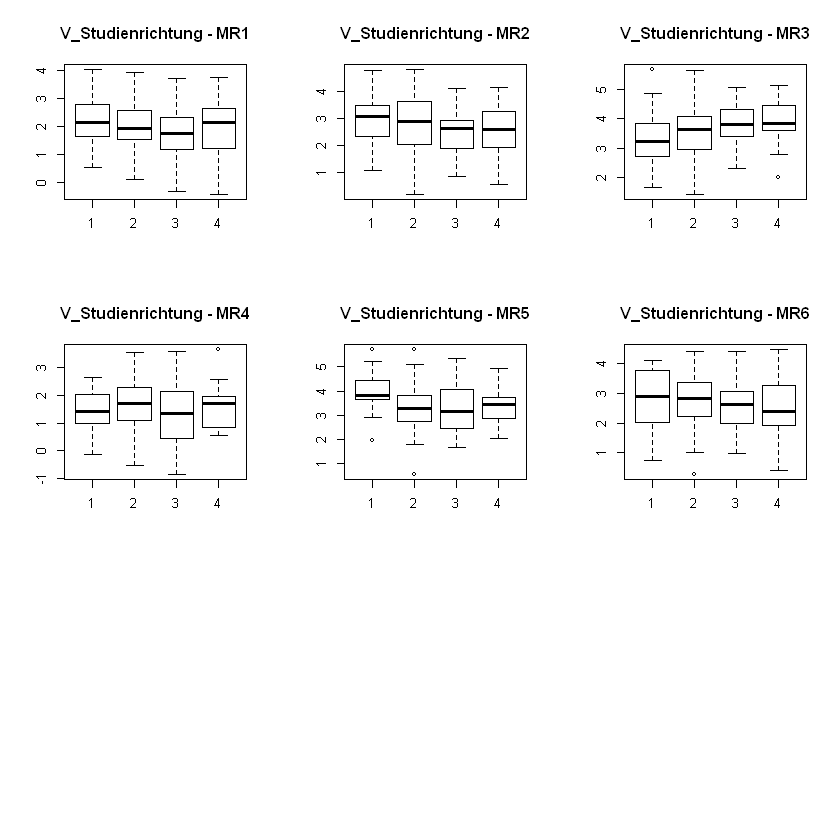

In [400]:
par(mfrow=c(3,3))
boxplot(MR1~V_Studienrichtung, data = Df_total[which(Df_total$V_Niveau_DK=='1'),], main = 'V_Studienrichtung - MR1')
boxplot(MR2~V_Studienrichtung, data = Df_total[which(Df_total$V_Niveau_DK=='1'),], main = 'V_Studienrichtung - MR2')
boxplot(MR3~V_Studienrichtung, data = Df_total[which(Df_total$V_Niveau_DK=='1'),], main = 'V_Studienrichtung - MR3')
boxplot(MR4~V_Studienrichtung, data = Df_total[which(Df_total$V_Niveau_DK=='1'),], main = 'V_Studienrichtung - MR4')
boxplot(MR5~V_Studienrichtung, data = Df_total[which(Df_total$V_Niveau_DK=='1'),], main = 'V_Studienrichtung - MR5')
boxplot(MR6~V_Studienrichtung, data = Df_total[which(Df_total$V_Niveau_DK=='1'),], main = 'V_Studienrichtung - MR6')
#boxplot(MR1~V_Alter, data = Df_total[which(Df_total$V_Niveau_DK=='1'),], main = 'V_Alter - MR1')
#boxplot(MR2~V_Alter, data = Df_total[which(Df_total$V_Niveau_DK=='1'),], main = 'V_Alter - MR2')
#boxplot(MR3~V_Alter, data = Df_total[which(Df_total$V_Niveau_DK=='1'),], main = 'V_Alter - MR3')
#boxplot(MR4~V_Alter, data = Df_total[which(Df_total$V_Niveau_DK=='1'),], main = 'V_Alter - MR4')
#boxplot(MR5~V_Alter, data = Df_total[which(Df_total$V_Niveau_DK=='1'),], main = 'V_Alter - MR5')
#boxplot(MR6~V_Alter, data = Df_total[which(Df_total$V_Niveau_DK=='1'),], main = 'V_Alter - MR6')

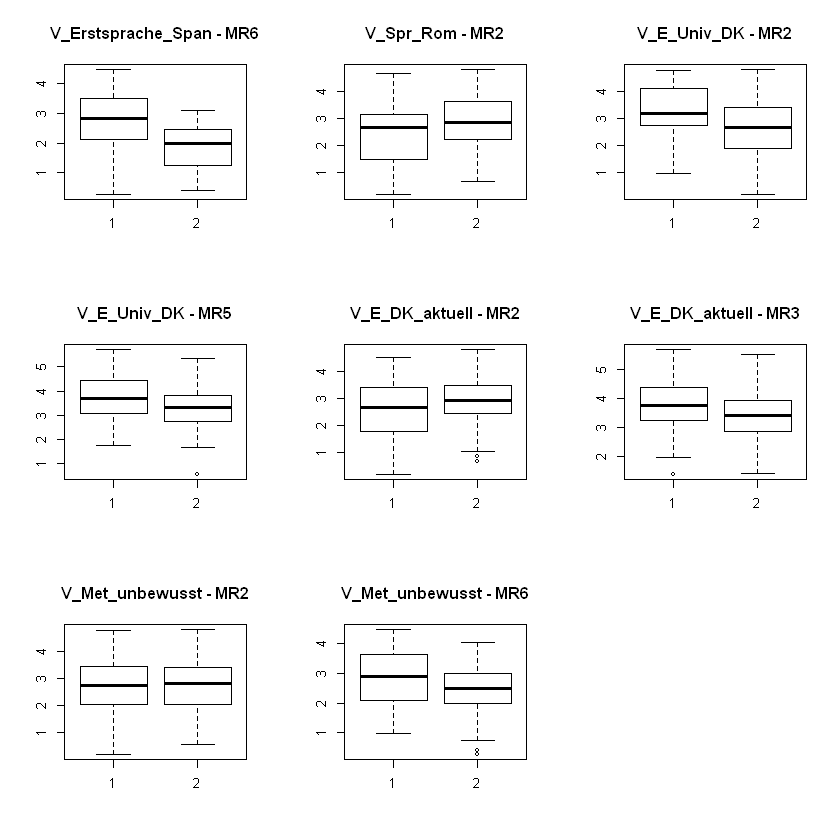

In [401]:
par(mfrow=c(3,3))
boxplot(MR6~V_Erstsprache_Span, data = Df_total[which(Df_total$V_Niveau_DK=='1'),], main = 'V_Erstsprache_Span - MR6')
boxplot(MR2~V_Spr_Rom, data = Df_total[which(Df_total$V_Niveau_DK=='1'),], main = 'V_Spr_Rom - MR2')
boxplot(MR2~V_E_Univ_DK, data = Df_total[which(Df_total$V_Niveau_DK=='1'),], main = 'V_E_Univ_DK - MR2')
boxplot(MR5~V_E_Univ_DK, data = Df_total[which(Df_total$V_Niveau_DK=='1'),], main = 'V_E_Univ_DK - MR5')
boxplot(MR2~V_E_DK_aktuell, data = Df_total[which(Df_total$V_Niveau_DK=='1'),], main = 'V_E_DK_aktuell - MR2')
boxplot(MR3~V_E_DK_aktuell, data = Df_total[which(Df_total$V_Niveau_DK=='1'),], main = 'V_E_DK_aktuell - MR3')
boxplot(MR2~V_Met_unbewusst, data = Df_total[which(Df_total$V_Niveau_DK=='1'),], main = 'V_Met_unbewusst - MR2')
boxplot(MR6~V_Met_unbewusst, data = Df_total[which(Df_total$V_Niveau_DK=='1'),], main = 'V_Met_unbewusst - MR6')

#### Niveaugruppe A2

MANOVA:

In [402]:
res_anova3A <- MANOVA3_table(Df_total[which(Df_total$V_Niveau_DK=='2'),],vec_V[!vec_V %in% remove])
res_anova3A[res_anova3A['Pr(>F)'] < 0.05,]

,Df,Pillai,approx F,num Df,den Df,Pr(>F)
V_Alter,3,0.4668854,1.750971,18,171,0.03510002


Deskriptive Statistik der Gruppen der Variablen mit p < 0.05 in der MANOVA:

In [403]:
df_details(Df_total[which((Df_total$V_Niveau_DK=='2')&(Df_total$V_Alter=='1')),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,19,2.299620,0.6755204,2.284600,2.284119,0.8025910,1.1955085,3.667243,2.471735,0.25897753,-1.0218553,0.1549750,1.1955085,1.7328484,2.284600,2.299620,2.753741,3.667243
MR2,2,19,3.223768,1.0147752,3.292446,3.244459,1.0081506,1.4349225,4.660869,3.225947,-0.26604001,-1.1730842,0.2328054,1.4349225,2.5606627,3.292446,3.223768,3.972301,4.660869
MR3,3,19,3.717921,0.7008706,3.865088,3.731161,0.8057196,2.2805139,4.930235,2.649721,-0.22930622,-0.9191510,0.1607907,2.2805139,3.1740137,3.865088,3.717921,4.237027,4.930235
MR4,4,19,1.462419,1.0148943,1.568897,1.475639,1.1479329,-0.5000570,3.200148,3.700205,-0.30201260,-1.0162399,0.2328327,-0.5000570,0.8075683,1.568897,1.462419,2.340559,3.200148
MR5,5,19,3.879852,0.7523760,3.895837,3.870604,0.9096582,2.6805492,5.236369,2.555820,-0.01218456,-1.2581578,0.1726069,2.6805492,3.2359666,3.895837,3.879852,4.449592,5.236369
MR6,6,19,2.806013,0.9631265,2.846350,2.872423,1.1074779,0.4344643,4.048592,3.614127,-0.72889816,-0.2479851,0.2209564,0.4344643,2.4250639,2.846350,2.806013,3.616942,4.048592


In [404]:
df_details(Df_total[which((Df_total$V_Niveau_DK=='2')&(Df_total$V_Alter=='2')),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,15,1.644639,0.9860181,1.832070,1.631632,0.8664900,0.04680709,3.411564,3.364757,-0.03293127,-0.9326143,0.2545888,0.04680709,0.9112067,1.832070,1.644639,2.020311,3.411564
MR2,2,15,3.304845,1.0226450,3.375729,3.266206,1.2234623,2.05452329,5.057485,3.002961,0.30889576,-1.3691805,0.2640458,2.05452329,2.4076443,3.375729,3.304845,3.929981,5.057485
MR3,3,15,3.400645,0.9901825,3.409643,3.401328,1.0995741,1.50950225,5.282902,3.773400,-0.13488485,-0.7371001,0.2556640,1.50950225,2.7493227,3.409643,3.400645,4.038254,5.282902
MR4,4,15,1.700020,1.0180777,1.829434,1.729585,0.8950462,-0.26123909,3.276932,3.538171,-0.36203515,-0.8478584,0.2628665,-0.26123909,1.1587119,1.829434,1.700020,2.340941,3.276932
MR5,5,15,3.333121,0.9450684,3.112894,3.338653,1.0629888,1.88510268,4.709223,2.824121,0.14315769,-1.5466985,0.2440156,1.88510268,2.5970408,3.112894,3.333121,4.267792,4.709223
MR6,6,15,2.541545,0.8288502,2.920235,2.602507,0.7408290,0.70750444,3.583087,2.875583,-0.77452103,-0.5833366,0.2140082,0.70750444,2.1858894,2.920235,2.541545,3.093805,3.583087


In [405]:
df_details(Df_total[which((Df_total$V_Niveau_DK=='2')&(Df_total$V_Alter=='3')),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,10,2.022886,0.7821642,2.300378,2.169983,0.3435639,0.08647863,2.782518,2.696039,-1.3936050,0.9167027,0.2473421,0.08647863,1.855214,2.300378,2.022886,2.481975,2.782518
MR2,2,10,2.918161,1.0980371,3.003696,3.014788,0.7198051,0.73454666,4.328764,3.594217,-0.5990597,-0.7630040,0.3472298,0.73454666,2.703411,3.003696,2.918161,3.536211,4.328764
MR3,3,10,3.009309,0.9041229,2.764582,2.899581,0.7114353,1.96774577,4.928693,2.960947,0.7970889,-0.5584110,0.2859088,1.96774577,2.540355,2.764582,3.009309,3.502931,4.928693
MR4,4,10,2.069920,1.3107817,1.938819,2.016288,1.2922114,-0.04353896,4.612436,4.655975,0.2754497,-0.7510933,0.4145056,-0.04353896,1.246476,1.938819,2.069920,2.771089,4.612436
MR5,5,10,2.931469,1.2303909,2.825088,3.081426,0.7725468,0.14299255,4.520292,4.377299,-0.7832897,0.1102020,0.3890838,0.14299255,2.552194,2.825088,2.931469,3.537071,4.520292
MR6,6,10,2.921137,0.9787906,3.015478,3.026991,0.3297768,0.79683784,4.198606,3.401768,-0.6498959,-0.1553740,0.3095208,0.79683784,2.817695,3.015478,2.921137,3.190526,4.198606


In [406]:
df_details(Df_total[which((Df_total$V_Niveau_DK=='2')&(Df_total$V_Alter=='4')),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,20,2.076325,1.1065876,2.296662,2.211185,0.7734810,-1.6046254,3.781174,5.385800,-1.63616994,3.6011290,0.2474405,-1.6046254,1.760617,2.296662,2.076325,2.557966,3.781174
MR2,2,20,3.888884,0.8714611,4.162307,3.946757,0.6374310,2.3463533,5.038818,2.692464,-0.62856648,-1.1331293,0.1948646,2.3463533,3.179329,4.162307,3.888884,4.413287,5.038818
MR3,3,20,3.263294,0.9165968,3.263202,3.255905,1.1084963,1.8274336,5.127203,3.299769,0.09739699,-0.9686658,0.2049573,1.8274336,2.489616,3.263202,3.263294,3.905158,5.127203
MR4,4,20,2.108386,0.8704497,1.915030,2.020753,0.7820470,0.9495594,4.003130,3.053571,0.77723608,-0.5559192,0.1946385,0.9495594,1.550466,1.915030,2.108386,2.617529,4.003130
MR5,5,20,3.860850,0.8991995,4.113872,3.902289,0.9407176,2.0411982,5.167792,3.126594,-0.34256030,-1.1750419,0.2010671,2.0411982,3.052082,4.113872,3.860850,4.575262,5.167792
MR6,6,20,2.512509,0.9515462,2.484763,2.575102,1.0115585,0.2371458,4.097232,3.860086,-0.49490186,-0.2957187,0.2127722,0.2371458,2.091533,2.484763,2.512509,3.380259,4.097232


Boxplots:

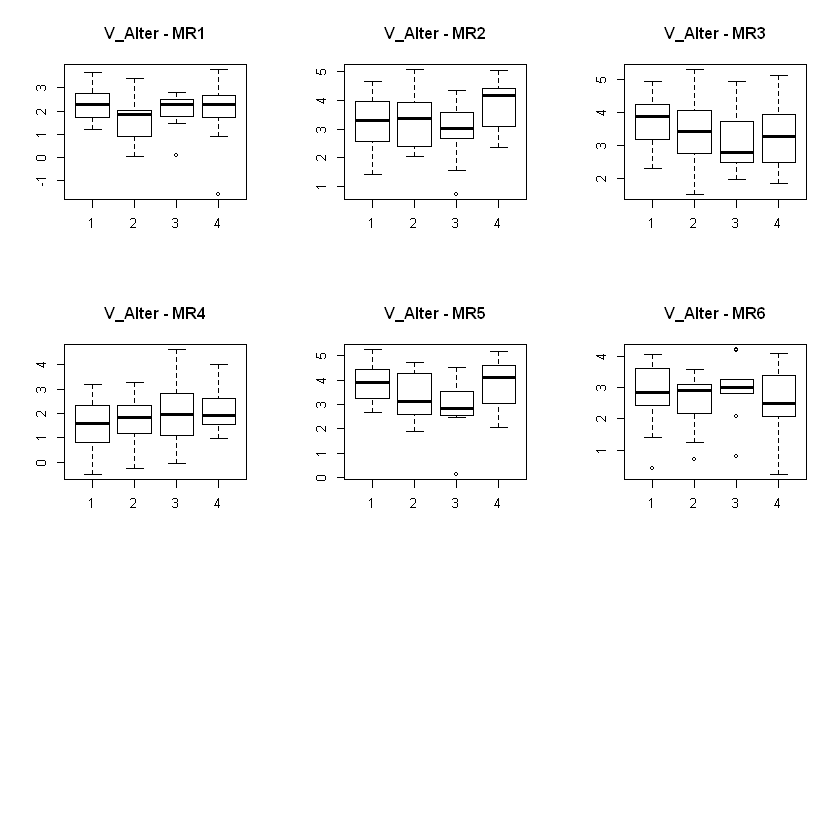

In [407]:
par(mfrow=c(3,3))
boxplot(MR1~V_Alter, data = Df_total[which(Df_total$V_Niveau_DK=='2'),], main = 'V_Alter - MR1')
boxplot(MR2~V_Alter, data = Df_total[which(Df_total$V_Niveau_DK=='2'),], main = 'V_Alter - MR2')
boxplot(MR3~V_Alter, data = Df_total[which(Df_total$V_Niveau_DK=='2'),], main = 'V_Alter - MR3')
boxplot(MR4~V_Alter, data = Df_total[which(Df_total$V_Niveau_DK=='2'),], main = 'V_Alter - MR4')
boxplot(MR5~V_Alter, data = Df_total[which(Df_total$V_Niveau_DK=='2'),], main = 'V_Alter - MR5')
boxplot(MR6~V_Alter, data = Df_total[which(Df_total$V_Niveau_DK=='2'),], main = 'V_Alter - MR6')

#### Niveaugruppe B1

MANOVA:

In [408]:
res_anova3A <- MANOVA3_table(Df_total[which(Df_total$V_Niveau_DK=='3'),],vec_V[!vec_V %in% remove])
res_anova3A[res_anova3A['Pr(>F)'] < 0.05,]

,Df,Pillai,approx F,num Df,den Df,Pr(>F)
V_Alter,3,0.3091765,1.761805,18,276,0.02974997


Deskriptive Statistik der Gruppen der Variablen mit p < 0.05 in der MANOVA:

In [409]:
df_details(Df_total[which((Df_total$V_Niveau_DK=='3')&(Df_total$V_Alter=='1')),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,4,2.657633,0.4329513,2.773501,2.657633,0.3062569,2.067030,3.016501,0.9494709,-0.4206681,-1.968623,0.2164756,2.067030,2.469282,2.773501,2.657633,2.961852,3.016501
MR2,2,4,3.503342,0.4576346,3.616693,3.503342,0.3512229,2.892943,3.887038,0.9940950,-0.3648556,-2.027412,0.2288173,2.892943,3.283169,3.616693,3.503342,3.836865,3.887038
MR3,3,4,3.683039,0.2912029,3.632405,3.683039,0.2586205,3.406729,4.060619,0.6538899,0.2820936,-2.058011,0.1456014,3.406729,3.483587,3.632405,3.683039,3.831857,4.060619
MR4,4,4,2.340724,0.6724583,2.456370,2.340724,0.4693094,1.420077,3.030079,1.6100013,-0.3676623,-1.844435,0.3362291,1.420077,2.152761,2.456370,2.340724,2.644333,3.030079
MR5,5,4,3.815680,0.5212366,3.883407,3.815680,0.5310786,3.188758,4.307147,1.1183887,-0.1628741,-2.213407,0.2606183,3.188758,3.490238,3.883407,3.815680,4.208849,4.307147
MR6,6,4,2.170525,0.9776936,1.887391,2.170525,0.4903116,1.329968,3.577350,2.2473819,0.5688963,-1.785249,0.4888468,1.329968,1.670036,1.887391,2.170525,2.387880,3.577350


In [410]:
df_details(Df_total[which((Df_total$V_Niveau_DK=='3')&(Df_total$V_Alter=='2')),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,31,1.747905,0.9471098,1.888514,1.770397,0.9102611,-0.7619230,3.789422,4.551345,-0.296964928,0.12373218,0.1701060,-0.7619230,1.1666659,1.888514,1.747905,2.324652,3.789422
MR2,2,31,3.724067,0.8885429,3.874932,3.808387,0.8520628,1.4941343,5.196618,3.702484,-0.831001886,0.08315129,0.1595870,1.4941343,3.2425251,3.874932,3.724067,4.371182,5.196618
MR3,3,31,2.861549,0.8418318,2.668340,2.827481,0.7459827,1.3726650,4.948225,3.575560,0.458348256,-0.19377991,0.1511975,1.3726650,2.3159976,2.668340,2.861549,3.350073,4.948225
MR4,4,31,1.534068,0.9590130,1.500113,1.522923,0.9415386,-0.1023982,3.376219,3.478617,0.047120800,-0.95203996,0.1722438,-0.1023982,0.9959914,1.500113,1.534068,2.357599,3.376219
MR5,5,31,3.648904,0.8543939,3.570276,3.629213,1.0098206,1.8967468,5.205527,3.308780,0.123496839,-0.85352921,0.1534537,1.8967468,2.9535555,3.570276,3.648904,4.282909,5.205527
MR6,6,31,2.605112,1.0006847,2.452014,2.600727,1.1024791,0.2999474,4.569716,4.269768,0.002499388,-0.72556908,0.1797283,0.2999474,1.8274667,2.452014,2.605112,3.368789,4.569716


In [411]:
df_details(Df_total[which((Df_total$V_Niveau_DK=='3')&(Df_total$V_Alter=='3')),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,39,2.286152,0.7609628,2.373937,2.311130,0.5156943,0.5143333,3.755514,3.241180,-0.4081904,-0.26350469,0.1218516,0.5143333,2.055675,2.373937,2.286152,2.764380,3.755514
MR2,2,39,3.386528,0.9143019,3.569826,3.437667,0.8144074,0.6710801,5.071966,4.400886,-0.6856507,0.24561789,0.1464055,0.6710801,2.802367,3.569826,3.386528,4.026625,5.071966
MR3,3,39,3.048357,0.9767358,2.943561,3.010579,1.2225312,1.5287460,5.804806,4.276060,0.3767667,-0.18849015,0.1564029,1.5287460,2.343738,2.943561,3.048357,3.782494,5.804806
MR4,4,39,1.595978,1.0456538,1.887375,1.658905,1.0103828,-0.8240844,3.164394,3.988478,-0.6951692,-0.44297510,0.1674386,-0.8240844,1.124918,1.887375,1.595978,2.153371,3.164394
MR5,5,39,3.118272,0.9480458,3.052355,3.156107,0.9252576,0.7513850,4.793527,4.042142,-0.3278538,-0.03990123,0.1518088,0.7513850,2.696096,3.052355,3.118272,3.731065,4.793527
MR6,6,39,2.736459,0.9956752,2.897597,2.764203,0.8480772,0.6802366,4.609336,3.929100,-0.3178510,-0.55247751,0.1594356,0.6802366,2.263736,2.897597,2.736459,3.339234,4.609336


In [412]:
df_details(Df_total[which((Df_total$V_Niveau_DK=='3')&(Df_total$V_Alter=='4')),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,25,2.193979,0.9354628,2.341477,2.264331,0.6015933,-0.3338985,3.525088,3.858987,-0.78126789,0.2085440,0.1870926,-0.3338985,2.059454,2.341477,2.193979,2.747246,3.525088
MR2,2,25,3.646146,0.8684450,3.523998,3.698015,0.8702358,1.1363205,5.025664,3.889344,-0.60857161,0.6600931,0.1736890,1.1363205,3.304745,3.523998,3.646146,4.424145,5.025664
MR3,3,25,2.916925,0.8419906,2.868404,2.899528,0.7672639,1.6416254,4.496250,2.854625,0.01101679,-1.0972012,0.1683981,1.6416254,2.451610,2.868404,2.916925,3.385916,4.496250
MR4,4,25,1.940629,1.3276137,1.983248,1.987140,1.1624204,-0.8853637,4.093413,4.978777,-0.27730211,-0.6296952,0.2655227,-0.8853637,1.199206,1.983248,1.940629,2.750787,4.093413
MR5,5,25,3.361599,0.7605953,3.541844,3.441728,0.6288128,1.4678211,4.378679,2.910858,-0.89876663,0.3649771,0.1521191,1.4678211,2.984974,3.541844,3.361599,3.856166,4.378679
MR6,6,25,2.645141,1.0267297,2.785694,2.677542,1.1782547,0.7740896,4.307097,3.533008,-0.25071290,-1.1776561,0.2053459,0.7740896,1.990972,2.785694,2.645141,3.519951,4.307097


Boxplots:

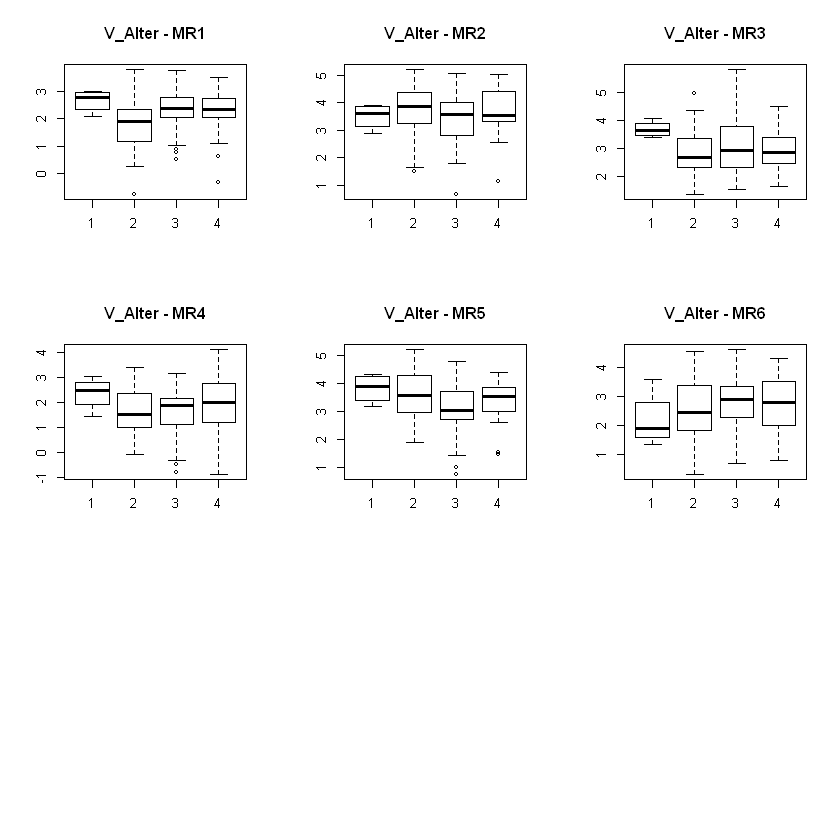

In [413]:
par(mfrow=c(3,3))
boxplot(MR1~V_Alter, data = Df_total[which(Df_total$V_Niveau_DK=='3'),], main = 'V_Alter - MR1')
boxplot(MR2~V_Alter, data = Df_total[which(Df_total$V_Niveau_DK=='3'),], main = 'V_Alter - MR2')
boxplot(MR3~V_Alter, data = Df_total[which(Df_total$V_Niveau_DK=='3'),], main = 'V_Alter - MR3')
boxplot(MR4~V_Alter, data = Df_total[which(Df_total$V_Niveau_DK=='3'),], main = 'V_Alter - MR4')
boxplot(MR5~V_Alter, data = Df_total[which(Df_total$V_Niveau_DK=='3'),], main = 'V_Alter - MR5')
boxplot(MR6~V_Alter, data = Df_total[which(Df_total$V_Niveau_DK=='3'),], main = 'V_Alter - MR6')

#### Niveaugruppe B2

MANOVA:

In [414]:
res_anova3A <- MANOVA3_table(Df_total[which(Df_total$V_Niveau_DK=='4'),],vec_V[!vec_V %in% remove])
res_anova3A[res_anova3A['Pr(>F)'] < 0.05,]

,Df,Pillai,approx F,num Df,den Df,Pr(>F)
V_Erstsprache_Span,1,0.401165,3.014591,6,27,0.02184515


T-Test:

In [415]:
tabletstbonf(Df_total[which(Df_total$V_Niveau_DK=='4'),],'V_Erstsprache_Span')

,MR1,MR2,MR3,MR4,MR5,MR6
V_Erstsprache_Span,0.3448573,0.001068006,0.03228101,0.3999022,0.8147752,0.5251032


Deskriptive Statistik der Gruppen der Variablen mit p < 0.05 in der MANOVA:

In [416]:
df_details(Df_total[which((Df_total$V_Niveau_DK=='4')&(Df_total$V_Erstsprache_Span=='1')),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,32,2.046787,0.9737931,1.886715,2.065068,0.9146231,-0.5668275,3.642138,4.208966,-0.260957528,-0.12647325,0.1721439,-0.5668275,1.539482,1.886715,2.046787,2.656791,3.642138
MR2,2,32,3.743714,0.5989557,3.668975,3.766793,0.5134997,2.2314665,4.692198,2.460732,-0.291912166,-0.32563259,0.1058814,2.2314665,3.375021,3.668975,3.743714,4.145555,4.692198
MR3,3,32,3.537941,0.9507269,3.396962,3.563912,0.8284208,1.2323090,5.300418,4.068109,-0.216214424,0.02114022,0.1680664,1.2323090,3.038797,3.396962,3.537941,4.163432,5.300418
MR4,4,32,2.202142,0.9788769,2.363346,2.355256,0.6703318,-0.4957360,3.576122,4.071858,-1.361817718,1.38831371,0.1730426,-0.4957360,1.999253,2.363346,2.202142,2.806050,3.576122
MR5,5,32,3.764375,0.8562908,3.806488,3.824592,0.7016678,1.6352402,5.012220,3.376980,-0.550735008,-0.29259328,0.1513723,1.6352402,3.353888,3.806488,3.764375,4.322851,5.012220
MR6,6,32,2.600716,0.9231632,2.558089,2.610279,1.0162475,0.8233837,4.261070,3.437687,-0.001540814,-1.06023231,0.1631937,0.8233837,1.916450,2.558089,2.600716,3.362230,4.261070


In [417]:
df_details(Df_total[which((Df_total$V_Niveau_DK=='4')&(Df_total$V_Erstsprache_Span=='2')),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,2,2.727441,0.9802741,2.727441,2.727441,1.0276767,2.034283,3.420600,1.3863169,3.241159e-16,-2.75,0.6931585,2.034283,2.380862,2.727441,2.727441,3.074021,3.420600
MR2,2,2,2.072115,1.3719912,2.072115,2.072115,1.4383359,1.101971,3.042260,1.9402885,1.074722e-16,-2.75,0.9701443,1.101971,1.587043,2.072115,2.072115,2.557187,3.042260
MR3,3,2,2.007754,0.3594356,2.007754,2.007754,0.3768167,1.753594,2.261913,0.5083187,0.000000e+00,-2.75,0.2541594,1.753594,1.880674,2.007754,2.007754,2.134833,2.261913
MR4,4,2,1.599217,0.6142434,1.599217,1.599217,0.6439461,1.164881,2.033552,0.8686714,2.694705e-16,-2.75,0.4343357,1.164881,1.382049,1.599217,1.599217,1.816385,2.033552
MR5,5,2,3.618714,0.4187531,3.618714,3.618714,0.4390025,3.322611,3.914817,0.5922063,0.000000e+00,-2.75,0.2961031,3.322611,3.470663,3.618714,3.618714,3.766766,3.914817
MR6,6,2,3.043660,1.4854090,3.043660,3.043660,1.5572382,1.993317,4.094003,2.1006855,1.354977e-16,-2.75,1.0503428,1.993317,2.518488,3.043660,3.043660,3.568831,4.094003


Boxplots:

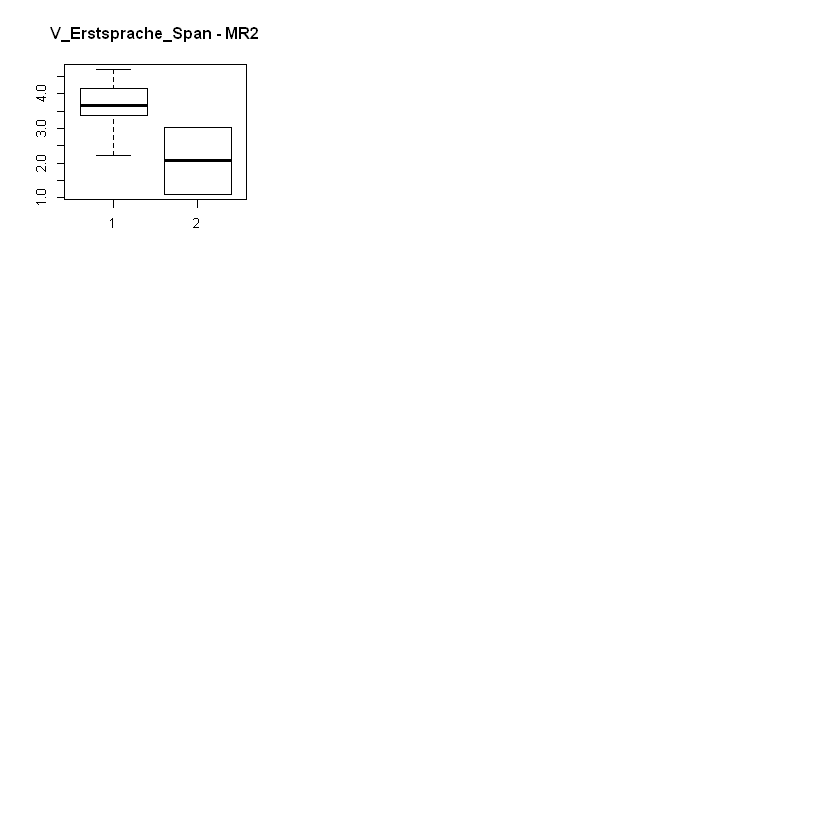

In [418]:
par(mfrow=c(3,3))
boxplot(MR2~V_Erstsprache_Span, data = Df_total[which(Df_total$V_Niveau_DK=='4'),], main = 'V_Erstsprache_Span - MR2')

MANOVA (C):

#### Niveaugruppe C

MANOVA:

In [419]:
res_anova3A <- MANOVA3_table(Df_total[which(Df_total$V_Niveau_DK=='5'),],vec_V[!vec_V %in% remove_sp])
res_anova3A[res_anova3A['Pr(>F)'] < 0.05,]

,Df,Pillai,approx F,num Df,den Df,Pr(>F)
V_Studienrichtung,2,0.8738417,2.327848,12,36,0.02506086
V_Spr_Germ,1,0.3815693,2.879315,6,28,0.02588930
V_Spr_Slaw,1,0.3756852,2.808195,6,28,0.02880748
V_E_Univ_andere,1,0.3901282,2.985215,6,28,0.02210124
V_E_Sozial,1,0.3582508,2.605125,6,28,0.03917075
V_Met_Training,1,0.4230311,3.421580,6,28,0.01164883


T-Test:

In [420]:
tabletstbonf(Df_total[which(Df_total$V_Niveau_DK=='5'),],c('V_Spr_Germ',
                                                           'V_Spr_Slaw',
                                                           'V_E_Univ_andere',
                                                           'V_E_Sozial',
                                                           'V_Met_Training'))

,MR1,MR2,MR3,MR4,MR5,MR6
V_Spr_Germ,0.00628497,0.621598382,0.07719146,0.041003749,0.03265956,0.576974121
V_Spr_Slaw,0.05770444,0.841183810,0.04386513,0.019648151,0.86452518,0.718420367
V_E_Univ_andere,0.04228850,0.259766508,0.97487259,0.000381408,0.72471893,0.042642583
V_E_Sozial,0.22242704,0.006735854,0.95121776,0.180514529,0.05232552,0.068031673
V_Met_Training,0.07289639,0.372240437,0.02850798,0.332988573,0.54598613,0.001185974


Deskriptive Statistik der Gruppen der Variablen mit p < 0.05 in der MANOVA:

In [421]:
df_details(Df_total[which((Df_total$V_Niveau_DK=='5')&(Df_total$V_Studienrichtung=='1')),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,19,2.218854,0.7829495,2.203341,2.224548,1.0198255,0.9210820,3.419821,2.498740,0.11057087,-1.4141051,0.1796209,0.9210820,1.575912,2.203341,2.218854,2.950520,3.419821
MR2,2,19,3.990378,0.6653948,4.113955,4.040721,0.7152007,2.2351928,4.889734,2.654542,-0.87355495,0.1497870,0.1526520,2.2351928,3.517577,4.113955,3.990378,4.507920,4.889734
MR3,3,19,3.418000,1.1888188,3.466912,3.459439,1.1621963,0.6698990,5.461636,4.791737,-0.34683471,-0.2859861,0.2727337,0.6698990,2.759361,3.466912,3.418000,4.019707,5.461636
MR4,4,19,2.446827,0.8215889,2.408553,2.444615,0.9664942,1.1251074,3.806160,2.681052,0.08257640,-1.1986389,0.1884854,1.1251074,1.844888,2.408553,2.446827,2.968129,3.806160
MR5,5,19,3.786579,0.6900696,3.933420,3.802981,0.6842307,2.5866923,4.707626,2.120934,-0.47848874,-1.1593504,0.1583128,2.5866923,3.413619,3.933420,3.786579,4.280273,4.707626
MR6,6,19,2.396732,1.1919307,2.521583,2.382029,1.7029892,0.6378163,4.405600,3.767784,0.02765159,-1.4479845,0.2734477,0.6378163,1.347136,2.521583,2.396732,3.326062,4.405600


In [473]:
#df_details(Df_total[which((Df_total$V_Niveau_DK=='5')&(Df_total$V_Studienrichtung=='2')),])

In [423]:
df_details(Df_total[which((Df_total$V_Niveau_DK=='5')&(Df_total$V_Studienrichtung=='3')),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,5,2.467360,0.6188661,2.2135679,2.467360,0.4357149,1.91968223,3.483108,1.563426,0.69918645,-1.400616,0.2767653,1.91968223,2.1226096,2.2135679,2.467360,2.597832,3.483108
MR2,2,5,4.087992,0.9914155,4.5325218,4.087992,0.2277864,2.35167904,4.686162,2.334483,-0.96946381,-1.058288,0.4433745,2.35167904,4.1889608,4.5325218,4.087992,4.680637,4.686162
MR3,3,5,3.952066,0.7157105,3.7626781,3.952066,0.6221211,3.34306320,5.076234,1.733171,0.55663316,-1.595941,0.3200755,3.34306320,3.3858195,3.7626781,3.952066,4.192535,5.076234
MR4,4,5,1.405326,0.8853321,0.9015573,1.405326,0.5526836,0.52877724,2.544800,2.016023,0.27827085,-2.115160,0.3959325,0.52877724,0.8989606,0.9015573,1.405326,2.152536,2.544800
MR5,5,5,3.784960,0.9641316,3.8920435,3.784960,1.0333242,2.52574413,5.013622,2.487878,-0.04699586,-1.846429,0.4311728,2.52574413,3.1950759,3.8920435,3.784960,4.298316,5.013622
MR6,6,5,1.640229,1.3741454,1.5100195,1.640229,0.8669402,0.04050664,3.722074,3.681568,0.35526919,-1.563364,0.6145365,0.04050664,0.9252763,1.5100195,1.640229,2.003269,3.722074


In [424]:
df_details(Df_total[which((Df_total$V_Niveau_DK=='5')&(Df_total$V_Studienrichtung=='4')),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,1,0.5465520,NA,0.5465520,0.5465520,0,0.5465520,0.5465520,0,NA,NA,NA,0.5465520,0.5465520,0.5465520,0.5465520,0.5465520,0.5465520
MR2,2,1,1.8628972,NA,1.8628972,1.8628972,0,1.8628972,1.8628972,0,NA,NA,NA,1.8628972,1.8628972,1.8628972,1.8628972,1.8628972,1.8628972
MR3,3,1,2.2460737,NA,2.2460737,2.2460737,0,2.2460737,2.2460737,0,NA,NA,NA,2.2460737,2.2460737,2.2460737,2.2460737,2.2460737,2.2460737
MR4,4,1,2.5344650,NA,2.5344650,2.5344650,0,2.5344650,2.5344650,0,NA,NA,NA,2.5344650,2.5344650,2.5344650,2.5344650,2.5344650,2.5344650
MR5,5,1,4.0612928,NA,4.0612928,4.0612928,0,4.0612928,4.0612928,0,NA,NA,NA,4.0612928,4.0612928,4.0612928,4.0612928,4.0612928,4.0612928
MR6,6,1,0.4597858,NA,0.4597858,0.4597858,0,0.4597858,0.4597858,0,NA,NA,NA,0.4597858,0.4597858,0.4597858,0.4597858,0.4597858,0.4597858


In [425]:
df_details(Df_total[which((Df_total$V_Niveau_DK=='5')&(Df_total$V_Spr_Germ=='1')),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,9,2.920611,0.5659337,3.009837,2.920611,0.5831520,1.9010370,3.419821,1.518785,-0.7784932,-1.0964327,0.1886446,1.9010370,2.891204,3.009837,2.920611,3.403167,3.419821
MR2,2,9,4.062712,0.6706375,4.157674,4.062712,0.4235939,2.6110222,4.889734,2.278712,-0.9496713,-0.1894894,0.2235458,2.6110222,4.060450,4.157674,4.062712,4.443384,4.889734
MR3,3,9,4.086555,1.1496764,4.418872,4.086555,1.5015566,2.3842305,5.461636,3.077406,-0.2136308,-1.6912334,0.3832255,2.3842305,3.268946,4.418872,4.086555,4.792619,5.461636
MR4,4,9,2.845302,0.8227328,2.913719,2.845302,1.0531944,1.5496654,3.729386,2.179721,-0.4262030,-1.4734710,0.2742443,1.5496654,2.473113,2.913719,2.845302,3.624089,3.729386
MR5,5,9,3.270666,0.5439835,3.355325,3.270666,0.8286406,2.6226723,4.051882,1.429209,0.1387812,-1.8212540,0.1813278,2.6226723,2.796415,3.355325,3.270666,3.655398,4.051882
MR6,6,9,2.574465,0.9782563,2.855244,2.574465,0.4946867,0.8766674,3.609615,2.732948,-0.7939365,-1.0831363,0.3260854,0.8766674,2.521583,2.855244,2.574465,3.134942,3.609615


In [426]:
df_details(Df_total[which((Df_total$V_Niveau_DK=='5')&(Df_total$V_Spr_Germ=='2')),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,26,1.952423,0.9319602,2.021146,2.013130,0.8007121,-0.81475212,3.483108,4.297860,-0.75513543,0.93632314,0.1827724,-0.81475212,1.456256,2.021146,1.952423,2.505492,3.483108
MR2,2,26,3.912083,0.8139940,4.151458,4.007417,0.6984489,1.86289724,4.730532,2.867635,-1.03964998,0.05913707,0.1596374,1.86289724,3.419213,4.151458,3.912083,4.582481,4.730532
MR3,3,26,3.362041,0.9844638,3.418896,3.410015,0.6719421,0.66989896,5.076234,4.406335,-0.59191976,0.57681095,0.1930692,0.66989896,2.963436,3.418896,3.362041,3.782128,5.076234
MR4,4,26,2.089333,0.9478509,2.253977,2.139590,0.8756767,-0.30541666,3.806160,4.111576,-0.54546836,-0.21355731,0.1858889,-0.30541666,1.473803,2.253977,2.089333,2.704062,3.806160
MR5,5,26,3.921115,0.8099847,4.077898,3.954976,0.6104092,2.03295707,5.367176,3.334219,-0.62629041,-0.34088812,0.1588511,2.03295707,3.688095,4.077898,3.921115,4.444519,5.367176
MR6,6,26,2.314005,1.2569507,2.283499,2.332786,1.4442868,0.04050664,4.405600,4.365093,-0.04654731,-1.33376273,0.2465083,0.04050664,1.350825,2.283499,2.314005,3.608970,4.405600


In [427]:
df_details(Df_total[which((Df_total$V_Niveau_DK=='5')&(Df_total$V_Spr_Slaw=='1')),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,3,3.189485,0.2350427,3.216733,3.189485,0.28611756,2.942006,3.409717,0.4677103,-0.1143686,-2.333333,0.1357020,2.942006,3.079370,3.216733,3.189485,3.313225,3.409717
MR2,2,3,3.863391,0.3746232,3.990824,3.863391,0.24737254,3.441676,4.157674,0.7159981,-0.3008014,-2.333333,0.2162888,3.441676,3.716250,3.990824,3.863391,4.074249,4.157674
MR3,3,3,4.719412,1.2596978,5.431658,4.719412,0.04444531,3.264941,5.461636,2.1966950,-0.3846550,-2.333333,0.7272868,3.264941,4.348300,5.431658,4.719412,5.446647,5.461636
MR4,4,3,3.504015,0.2534181,3.624089,3.504015,0.07559732,3.212878,3.675078,0.4622010,-0.3674439,-2.333333,0.1463110,3.212878,3.418483,3.624089,3.504015,3.649584,3.675078
MR5,5,3,3.830618,0.3219439,3.925437,3.830618,0.25065859,3.471913,4.094504,0.6225909,-0.2689730,-2.333333,0.1858744,3.471913,3.698675,3.925437,3.830618,4.009970,4.094504
MR6,6,3,2.621642,1.4220850,3.093114,2.621642,0.97110331,1.023697,3.748114,2.7244165,-0.2950947,-2.333333,0.8210412,1.023697,2.058405,3.093114,2.621642,3.420614,3.748114


In [428]:
df_details(Df_total[which((Df_total$V_Niveau_DK=='5')&(Df_total$V_Spr_Slaw=='2')),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,32,2.108751,0.9372057,2.162975,2.173887,0.9920385,-0.81475212,3.483108,4.297860,-0.7793238,0.93572345,0.1656761,-0.81475212,1.568874,2.162975,2.108751,2.906492,3.483108
MR2,2,32,3.959012,0.8033924,4.212000,4.072922,0.5782405,1.86289724,4.889734,3.026837,-1.0987360,0.15668316,0.1420211,1.86289724,3.535390,4.212000,3.959012,4.554740,4.889734
MR3,3,32,3.438557,0.9941629,3.459391,3.484708,1.0307445,0.66989896,5.076234,4.406335,-0.5205147,0.24372922,0.1757448,0.66989896,2.843132,3.459391,3.438557,4.135660,5.076234
MR4,4,32,2.169323,0.9277425,2.272539,2.213012,0.9035215,-0.30541666,3.806160,4.111576,-0.5277051,-0.06221409,0.1640033,-0.30541666,1.630151,2.272539,2.169323,2.832667,3.806160
MR5,5,32,3.746660,0.8302974,3.932096,3.756127,0.8424209,2.03295707,5.367176,3.334219,-0.2242853,-0.96529330,0.1467772,2.03295707,2.919038,3.932096,3.746660,4.302637,5.367176
MR6,6,32,2.358418,1.1828461,2.507949,2.392096,1.5800310,0.04050664,4.405600,4.365093,-0.1889711,-1.17978309,0.2090996,0.04050664,1.365563,2.507949,2.358418,3.292339,4.405600


In [429]:
df_details(Df_total[which((Df_total$V_Niveau_DK=='5')&(Df_total$V_E_Univ_andere=='1')),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,18,2.514729,0.7618523,2.707905,2.558396,0.7512276,0.9210820,3.409717,2.488635,-0.6085107,-0.9461995,0.1795703,0.9210820,2.112054,2.707905,2.514729,3.085248,3.409717
MR2,2,18,4.095744,0.4374256,4.114844,4.098609,0.3098247,3.2559167,4.889734,1.633818,-0.2515651,-0.5850316,0.1031022,3.2559167,3.932060,4.114844,4.095744,4.313386,4.889734
MR3,3,18,3.542727,1.2756774,3.510041,3.602347,1.1129581,0.6698990,5.461636,4.791737,-0.3519336,-0.4520120,0.3006800,0.6698990,2.963436,3.510041,3.542727,4.499618,5.461636
MR4,4,18,2.808239,0.7017986,2.847050,2.833870,0.6924851,1.4002234,3.806160,2.405936,-0.3065509,-0.9666599,0.1654155,1.4002234,2.334287,2.847050,2.808239,3.219840,3.806160
MR5,5,18,3.706746,0.7797642,3.928104,3.748803,0.7559945,2.0329571,4.707626,2.674669,-0.5200914,-0.9102223,0.1837922,2.0329571,3.082202,3.928104,3.706746,4.183959,4.707626
MR6,6,18,2.771555,1.1583455,3.043953,2.790989,1.0999073,0.8265804,4.405600,3.579020,-0.4432891,-1.3013601,0.2730247,0.8265804,2.085389,3.043953,2.771555,3.768759,4.405600


In [430]:
df_details(Df_total[which((Df_total$V_Niveau_DK=='5')&(Df_total$V_E_Univ_andere=='2')),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,17,1.869610,1.0319091,1.901037,1.941001,0.7244932,-0.81475212,3.483108,4.297860,-0.65908379,0.6058338,0.2502747,-0.81475212,1.552962,1.901037,1.869610,2.389701,3.483108
MR2,2,17,3.797363,1.0088112,4.369761,3.864116,0.4690948,1.86289724,4.730532,2.867635,-0.65289859,-1.2696362,0.2446727,1.86289724,3.210665,4.369761,3.797363,4.607683,4.730532
MR3,3,17,3.554292,0.8157272,3.451869,3.540044,1.0761638,2.24607370,5.076234,2.830160,0.06372149,-1.0051929,0.1978429,2.24607370,3.224121,3.451869,3.554292,4.192535,5.076234
MR4,4,17,1.728358,0.9058204,1.699547,1.775137,1.0511717,-0.30541666,3.060444,3.365861,-0.46427344,-0.6731031,0.2196937,-0.30541666,1.125107,1.699547,1.728358,2.408553,3.060444
MR5,5,17,3.803738,0.8358768,3.933420,3.784708,0.8214669,2.52574413,5.367176,2.841432,-0.03234267,-1.0591966,0.2027299,2.52574413,3.195076,3.933420,3.803738,4.298316,5.367176
MR6,6,17,1.967430,1.0938547,2.003269,1.978915,1.2631387,0.04050664,3.722074,3.681568,-0.13357478,-1.3492976,0.2652987,0.04050664,1.343456,2.003269,1.967430,2.855244,3.722074


In [431]:
df_details(Df_total[which((Df_total$V_Niveau_DK=='5')&(Df_total$V_E_Sozial=='1')),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,17,2.404760,0.6646244,2.389701,2.411288,0.8341924,1.30842717,3.403167,2.094740,-0.2248598,-1.19537463,0.1611951,1.30842717,2.081625,2.389701,2.404760,3.009837,3.403167
MR2,2,17,4.303270,0.4133639,4.369761,4.333996,0.3968419,3.25591673,4.889734,1.633818,-0.7524679,-0.01484241,0.1002555,3.25591673,4.060450,4.369761,4.303270,4.607683,4.889734
MR3,3,17,3.536792,1.1828033,3.610476,3.625289,0.9493485,0.66989896,5.076234,4.406335,-0.7879599,-0.02090960,0.2868719,0.66989896,3.207223,3.610476,3.536792,4.250803,5.076234
MR4,4,17,2.510594,0.8574900,2.473113,2.556344,0.6532428,0.52877724,3.806160,3.277382,-0.6853298,0.02752103,0.2079719,0.52877724,2.250888,2.473113,2.510594,2.967593,3.806160
MR5,5,17,4.021176,0.6706050,4.119109,4.036664,0.6874979,2.79641470,5.013622,2.217207,-0.5627558,-0.88274506,0.1626456,2.79641470,3.655398,4.119109,4.021176,4.491735,5.013622
MR6,6,17,2.755442,1.0927478,2.994792,2.857672,1.1576857,0.04050664,3.936930,3.896424,-0.8790792,-0.13432523,0.2650303,0.04050664,2.095782,2.994792,2.755442,3.722074,3.936930


In [432]:
df_details(Df_total[which((Df_total$V_Niveau_DK=='5')&(Df_total$V_E_Sozial=='2')),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,18,2.009310,1.1403888,1.851278,2.093701,1.2429745,-0.8147521,3.483108,4.297860,-0.5757751,-0.1721048,0.2687922,-0.8147521,1.5582662,1.851278,2.009310,2.929306,3.483108
MR2,2,18,3.617943,0.8902802,3.792151,3.658096,0.8575508,1.8628972,4.730532,2.867635,-0.5097687,-1.1205156,0.2098411,1.8628972,3.2122027,3.792151,3.617943,4.306913,4.730532
MR3,3,18,3.559255,0.9678342,3.418844,3.522430,0.7877086,2.2460737,5.461636,3.215563,0.5871660,-0.7081894,0.2281207,2.2460737,2.8505350,3.418844,3.559255,3.782128,5.461636
MR4,4,18,2.069460,1.0355587,1.926042,2.117539,0.9652020,-0.3054167,3.675078,3.980495,-0.2876588,-0.5454552,0.2440835,-0.3054167,1.4375839,1.926042,2.069460,2.764657,3.675078
MR5,5,18,3.501388,0.8415783,3.662931,3.476553,0.7782694,2.0329571,5.367176,3.334219,0.1539438,-0.7058700,0.1983619,2.0329571,2.7390905,3.662931,3.501388,4.040281,5.367176
MR6,6,18,2.027322,1.1848775,1.756644,1.976650,1.3417832,0.4597858,4.405600,3.945814,0.3585238,-1.2374784,0.2792783,0.4597858,0.9498815,1.756644,2.027322,2.995693,4.405600


In [433]:
df_details(Df_total[which((Df_total$V_Niveau_DK=='5')&(Df_total$V_Met_Training=='1')),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,15,2.532470,0.7960192,2.524606,2.588165,0.8580615,0.9210820,3.419821,2.498740,-0.5673870,-0.9934445,0.2055313,0.9210820,2.147596,2.524606,2.532470,3.160047,3.419821
MR2,2,15,4.087656,0.6858589,4.157674,4.168455,0.6503831,2.2351928,4.889734,2.654542,-1.1774341,0.9489145,0.1770880,2.2351928,3.890889,4.157674,4.087656,4.616890,4.889734
MR3,3,15,3.995814,0.9345921,3.656665,4.006071,0.6412906,2.3966408,5.461636,3.064995,0.2655618,-1.2923715,0.2413106,2.3966408,3.327434,3.656665,3.995814,4.900292,5.461636
MR4,4,15,2.468979,0.8332687,2.473113,2.496973,1.0293603,0.8989606,3.675078,2.776118,-0.2856196,-1.1260616,0.2151491,0.8989606,1.927152,2.473113,2.468979,3.067500,3.675078
MR5,5,15,3.849650,0.6427072,3.930772,3.864670,0.8253933,2.7964147,4.707626,1.911212,-0.3588655,-1.2867069,0.1659463,2.7964147,3.413619,3.930772,3.849650,4.366219,4.707626
MR6,6,15,3.088772,0.8722579,3.093114,3.146330,0.9324974,1.0236972,4.405600,3.381903,-0.6271106,-0.2519800,0.2252160,1.0236972,2.578162,3.093114,3.088772,3.762765,4.405600


In [434]:
df_details(Df_total[which((Df_total$V_Niveau_DK=='5')&(Df_total$V_Met_Training=='2')),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,20,1.953072,0.9945801,1.910360,2.036706,0.8009570,-0.81475212,3.483108,4.297860,-0.79587888,0.8157796,0.2223949,-0.81475212,1.5207268,1.910360,1.953072,2.671175,3.483108
MR2,2,20,3.848186,0.8346830,4.151458,3.958278,0.6268702,1.86289724,4.730532,2.867635,-0.92940614,-0.3679294,0.1866408,1.86289724,3.2461417,4.151458,3.848186,4.489359,4.730532
MR3,3,20,3.212742,1.0470073,3.364441,3.286953,1.1534531,0.66989896,4.792619,4.122720,-0.52818417,-0.2733634,0.2341179,0.66989896,2.5893698,3.364441,3.212742,3.889592,4.792619
MR4,4,20,2.144785,1.0531875,2.253977,2.196049,0.9316206,-0.30541666,3.806160,4.111576,-0.46938355,-0.4251761,0.2354999,-0.30541666,1.5927908,2.253977,2.144785,2.842144,3.806160
MR5,5,20,3.682011,0.9053624,3.915596,3.668795,0.8306441,2.03295707,5.367176,3.334219,-0.09629931,-1.0621813,0.2024452,2.03295707,2.7418781,3.915596,3.682011,4.228761,5.367176
MR6,6,20,1.850136,1.1193381,1.494101,1.819823,1.1295969,0.04050664,3.775640,3.735134,0.23820699,-1.3252022,0.2502916,0.04050664,0.9131241,1.494101,1.850136,2.890131,3.775640


Boxplots:

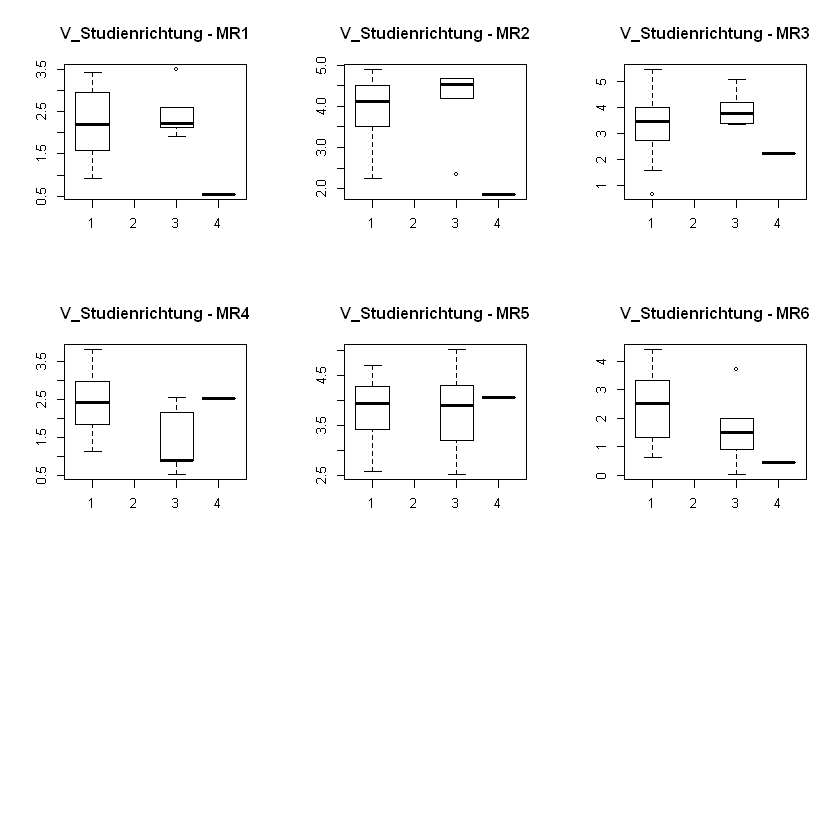

In [435]:
par(mfrow=c(3,3))
boxplot(MR1~V_Studienrichtung, data = Df_total[which(Df_total$V_Niveau_DK=='5'),], main = 'V_Studienrichtung - MR1')
boxplot(MR2~V_Studienrichtung, data = Df_total[which(Df_total$V_Niveau_DK=='5'),], main = 'V_Studienrichtung - MR2')
boxplot(MR3~V_Studienrichtung, data = Df_total[which(Df_total$V_Niveau_DK=='5'),], main = 'V_Studienrichtung - MR3')
boxplot(MR4~V_Studienrichtung, data = Df_total[which(Df_total$V_Niveau_DK=='5'),], main = 'V_Studienrichtung - MR4')
boxplot(MR5~V_Studienrichtung, data = Df_total[which(Df_total$V_Niveau_DK=='5'),], main = 'V_Studienrichtung - MR5')
boxplot(MR6~V_Studienrichtung, data = Df_total[which(Df_total$V_Niveau_DK=='5'),], main = 'V_Studienrichtung - MR6')

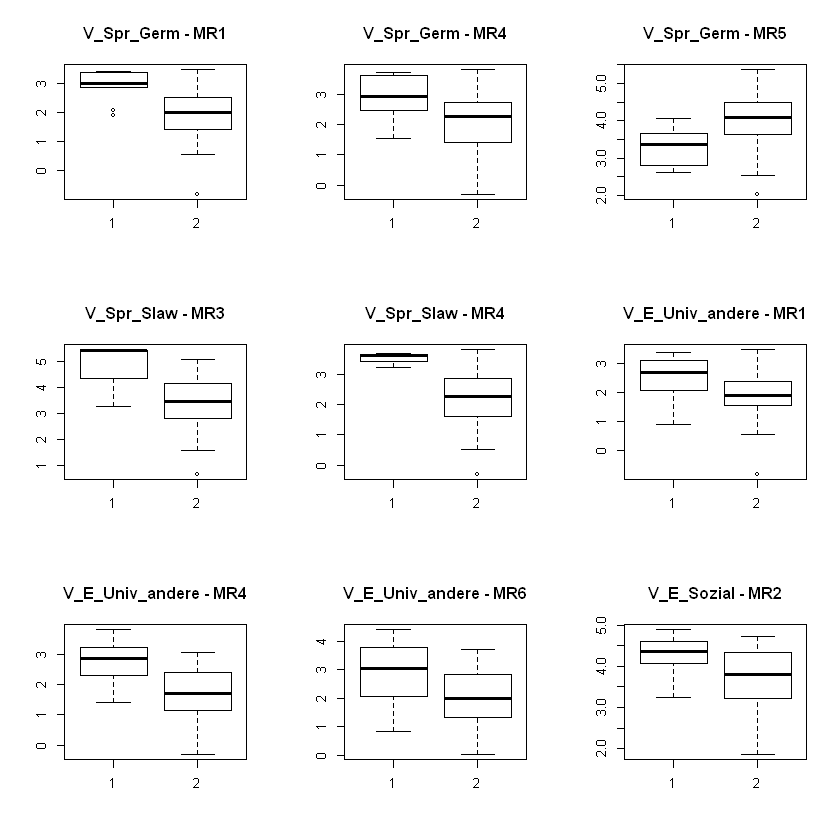

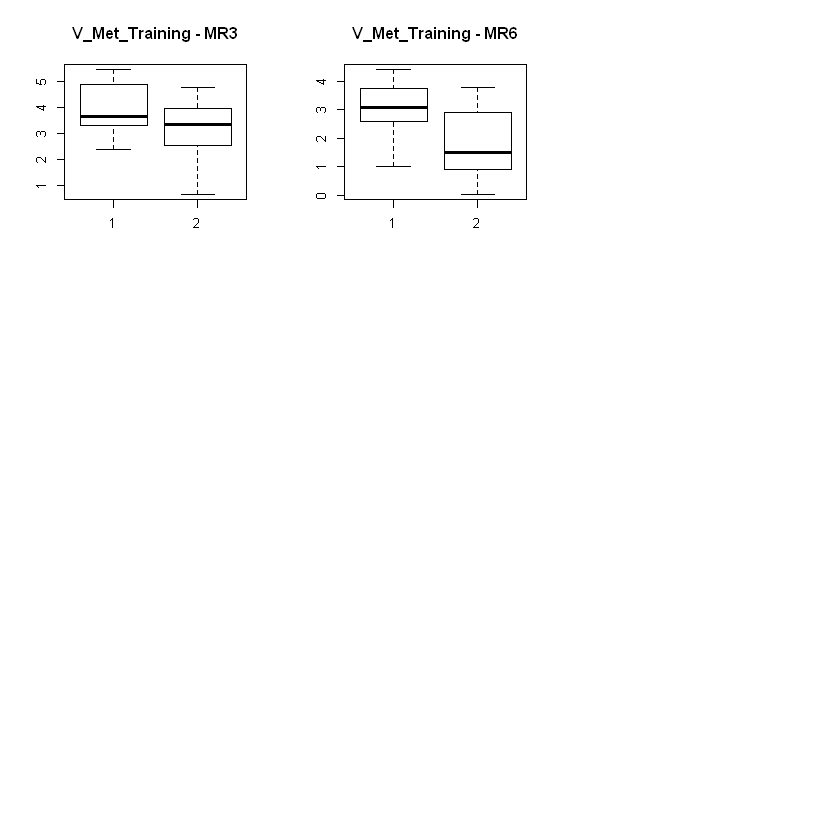

In [436]:
par(mfrow=c(3,3))
boxplot(MR1~V_Spr_Germ, data = Df_total[which(Df_total$V_Niveau_DK=='5'),], main = 'V_Spr_Germ - MR1')
boxplot(MR4~V_Spr_Germ, data = Df_total[which(Df_total$V_Niveau_DK=='5'),], main = 'V_Spr_Germ - MR4')
boxplot(MR5~V_Spr_Germ, data = Df_total[which(Df_total$V_Niveau_DK=='5'),], main = 'V_Spr_Germ - MR5')
boxplot(MR3~V_Spr_Slaw, data = Df_total[which(Df_total$V_Niveau_DK=='5'),], main = 'V_Spr_Slaw - MR3')
boxplot(MR4~V_Spr_Slaw, data = Df_total[which(Df_total$V_Niveau_DK=='5'),], main = 'V_Spr_Slaw - MR4')
boxplot(MR1~V_E_Univ_andere, data = Df_total[which(Df_total$V_Niveau_DK=='5'),], main = 'V_E_Univ_andere - MR1')
boxplot(MR4~V_E_Univ_andere, data = Df_total[which(Df_total$V_Niveau_DK=='5'),], main = 'V_E_Univ_andere - MR4')
boxplot(MR6~V_E_Univ_andere, data = Df_total[which(Df_total$V_Niveau_DK=='5'),], main = 'V_E_Univ_andere - MR6')
boxplot(MR2~V_E_Sozial, data = Df_total[which(Df_total$V_Niveau_DK=='5'),], main = 'V_E_Sozial - MR2')
boxplot(MR3~V_Met_Training, data = Df_total[which(Df_total$V_Niveau_DK=='5'),], main = 'V_Met_Training - MR3')
boxplot(MR6~V_Met_Training, data = Df_total[which(Df_total$V_Niveau_DK=='5'),], main = 'V_Met_Training - MR6')

### Überprüfung weiterer möglicher Einflussfaktoren

In [437]:
colnames(Df_total[,vec_W])

[1] "W_Erhebung_im_U"    "W_Erhebung_nicht_U" "W_Pilot"           
[4] "W_Papierversion_FB" "W_Univ"

### AQ2

MANOVA:

In [438]:
res_anova2w <- MANOVA2_table(Df_total2,vec_W)
res_anova2w[res_anova2w['Pr(>F)'] < 0.05,]

,Df,Pillai,approx F,num Df,den Df,Pr(>F)
W_Pilot,1,0.02393868,3.155652,3,386,0.02481395
W_Univ,6,0.10812781,2.368049,18,1140,0.00105728


T-Test:

In [439]:
tabletstbonf2(Df_total2,c('W_Pilot'))

,MR1,MR2,MR3
W_Pilot,0.01182687,0.1034725,0.6951215


Deskriptive Statistik der Gruppen der Variablen mit p < 0.05 in der MANOVA:

In [440]:
df_details2(Df_total2[which(Df_total2$W_Univ=='1'),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,152,4.312037,0.8384479,4.402409,4.364036,1.0865563,1.8161166,5.554605,3.738489,-0.45264115,-0.5600214,0.06800710,1.8161166,3.660131,4.402409,4.312037,5.131256,5.554605
MR2,2,152,3.357615,0.9669693,3.133267,3.393304,1.1303943,0.9884927,4.986636,3.998143,-0.38772812,-0.1825350,0.07843157,0.9884927,2.925329,3.133267,3.357615,3.958085,4.986636
MR3,3,152,1.930763,0.7127889,1.968242,1.927286,0.6797853,-0.1514768,3.551351,3.702827,-0.07581463,0.1249632,0.05781481,-0.1514768,1.454408,1.968242,1.930763,2.348450,3.551351


In [441]:
df_details2(Df_total2[which(Df_total2$W_Univ=='2'),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,56,4.559911,0.7917235,4.603327,4.661165,0.860963,1.8146460,5.502637,3.687991,-1.20165501,1.49509497,0.1057985,1.8146460,4.210426,4.603327,4.559911,5.241193,5.502637
MR2,2,56,3.457347,0.9270988,3.073970,3.474281,1.235141,1.0609620,5.045913,3.984951,-0.05589863,-0.48625024,0.1238888,1.0609620,2.905205,3.073970,3.457347,3.974747,5.045913
MR3,3,56,1.867692,0.8469815,2.069233,1.904197,0.795376,-0.4543744,3.342544,3.796919,-0.44200308,-0.05055306,0.1131827,-0.4543744,1.429750,2.069233,1.867692,2.307229,3.342544


In [442]:
df_details2(Df_total2[which(Df_total2$W_Univ=='3'),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,35,3.897916,0.9337410,3.900310,3.911927,1.0248209,1.9769697,5.369727,3.392757,-0.03993286,-1.0593239,0.1578310,1.9769697,3.199131,3.900310,3.897916,4.548309,5.369727
MR2,2,35,3.589166,0.9699435,3.939451,3.634900,1.3070928,1.3315160,4.926034,3.594518,-0.41262891,-0.7655021,0.1639504,1.3315160,2.954568,3.939451,3.589166,4.027089,4.926034
MR3,3,35,2.042058,0.6674597,2.168900,2.083809,0.6192638,-0.2166885,3.068277,3.284966,-1.00205543,1.6350118,0.1128213,-0.2166885,1.687585,2.168900,2.042058,2.475041,3.068277


In [443]:
df_details2(Df_total2[which(Df_total2$W_Univ=='4'),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,30,3.753933,0.7158903,3.699640,3.758492,0.8416760,2.492053,5.175857,2.683804,0.002176031,-0.9145713,0.1307031,2.492053,3.334761,3.699640,3.753933,4.351428,5.175857
MR2,2,30,3.605099,0.9254993,3.923666,3.663409,1.1040047,1.318544,4.978877,3.660333,-0.483530377,-0.3060545,0.1689723,1.318544,3.086450,3.923666,3.605099,4.047304,4.978877
MR3,3,30,2.087081,0.6787454,2.078489,2.022407,0.4868082,0.642382,3.753259,3.110877,0.623182053,0.2498534,0.1239214,0.642382,1.619631,2.078489,2.087081,2.350075,3.753259


In [444]:
df_details2(Df_total2[which(Df_total2$W_Univ=='5'),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,28,4.531990,0.7423383,4.513591,4.603454,0.6548571,1.9900925,5.417863,3.427770,-1.22660929,2.5125315,0.1402888,1.9900925,4.256055,4.513591,4.531990,5.237963,5.417863
MR2,2,28,3.158759,0.9689804,3.103594,3.213930,1.2701503,1.1418157,4.836053,3.694237,-0.49545248,-0.8485946,0.1831201,1.1418157,2.649627,3.103594,3.158759,3.953911,4.836053
MR3,3,28,1.814274,0.6243279,1.894063,1.811518,0.7681087,0.3990541,3.164330,2.765276,-0.02754678,-0.7115918,0.1179869,0.3990541,1.329593,1.894063,1.814274,2.310644,3.164330


In [445]:
df_details2(Df_total2[which(Df_total2$W_Univ=='6'),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,27,4.147087,0.7918752,4.262065,4.216936,0.4026938,2.0078137,5.377992,3.370178,-1.0203095,0.9706484,0.1523965,2.0078137,3.901997,4.262065,4.147087,4.509778,5.377992
MR2,2,27,3.419976,0.8280948,3.102180,3.409820,1.1212746,1.9831567,4.954546,2.971390,0.1319991,-0.8800243,0.1593669,1.9831567,2.853456,3.102180,3.419976,3.972383,4.954546
MR3,3,27,1.848117,0.7314929,1.573336,1.819813,0.5644937,0.3341509,3.409799,3.075648,0.4287003,-0.3337580,0.1407759,0.3341509,1.387238,1.573336,1.848117,2.245949,3.409799


In [446]:
df_details2(Df_total2[which(Df_total2$W_Univ=='7'),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,59,4.368137,0.6925320,4.376762,4.404566,0.4295711,2.6859232,5.524191,2.838267,-0.49050670,-0.1481696,0.09015999,2.6859232,4.157491,4.376762,4.368137,4.715684,5.524191
MR2,2,59,3.298370,0.9604870,3.061517,3.304856,1.1854854,1.0663267,5.013733,3.947407,-0.10953107,-0.4686982,0.12504475,1.0663267,2.933653,3.061517,3.298370,3.944514,5.013733
MR3,3,59,1.854746,0.7737005,2.025982,1.859334,0.8964603,0.1765897,3.381702,3.205112,-0.08081278,-0.7631860,0.10072723,0.1765897,1.352277,2.025982,1.854746,2.358349,3.381702


In [447]:
df_details2(Df_total2[which(Df_total2$W_Pilot=='1'),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,66,4.507373,0.7050883,4.525060,4.549207,0.8998812,2.9336966,5.527126,2.593429,-0.4065146,-0.9977352,0.08679037,2.9336966,4.002528,4.525060,4.507373,5.209316,5.527126
MR2,2,66,3.221788,1.0143879,3.041589,3.277545,1.2269137,0.9884927,4.986636,3.998143,-0.5161880,-0.1118578,0.12486252,0.9884927,2.880077,3.041589,3.221788,3.920145,4.986636
MR3,3,66,1.881230,0.6175442,2.003431,1.889272,0.6228038,0.4291056,3.171805,2.742699,-0.1901886,-0.3197426,0.07601444,0.4291056,1.454783,2.003431,1.881230,2.302954,3.171805


In [448]:
df_details2(Df_total2[which(Df_total2$W_Pilot=='2'),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,324,4.226476,0.8440178,4.321828,4.283965,0.9236128,1.8146460,5.554605,3.739959,-0.5199165,-0.27556666,0.04688988,1.8146460,3.621484,4.321828,4.226476,4.786343,5.554605
MR2,2,324,3.429793,0.9288501,3.405003,3.450520,0.8204280,1.0609620,5.045913,3.984951,-0.2301908,-0.46397978,0.05160278,1.0609620,2.935026,3.405003,3.429793,3.994369,5.045913
MR3,3,324,1.919976,0.7523699,1.989961,1.926846,0.7320639,-0.4543744,3.753259,4.207634,-0.1603557,0.09604842,0.04179833,-0.4543744,1.420719,1.989961,1.919976,2.364677,3.753259


##### Analyse der Gruppe Salamanca (Variable Universitäten)

In [449]:
remove1 <- c(97)
vec_W[!vec_W %in% remove1]

[1] 93 94 95 96

MANOVA:

In [450]:
res_anova2w <- MANOVA2_table(Df_total2[which(Df_total$W_Univ=='1'),],vec_W[!vec_W %in% remove1])
res_anova2w[res_anova2w['Pr(>F)'] < 0.05,]

,Df,Pillai,approx F,num Df,den Df,Pr(>F)
W_Pilot,1,0.06519717,3.440719,3,148,0.01846834


T-Test:

In [451]:
tabletstbonf2(Df_total2[which(Df_total$W_Univ=='1'),],c('W_Pilot'))

,MR1,MR2,MR3
W_Pilot,0.01165647,0.1505467,0.5354974


Deskriptive Statistik der Gruppen der Variablen mit p < 0.05 in der MANOVA:

In [452]:
df_details2(Df_total2[which((Df_total2$W_Pilot=='1')&(Df_total$W_Univ=='1')),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,65,4.509383,0.7103849,4.527159,4.552460,0.8990402,2.9336966,5.527126,2.593429,-0.4118641,-1.0222960,0.08811241,2.9336966,4.000844,4.527159,4.509383,5.221458,5.527126
MR2,2,65,3.226968,1.0214020,3.045610,3.284950,1.2253003,0.9884927,4.986636,3.998143,-0.5278357,-0.1367768,0.12668932,0.9884927,2.878412,3.045610,3.226968,3.920924,4.986636
MR3,3,65,1.889137,0.6189737,2.012886,1.899121,0.6326390,0.4291056,3.171805,2.742699,-0.2207082,-0.3005627,0.07677424,0.4291056,1.456249,2.012886,1.889137,2.307490,3.171805


In [453]:
df_details2(Df_total2[which((Df_total2$W_Pilot=='2')&(Df_total$W_Univ=='1')),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,87,4.164595,0.8985265,4.337356,4.202157,1.1824626,1.8161166,5.554605,3.738489,-0.31034202,-0.71051514,0.09633215,1.8161166,3.470382,4.337356,4.164595,4.774573,5.554605
MR2,2,87,3.455225,0.9180511,3.610594,3.473710,0.9098541,1.2506026,4.951837,3.701235,-0.17406395,-0.63243547,0.09842541,1.2506026,2.938381,3.610594,3.455225,4.017825,4.951837
MR3,3,87,1.961863,0.7776027,1.890291,1.962179,0.6988932,-0.1514768,3.551351,3.702827,-0.06255203,0.01960973,0.08336776,-0.1514768,1.450479,1.890291,1.961863,2.387312,3.551351


### AQ3

MANOVA:

In [454]:
res_anova3w <- MANOVA3_table(Df_total,vec_W)
res_anova3w[res_anova3w['Pr(>F)'] < 0.05,]

,Df,Pillai,approx F,num Df,den Df,Pr(>F)
W_Papierversion_FB,1,0.03464824,2.291095,6,383,3.475059e-02
W_Univ,6,0.23277042,2.556189,36,2280,1.218541e-06


T-Test:

In [455]:
tabletstbonf(Df_total,c('W_Papierversion_FB'))

,MR1,MR2,MR3,MR4,MR5,MR6
W_Papierversion_FB,0.568019,0.0008198992,0.2495228,0.5317759,0.4491906,0.9810195


Deskriptive Statistik der Gruppen der Variablen mit p < 0.05 in der MANOVA:

In [456]:
df_details(Df_total[which(Df_total$W_Univ=='1'),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,152,2.095436,0.9821917,2.092502,2.140854,0.8975456,-1.60462540,4.025577,5.630202,-0.53616860,0.7341947,0.07966626,-1.60462540,1.549046,2.092502,2.095436,2.746473,4.025577
MR2,2,152,3.123758,1.0885929,3.266952,3.169273,1.1682599,0.20962228,5.196618,4.986996,-0.34468255,-0.6022262,0.08829654,0.20962228,2.429425,3.266952,3.123758,3.999208,5.196618
MR3,3,152,3.507780,0.9261933,3.498534,3.502853,0.9790115,1.39095309,5.804806,4.413852,0.08181385,-0.3656564,0.07512419,1.39095309,2.835456,3.498534,3.507780,4.110817,5.804806
MR4,4,152,1.813620,0.8554814,1.879063,1.831101,0.9174524,-0.61360860,3.675078,4.288687,-0.24476634,-0.3306600,0.06938870,-0.61360860,1.206955,1.879063,1.813620,2.392301,3.675078
MR5,5,152,3.581074,0.8759846,3.619176,3.596426,0.9477440,0.56307017,5.704204,5.141134,-0.23347455,0.1674564,0.07105174,0.56307017,2.938432,3.619176,3.581074,4.202968,5.704204
MR6,6,152,2.692093,0.9600394,2.743332,2.737045,0.9501272,0.04050664,4.609336,4.568830,-0.38444244,-0.2276356,0.07786948,0.04050664,2.073750,2.743332,2.692093,3.350893,4.609336


In [457]:
df_details(Df_total[which(Df_total$W_Univ=='2'),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,56,2.088782,0.9228915,2.144258,2.159842,0.8302455,-0.8147521,3.789422,4.604174,-0.8761370,1.2435557,0.12332656,-0.8147521,1.688812,2.144258,2.088782,2.788636,3.789422
MR2,2,56,3.723995,0.7462084,3.831094,3.775732,0.9085504,2.0834324,4.753660,2.670228,-0.4352840,-0.8436850,0.09971629,2.0834324,3.215279,3.831094,3.723995,4.387930,4.753660
MR3,3,56,3.331489,0.9924810,3.425923,3.357274,1.0407707,0.6698990,5.282902,4.613004,-0.2499495,-0.3030460,0.13262585,0.6698990,2.650237,3.425923,3.331489,4.020076,5.282902
MR4,4,56,1.859297,1.2235692,1.977135,1.882757,1.0856117,-0.8240844,4.612436,5.436521,-0.2891971,-0.5031853,0.16350631,-0.8240844,1.237855,1.977135,1.859297,2.650513,4.612436
MR5,5,56,3.569574,1.0258323,3.673515,3.644646,1.0705822,0.1429925,5.367176,5.224183,-0.8896645,1.0848707,0.13708261,0.1429925,2.941146,3.673515,3.569574,4.333438,5.367176
MR6,6,56,2.695029,0.9876163,2.897596,2.726123,1.0785714,0.6802366,4.405600,3.725363,-0.3100431,-0.9848810,0.13197577,0.6802366,2.051179,2.897596,2.695029,3.593343,4.405600


In [458]:
df_details(Df_total[which(Df_total$W_Univ=='3'),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,35,1.708108,0.9095902,1.934211,1.763935,0.8305897,-0.3303774,3.180898,3.511275,-0.5485561,-0.4241970,0.1537488,-0.3303774,1.2396332,1.934211,1.708108,2.375823,3.180898
MR2,2,35,2.504104,1.1192460,2.553167,2.489626,1.3701579,0.5701177,4.668742,4.098624,0.1375223,-0.9178755,0.1891871,0.5701177,1.5836550,2.553167,2.504104,2.932689,4.668742
MR3,3,35,3.755099,0.7883795,3.731999,3.802004,0.6321014,1.9677458,5.061999,3.094253,-0.4250971,-0.3977565,0.1332605,1.9677458,3.3623192,3.731999,3.755099,4.286906,5.061999
MR4,4,35,1.437267,1.1025403,1.229795,1.422067,0.9668009,-0.8399535,3.590001,4.429954,0.1789839,-0.7456812,0.1863633,-0.8399535,0.6194818,1.229795,1.437267,2.058448,3.590001
MR5,5,35,3.117927,0.8944531,3.031455,3.079410,1.0264715,1.6497779,5.343856,3.694079,0.4306420,-0.4918784,0.1511902,1.6497779,2.4222671,3.031455,3.117927,3.726860,5.343856
MR6,6,35,2.543390,0.8795320,2.694232,2.569442,0.8456696,0.4198027,4.399923,3.980120,-0.2006276,-0.3102759,0.1486680,0.4198027,2.0701794,2.694232,2.543390,3.070968,4.399923


In [459]:
df_details(Df_total[which(Df_total$W_Univ=='4'),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,30,1.842283,0.7761646,1.721662,1.842683,0.6846602,0.0953174,3.294980,3.199663,0.02015477,-0.6582408,0.1417076,0.0953174,1.374555,1.721662,1.842283,2.390555,3.294980
MR2,2,30,3.109271,0.8769398,3.060264,3.129190,0.6758014,1.4945324,4.566616,3.072084,-0.05668869,-0.7822379,0.1601066,1.4945324,2.637223,3.060264,3.109271,3.572253,4.566616
MR3,3,30,3.609437,0.8092143,3.611985,3.549132,0.9461990,2.1870108,5.655395,3.468384,0.59615120,-0.3369735,0.1477416,2.1870108,2.954215,3.611985,3.609437,4.015496,5.655395
MR4,4,30,1.590273,0.8572101,1.660721,1.624198,0.7796779,-0.5189135,3.018591,3.537504,-0.46330399,-0.2378058,0.1565044,-0.5189135,1.180713,1.660721,1.590273,2.193640,3.018591
MR5,5,30,3.120706,0.8176917,3.017074,3.073238,0.6389230,1.7865513,4.961446,3.174895,0.56749160,-0.2589175,0.1492894,1.7865513,2.577787,3.017074,3.120706,3.399215,4.961446
MR6,6,30,2.734440,1.0781380,2.792900,2.777636,1.1369428,0.2820378,4.424725,4.142687,-0.28396425,-0.8625305,0.1968402,0.2820378,2.048444,2.792900,2.734440,3.562180,4.424725


In [460]:
df_details(Df_total[which(Df_total$W_Univ=='5'),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,28,1.885237,0.9076880,2.042742,1.932252,0.6652795,-0.5668275,3.488443,4.055271,-0.5453739,0.16339263,0.1715369,-0.5668275,1.476671,2.042742,1.885237,2.353957,3.488443
MR2,2,28,3.602248,0.7977957,3.588351,3.667922,0.7882945,1.4941343,4.702859,3.208725,-0.7208896,0.08467693,0.1507692,1.4941343,3.286236,3.588351,3.602248,4.234850,4.702859
MR3,3,28,3.101637,0.9475521,3.151399,3.107482,1.0286382,1.4767810,4.772055,3.295274,-0.1130454,-1.09890413,0.1790705,1.4767810,2.462472,3.151399,3.101637,3.711082,4.772055
MR4,4,28,1.858333,1.2162897,2.068531,1.894534,1.2085605,-0.5069142,3.991044,4.497958,-0.4683617,-0.62072197,0.2298571,-0.5069142,1.158222,2.068531,1.858333,2.801479,3.991044
MR5,5,28,3.572773,1.0287123,3.835506,3.664561,1.1584017,0.7513850,5.009892,4.258507,-0.8310373,0.26324474,0.1944083,0.7513850,2.893114,3.835506,3.572773,4.177624,5.009892
MR6,6,28,2.602769,1.1017394,2.748970,2.644275,1.2397361,0.2371458,4.278910,4.041764,-0.3832797,-0.90019527,0.2082092,0.2371458,1.715619,2.748970,2.602769,3.397305,4.278910


In [461]:
df_details(Df_total[which(Df_total$W_Univ=='6'),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,27,2.161109,0.7462593,2.142599,2.149030,0.4352100,0.6189097,3.767319,3.148410,0.07816334,-0.04718029,0.1436177,0.6189097,1.8775879,2.142599,2.161109,2.442008,3.767319
MR2,2,27,3.334222,1.0398774,3.473865,3.402368,1.0474091,0.8047394,5.057485,4.252745,-0.64471552,-0.08038576,0.2001245,0.8047394,2.7614153,3.473865,3.334222,4.103163,5.057485
MR3,3,27,2.942792,0.8965215,2.772618,2.953877,1.1711537,1.3726650,4.375644,3.002979,-0.07742628,-1.34916060,0.1725356,1.3726650,2.3200543,2.772618,2.942792,3.817095,4.375644
MR4,4,27,1.573118,1.0229164,1.485339,1.555562,0.9009618,-0.3244765,3.650614,3.975090,0.16548016,-0.71434344,0.1968603,-0.3244765,0.9860634,1.485339,1.573118,2.095584,3.650614
MR5,5,27,3.420891,0.7994277,3.484755,3.439320,0.6925061,1.5420035,4.844399,3.302396,-0.11525993,-0.31165615,0.1538499,1.5420035,2.9655028,3.484755,3.420891,3.734621,4.844399
MR6,6,27,2.432386,0.9624193,2.358577,2.429814,0.9601052,0.7075044,4.248724,3.541220,-0.02540267,-0.79586780,0.1852177,0.7075044,1.8887262,2.358577,2.432386,3.077212,4.248724


In [462]:
df_details(Df_total[which(Df_total$W_Univ=='7'),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,59,2.210424,0.8164363,2.361105,2.227346,0.7448931,0.2354326,3.781174,3.545741,-0.29764214,-0.55398906,0.1062910,0.2354326,1.746938,2.361105,2.210424,2.739156,3.781174
MR2,2,59,3.565634,0.8872710,3.698264,3.598980,0.9532518,1.4493966,5.038818,3.589421,-0.39040379,-0.69830300,0.1155128,1.4493966,2.993940,3.698264,3.565634,4.117835,5.038818
MR3,3,59,3.290365,0.8904407,3.244373,3.298907,0.9230317,1.2323090,5.159123,3.926814,-0.06734676,-0.14416308,0.1159255,1.2323090,2.852273,3.244373,3.290365,3.880736,5.159123
MR4,4,59,1.904628,1.0777836,1.940497,1.939043,1.0990380,-0.8853637,4.093413,4.978777,-0.30933736,-0.06340715,0.1403155,-0.8853637,1.203127,1.940497,1.904628,2.722369,4.093413
MR5,5,59,3.561225,0.7746369,3.443326,3.545153,0.9233147,2.0411982,5.236369,3.195171,0.18518556,-0.92916981,0.1008491,2.0411982,2.941180,3.443326,3.561225,4.205480,5.236369
MR6,6,59,2.667938,0.9361015,2.766672,2.674918,1.1513388,0.8330766,4.423507,3.590431,-0.05103109,-1.07459780,0.1218700,0.8330766,1.848650,2.766672,2.667938,3.367332,4.423507


In [463]:
df_details(Df_total[which(Df_total$W_Papierversion_FB=='1'),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,65,2.107285,0.8309451,2.110169,2.134415,0.7332954,-0.3338985,3.789422,4.123321,-0.4566989,0.5656303,0.10306605,-0.3338985,1.678583,2.110169,2.107285,2.762261,3.789422
MR2,2,65,3.649017,0.7722332,3.738196,3.705418,0.8596785,1.7941120,4.770969,2.976857,-0.4459066,-0.7021902,0.09578374,1.7941120,3.098191,3.738196,3.649017,4.236255,4.770969
MR3,3,65,3.280437,0.9826024,3.385922,3.297106,1.0002511,0.6698990,5.282902,4.613004,-0.2187244,-0.3729082,0.12187682,0.6698990,2.632020,3.385922,3.280437,3.985980,5.282902
MR4,4,65,1.838586,1.1918823,1.940497,1.858488,1.0399496,-0.8240844,4.612436,5.436521,-0.2431160,-0.4431908,0.14783481,-0.8240844,1.222536,1.940497,1.838586,2.556201,4.612436
MR5,5,65,3.406932,0.9951956,3.474175,3.471163,0.9561792,0.1429925,5.167792,5.024799,-0.6961281,0.6199066,0.12343883,0.1429925,2.893876,3.474175,3.406932,4.146278,5.167792
MR6,6,65,2.661126,0.9665708,2.813469,2.682325,1.0640431,0.6802366,4.405600,3.725363,-0.2413963,-0.9536507,0.11988835,0.6802366,1.917368,2.813469,2.661126,3.519951,4.405600


In [464]:
df_details(Df_total[which(Df_total$W_Papierversion_FB=='2'),])

Row.names,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Min.,X1st.Qu.,Median,Mean,X3rd.Qu.,Max.
MR1,1,325,2.036347,0.9290731,2.094047,2.072822,0.8339587,-1.60462540,4.025577,5.630202,-0.49975627,0.5703686,0.05153571,-1.60462540,1.489534,2.094047,2.036347,2.610303,4.025577
MR2,2,325,3.180577,1.0647542,3.339734,3.235096,1.1421189,0.20962228,5.196618,4.986996,-0.40181886,-0.5357902,0.05906193,0.20962228,2.511690,3.339734,3.180577,4.028888,5.196618
MR3,3,325,3.426138,0.9190654,3.408452,3.432612,0.9317896,1.23230896,5.804806,4.572497,-0.01794097,-0.3234549,0.05098058,1.23230896,2.791402,3.408452,3.426138,4.060619,5.804806
MR4,4,325,1.752340,0.9752936,1.816497,1.778772,0.9734977,-0.88536372,4.093413,4.978777,-0.22694934,-0.2305614,0.05409955,-0.88536372,1.094784,1.816497,1.752340,2.404308,4.093413
MR5,5,325,3.499357,0.8774643,3.514059,3.505094,0.9491400,0.56307017,5.704204,5.141134,-0.11906281,-0.1516039,0.04867296,0.56307017,2.852058,3.514059,3.499357,4.152464,5.704204
MR6,6,325,2.657988,0.9707201,2.722149,2.693075,1.0345113,0.04050664,4.609336,4.568830,-0.29049154,-0.4796151,0.05384586,0.04050664,2.003269,2.722149,2.657988,3.346442,4.609336


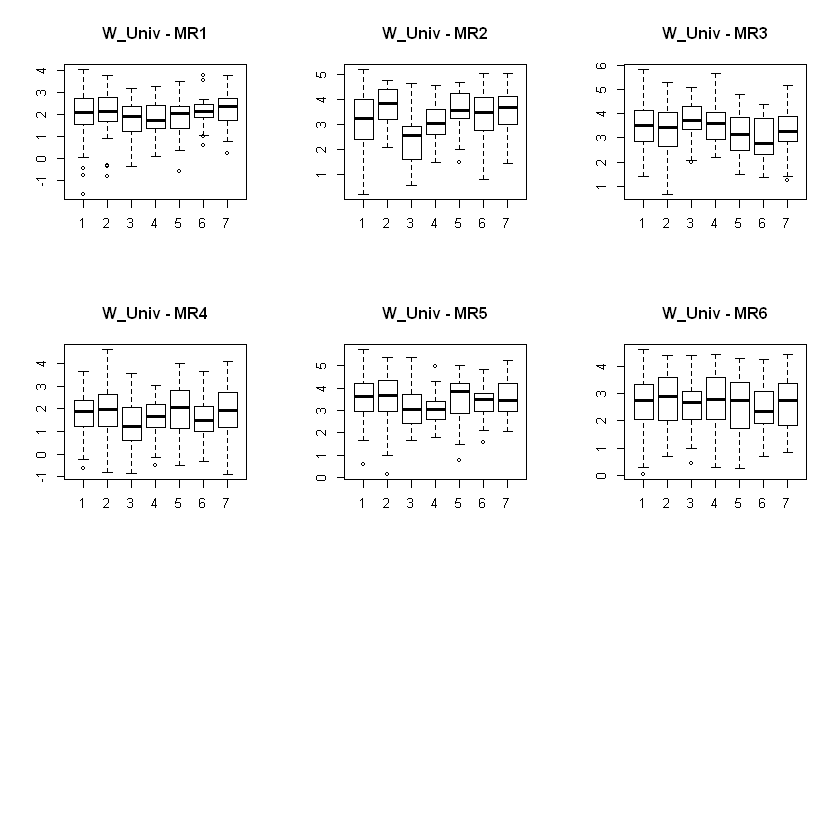

In [465]:
par(mfrow=c(3,3))
boxplot(MR1~W_Univ, data = Df_total, main = 'W_Univ - MR1')
boxplot(MR2~W_Univ, data = Df_total, main = 'W_Univ - MR2')
boxplot(MR3~W_Univ, data = Df_total, main = 'W_Univ - MR3')
boxplot(MR4~W_Univ, data = Df_total, main = 'W_Univ - MR4')
boxplot(MR5~W_Univ, data = Df_total, main = 'W_Univ - MR5')
boxplot(MR6~W_Univ, data = Df_total, main = 'W_Univ - MR6')